In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
train = pd.read_csv('../data/train.csv')
weather = pd.read_csv('../data/weather.csv')
key = pd.read_csv('../data/key.csv')
test = pd.read_csv('../data/test.csv')
sample = pd.read_csv('../data/sampleSubmission.csv')

In [2]:
def match_dateformat(df, year):
    """
    영문 월을 숫자 월로 바꾸어주고 나중에 사용하기 쉽도록 datetime.date 형태로 바꾸어주는 함수
    """
    months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
    for i in range(len(df)):
        dates = df.loc[i][0]
        dates = dates.split(" ")
        for j in range(len(months)):
            if dates[0] == months[j]:
                dates[0] = str(j + 1)
                dates_df = ["{} {} {}".format(year, dates[0], dates[1])]
                dates_df = pd.to_datetime(dates_df)
                df.loc[i][0] = dates_df.date[0]
    return df

In [3]:
def merge_holiday(holiday_df1, holiday_df2, holiday_df3):
    """
    각 연도별 공휴일 리스트 합치기
    """
    frame = [holiday_df1, holiday_df2, holiday_df3]
    holiday = pd.concat(frame).reset_index(drop=True)
    return holiday

In [4]:
def find_holiday(file, year):
    """
    수요에 영향을 미치는 주요 공휴일을 찾아내는 함수
    """
    holidays = ["New Year's Day", "Martin Luther King Jr. Day", "Valentine's Day",  "President's Day", "Easter Sunday", 
                      "Mother's Day", "Memorial Day", "Father's Day", "Independence Day", "Labor Day", "Columbus Day",
                      "Halloween", "Veterans Day", "Thanksgiving Day", "Black Friday", "Christmas Eve", "Christmas Day", "New Year's Eve"]
    
    holi = pd.read_excel(file, year, header=None)
    holi = match_dateformat(holi, year)
    holiday = pd.DataFrame(columns=[0,1,2,3,4])
    for _ in holidays:
        for i in range(len(holi[2])):
            if _ == holi[2][i]:
                holiday = holiday.append(holi.loc[i])
    return holiday

In [5]:
def preprocessing(df, holiday):
    """
    train데이터를 가공하는 함수
    """
    df['units'] = np.log(df['units'] + 1)
    df['date'] = pd.to_datetime(df['date'])
    df['weekday'] = df.date.dt.weekday #월요일이 0 일요일이 6
    df['weekend'] = df.date.dt.weekday.isin([5, 6]) # 5: 토요일, 6: 일요일
    
    df['holiday'] = df.date.isin(holiday[0])
    df['weekday_holiday'] = df.holiday & (df.weekend == False)
    df['weekend_holiday'] = df.holiday & df.weekend
    return df

In [6]:
holiday12 = find_holiday('../data/holiday.xlsx', '2012')
holiday13 = find_holiday('../data/holiday.xlsx', '2013')
holiday14 = find_holiday('../data/holiday.xlsx', '2014')
holiday = merge_holiday(holiday12, holiday13, holiday14)
train = train.merge(key, left_on='store_nbr', right_on='store_nbr')
processed_train = preprocessing(train, holiday)
train_pivot = train.pivot_table(values='units', index=['date'], columns=['station_nbr','store_nbr','item_nbr'], aggfunc=np.sum)


In [7]:
processed_train_holiday = processed_train[processed_train['holiday'] == True] # holiday만 추려서 dataframe 만듬.
processed_train_nonholiday = processed_train[processed_train['holiday'] == False] # holiday 아닌 날들만 추려서 dataframe 만듬.

In [8]:
def holiday_store(df, nbr) : # 2013년 3월 31일까지의 train set으로 만들어줌..
    df_new = df[df['store_nbr'] == nbr]
    df_new.reset_index(drop = True, inplace = True)
    df_new = df_new[:2220]
    return df_new

In [9]:
# holiday만 추린 dataframe에서 각 store_nbr 별로 dataframe을 만들어줌.

processed_train_holiday_store1 = holiday_store(processed_train_holiday, 1)
processed_train_holiday_store2 = holiday_store(processed_train_holiday, 2)
processed_train_holiday_store3 = holiday_store(processed_train_holiday, 3)
processed_train_holiday_store4 = holiday_store(processed_train_holiday, 4)
processed_train_holiday_store5 = holiday_store(processed_train_holiday, 5)
processed_train_holiday_store6 = holiday_store(processed_train_holiday, 6)
processed_train_holiday_store7 = holiday_store(processed_train_holiday, 7)
processed_train_holiday_store8 = holiday_store(processed_train_holiday, 8)
processed_train_holiday_store9 = holiday_store(processed_train_holiday, 9)
processed_train_holiday_store10 = holiday_store(processed_train_holiday, 10)
processed_train_holiday_store11 = holiday_store(processed_train_holiday, 11)
processed_train_holiday_store12 = holiday_store(processed_train_holiday, 12)
processed_train_holiday_store13 = holiday_store(processed_train_holiday, 13)
processed_train_holiday_store14 = holiday_store(processed_train_holiday, 14)
processed_train_holiday_store15 = holiday_store(processed_train_holiday, 15)
processed_train_holiday_store16 = holiday_store(processed_train_holiday, 16)
processed_train_holiday_store17 = holiday_store(processed_train_holiday, 17)
processed_train_holiday_store18 = holiday_store(processed_train_holiday, 18)
processed_train_holiday_store19 = holiday_store(processed_train_holiday, 19)
processed_train_holiday_store20 = holiday_store(processed_train_holiday, 20)
processed_train_holiday_store21 = holiday_store(processed_train_holiday, 21)
processed_train_holiday_store22 = holiday_store(processed_train_holiday, 22)
processed_train_holiday_store23 = holiday_store(processed_train_holiday, 23)
processed_train_holiday_store24 = holiday_store(processed_train_holiday, 24)
processed_train_holiday_store25 = holiday_store(processed_train_holiday, 25)
processed_train_holiday_store26 = holiday_store(processed_train_holiday, 26)
processed_train_holiday_store27 = holiday_store(processed_train_holiday, 27)
processed_train_holiday_store28 = holiday_store(processed_train_holiday, 28)
processed_train_holiday_store29 = holiday_store(processed_train_holiday, 29)
processed_train_holiday_store30 = holiday_store(processed_train_holiday, 30)
processed_train_holiday_store31 = holiday_store(processed_train_holiday, 31)
processed_train_holiday_store32 = holiday_store(processed_train_holiday, 32)
processed_train_holiday_store33 = holiday_store(processed_train_holiday, 33)
processed_train_holiday_store34 = holiday_store(processed_train_holiday, 34)
processed_train_holiday_store35 = holiday_store(processed_train_holiday, 35)
processed_train_holiday_store36 = holiday_store(processed_train_holiday, 36)
processed_train_holiday_store37 = holiday_store(processed_train_holiday, 37)
processed_train_holiday_store38 = holiday_store(processed_train_holiday, 38)
processed_train_holiday_store39 = holiday_store(processed_train_holiday, 39)
processed_train_holiday_store40 = holiday_store(processed_train_holiday, 40)
processed_train_holiday_store41 = holiday_store(processed_train_holiday, 41)
processed_train_holiday_store42 = holiday_store(processed_train_holiday, 42)
processed_train_holiday_store43 = holiday_store(processed_train_holiday, 43)
processed_train_holiday_store44 = holiday_store(processed_train_holiday, 44)
processed_train_holiday_store45 = holiday_store(processed_train_holiday, 45)

In [10]:
# nonholiday만 추린 dataframe에서 각 store_nbr 별로 dataframe을 만들어줌.

processed_train_nonholiday_store1 = holiday_store(processed_train_nonholiday, 1)
processed_train_nonholiday_store2 = holiday_store(processed_train_nonholiday, 2)
processed_train_nonholiday_store3 = holiday_store(processed_train_nonholiday, 3)
processed_train_nonholiday_store4 = holiday_store(processed_train_nonholiday, 4)
processed_train_nonholiday_store5 = holiday_store(processed_train_nonholiday, 5)
processed_train_nonholiday_store6 = holiday_store(processed_train_nonholiday, 6)
processed_train_nonholiday_store7 = holiday_store(processed_train_nonholiday, 7)
processed_train_nonholiday_store8 = holiday_store(processed_train_nonholiday, 8)
processed_train_nonholiday_store9 = holiday_store(processed_train_nonholiday, 9)
processed_train_nonholiday_store10 = holiday_store(processed_train_nonholiday, 10)
processed_train_nonholiday_store11 = holiday_store(processed_train_nonholiday, 11)
processed_train_nonholiday_store12 = holiday_store(processed_train_nonholiday, 12)
processed_train_nonholiday_store13 = holiday_store(processed_train_nonholiday, 13)
processed_train_nonholiday_store14 = holiday_store(processed_train_nonholiday, 14)
processed_train_nonholiday_store15 = holiday_store(processed_train_nonholiday, 15)
processed_train_nonholiday_store16 = holiday_store(processed_train_nonholiday, 16)
processed_train_nonholiday_store17 = holiday_store(processed_train_nonholiday, 17)
processed_train_nonholiday_store18 = holiday_store(processed_train_nonholiday, 18)
processed_train_nonholiday_store19 = holiday_store(processed_train_nonholiday, 19)
processed_train_nonholiday_store20 = holiday_store(processed_train_nonholiday, 20)
processed_train_nonholiday_store21 = holiday_store(processed_train_nonholiday, 21)
processed_train_nonholiday_store22 = holiday_store(processed_train_nonholiday, 22)
processed_train_nonholiday_store23 = holiday_store(processed_train_nonholiday, 23)
processed_train_nonholiday_store24 = holiday_store(processed_train_nonholiday, 24)
processed_train_nonholiday_store25 = holiday_store(processed_train_nonholiday, 25)
processed_train_nonholiday_store26 = holiday_store(processed_train_nonholiday, 26)
processed_train_nonholiday_store27 = holiday_store(processed_train_nonholiday, 27)
processed_train_nonholiday_store28 = holiday_store(processed_train_nonholiday, 28)
processed_train_nonholiday_store29 = holiday_store(processed_train_nonholiday, 29)
processed_train_nonholiday_store30 = holiday_store(processed_train_nonholiday, 30)
processed_train_nonholiday_store31 = holiday_store(processed_train_nonholiday, 31)
processed_train_nonholiday_store32 = holiday_store(processed_train_nonholiday, 32)
processed_train_nonholiday_store33 = holiday_store(processed_train_nonholiday, 33)
processed_train_nonholiday_store34 = holiday_store(processed_train_nonholiday, 34)
processed_train_nonholiday_store35 = holiday_store(processed_train_nonholiday, 35)
processed_train_nonholiday_store36 = holiday_store(processed_train_nonholiday, 36)
processed_train_nonholiday_store37 = holiday_store(processed_train_nonholiday, 37)
processed_train_nonholiday_store38 = holiday_store(processed_train_nonholiday, 38)
processed_train_nonholiday_store39 = holiday_store(processed_train_nonholiday, 39)
processed_train_nonholiday_store40 = holiday_store(processed_train_nonholiday, 40)
processed_train_nonholiday_store41 = holiday_store(processed_train_nonholiday, 41)
processed_train_nonholiday_store42 = holiday_store(processed_train_nonholiday, 42)
processed_train_nonholiday_store43 = holiday_store(processed_train_nonholiday, 43)
processed_train_nonholiday_store44 = holiday_store(processed_train_nonholiday, 44)
processed_train_nonholiday_store45 = holiday_store(processed_train_nonholiday, 45)

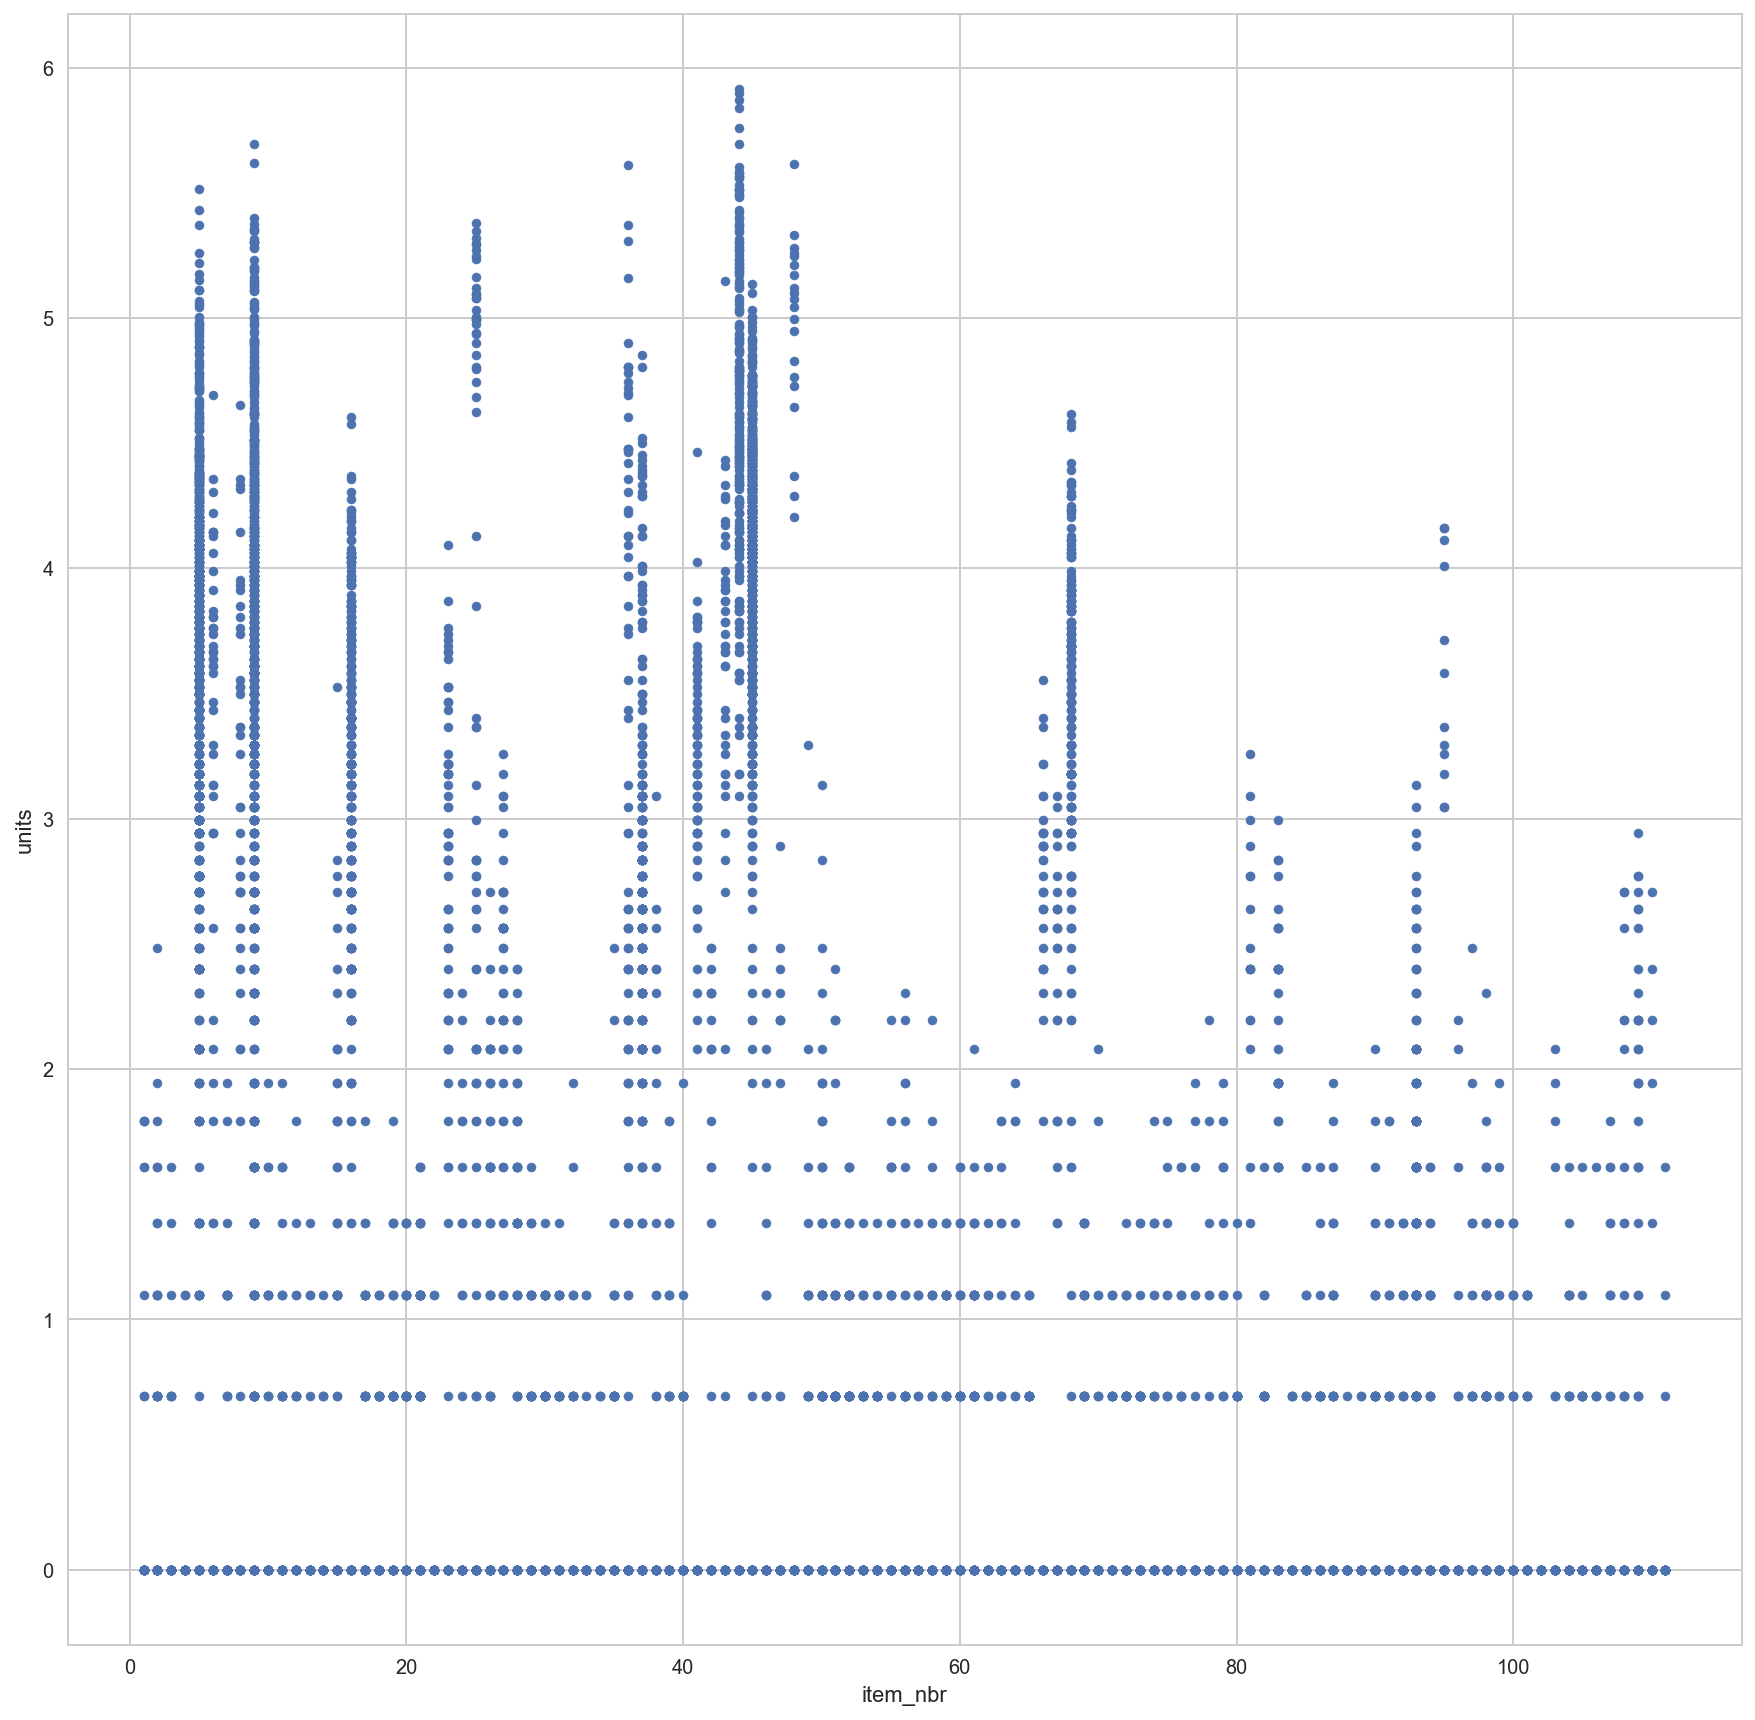

In [72]:
temp = processed_train_holiday.pivot_table(values = 'units', index = ['item_nbr'], columns = ['store_nbr'])

# temp
# plt.figure(figsize = (20, 20))
# plt.boxplot(temp)
# temp.plot.scatter(x = 'item_nbr', y = ['store_nbr'], figsize = (15,15))
processed_train_holiday.plot(kind = 'scatter', x = 'item_nbr', y = 'units', figsize = (15, 15)) ## item_nbr에 따라 units을 store_nbr로 점 찍음
plt.show()


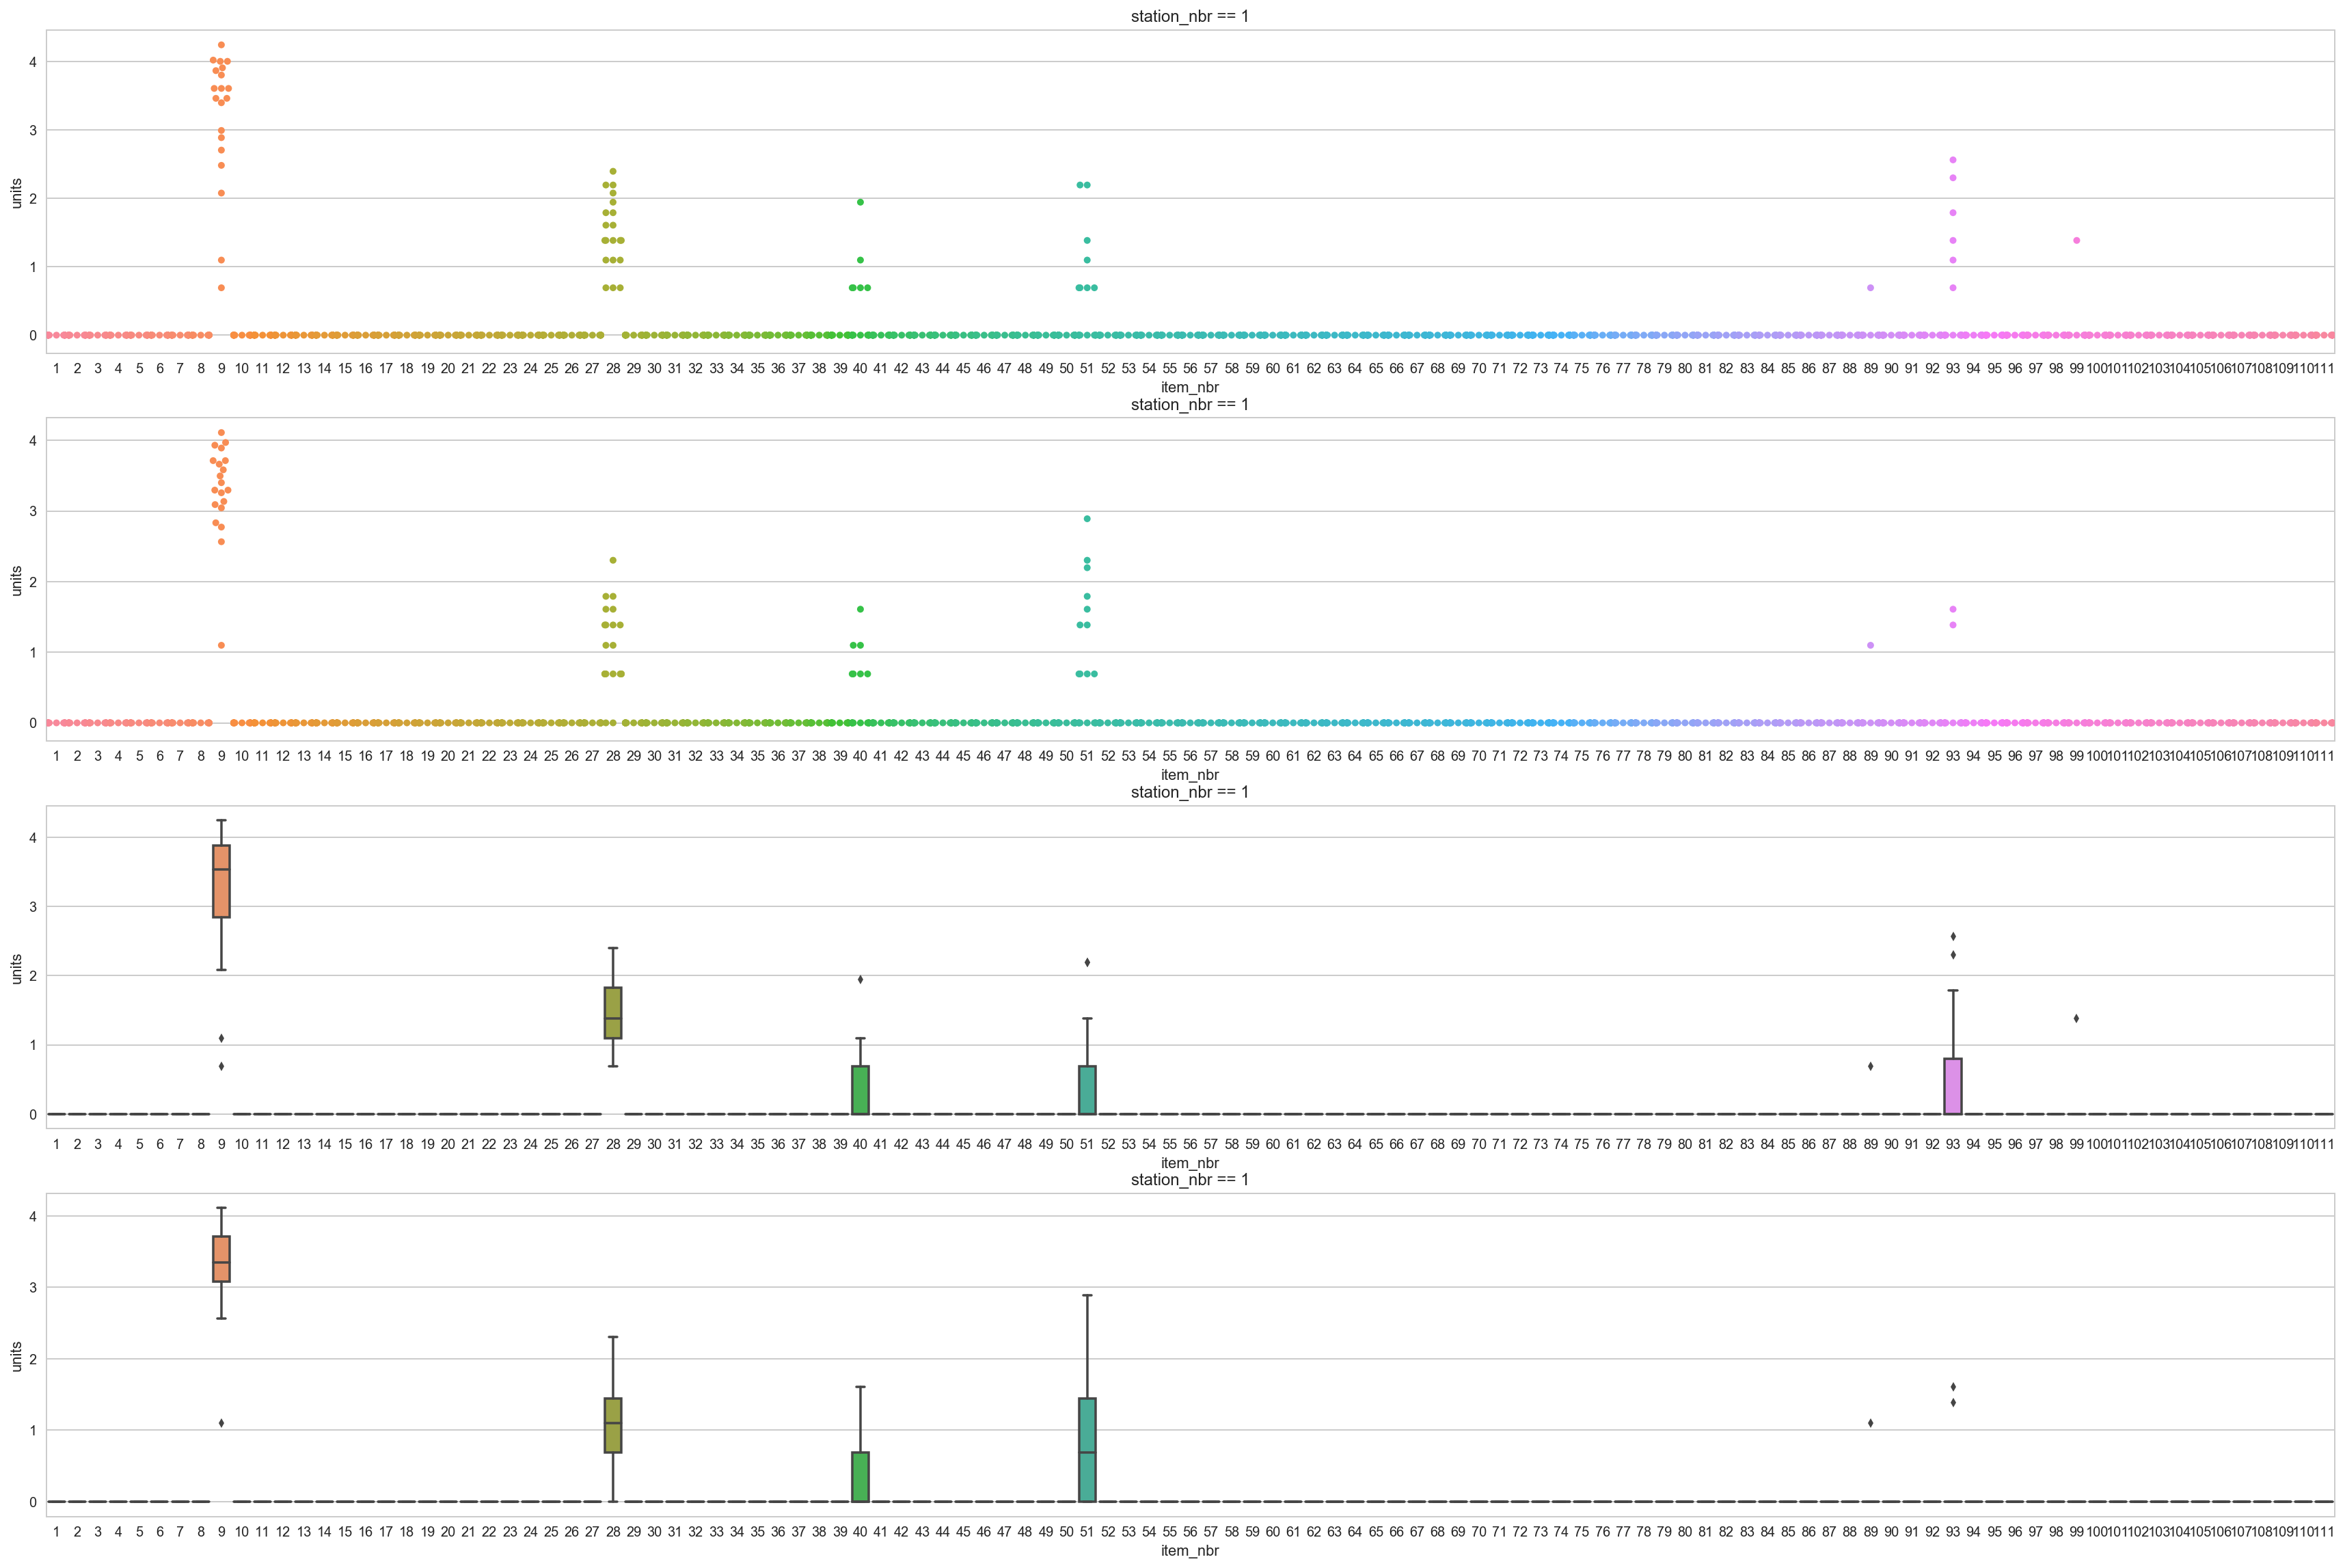

In [69]:
# station_nbr == 1의 units 분포 (아래로 쭉 같은 형태의 코드 station_nbr가 같은 store끼리 묶어서 holiday/nonholiday의 units분포 확인)
# swarmplot, boxplot으로 확인
# store_nbr == 1

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store1
data2 = processed_train_nonholiday_store1

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1) # holiday
plt.title('station_nbr == 1')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2) # non holiday
plt.title('station_nbr == 1')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1) # holiday
plt.title('station_nbr == 1')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2) # non holiday
plt.title('station_nbr == 1')

plt.show()

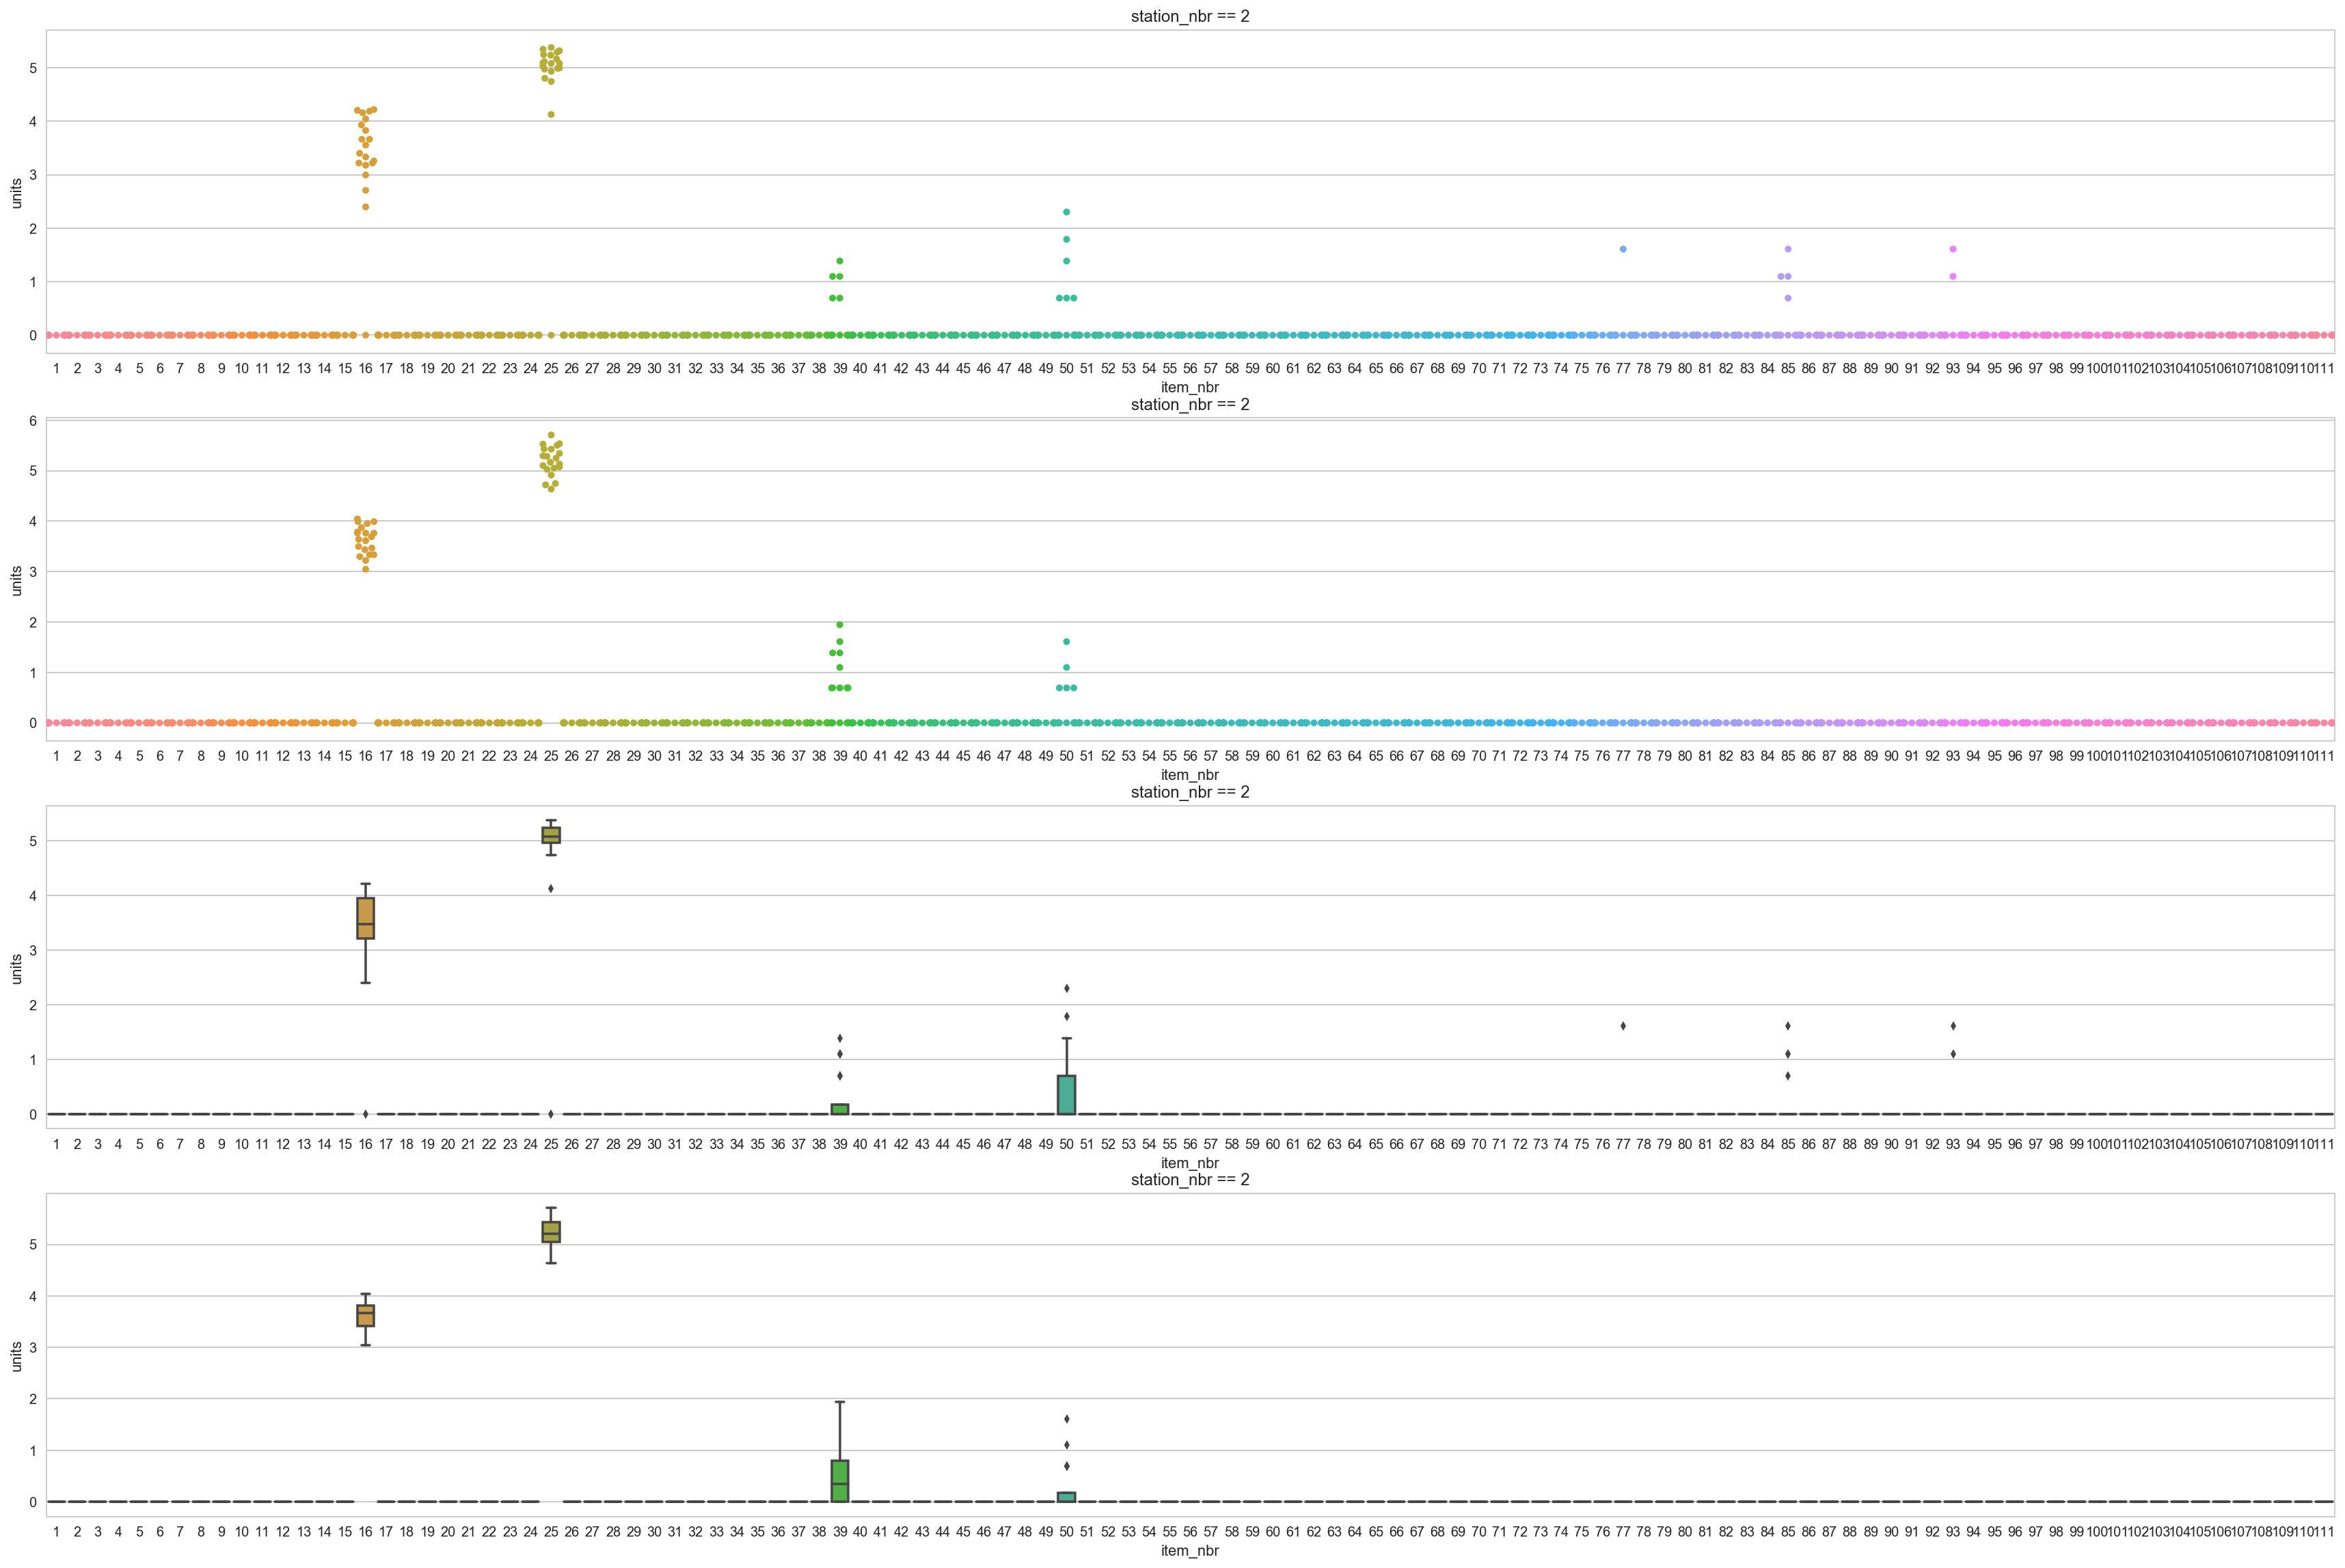

In [70]:
# station_nbr == 2
# store_nbr == 16

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store16
data2 = processed_train_nonholiday_store16

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 2')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 2')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 2')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 2')

plt.show()

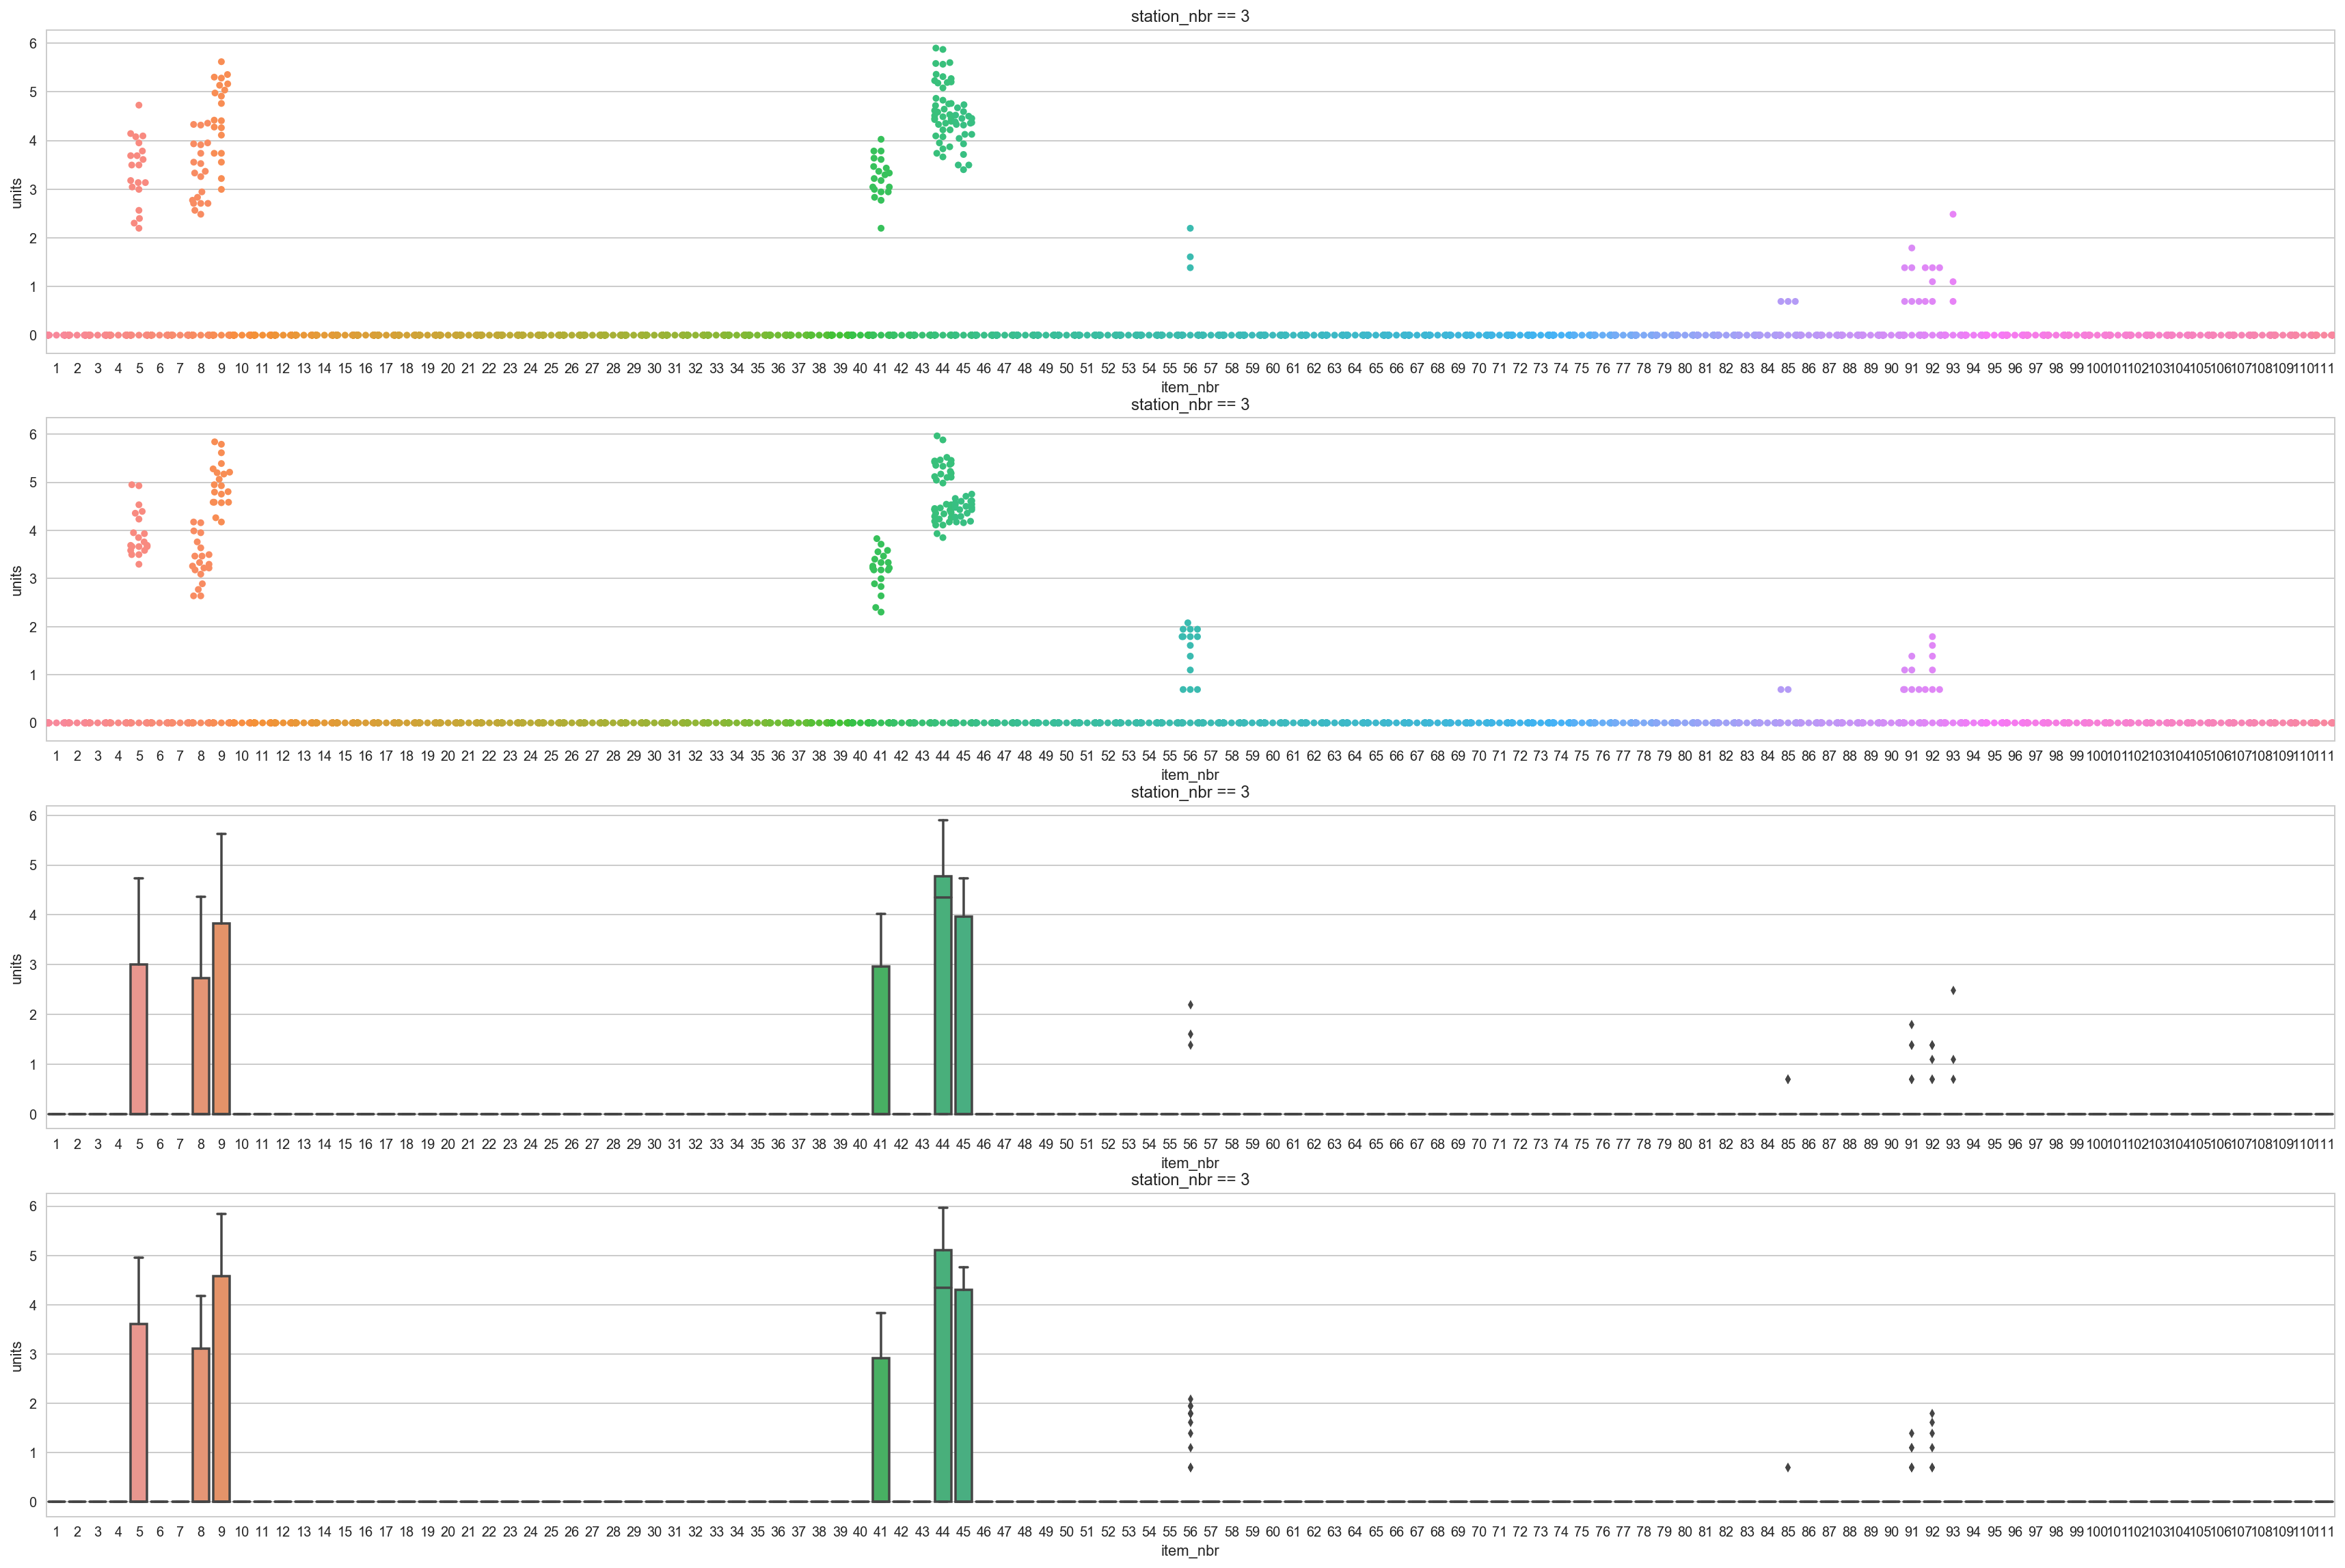

In [71]:
# station_nbr == 3
# store_nbr == 21, 29, 33

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store21, processed_train_holiday_store29, processed_train_holiday_store33])
data2 = pd.concat([processed_train_nonholiday_store21, processed_train_nonholiday_store29, processed_train_nonholiday_store33])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 3')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 3')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 3')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 3')

plt.show()

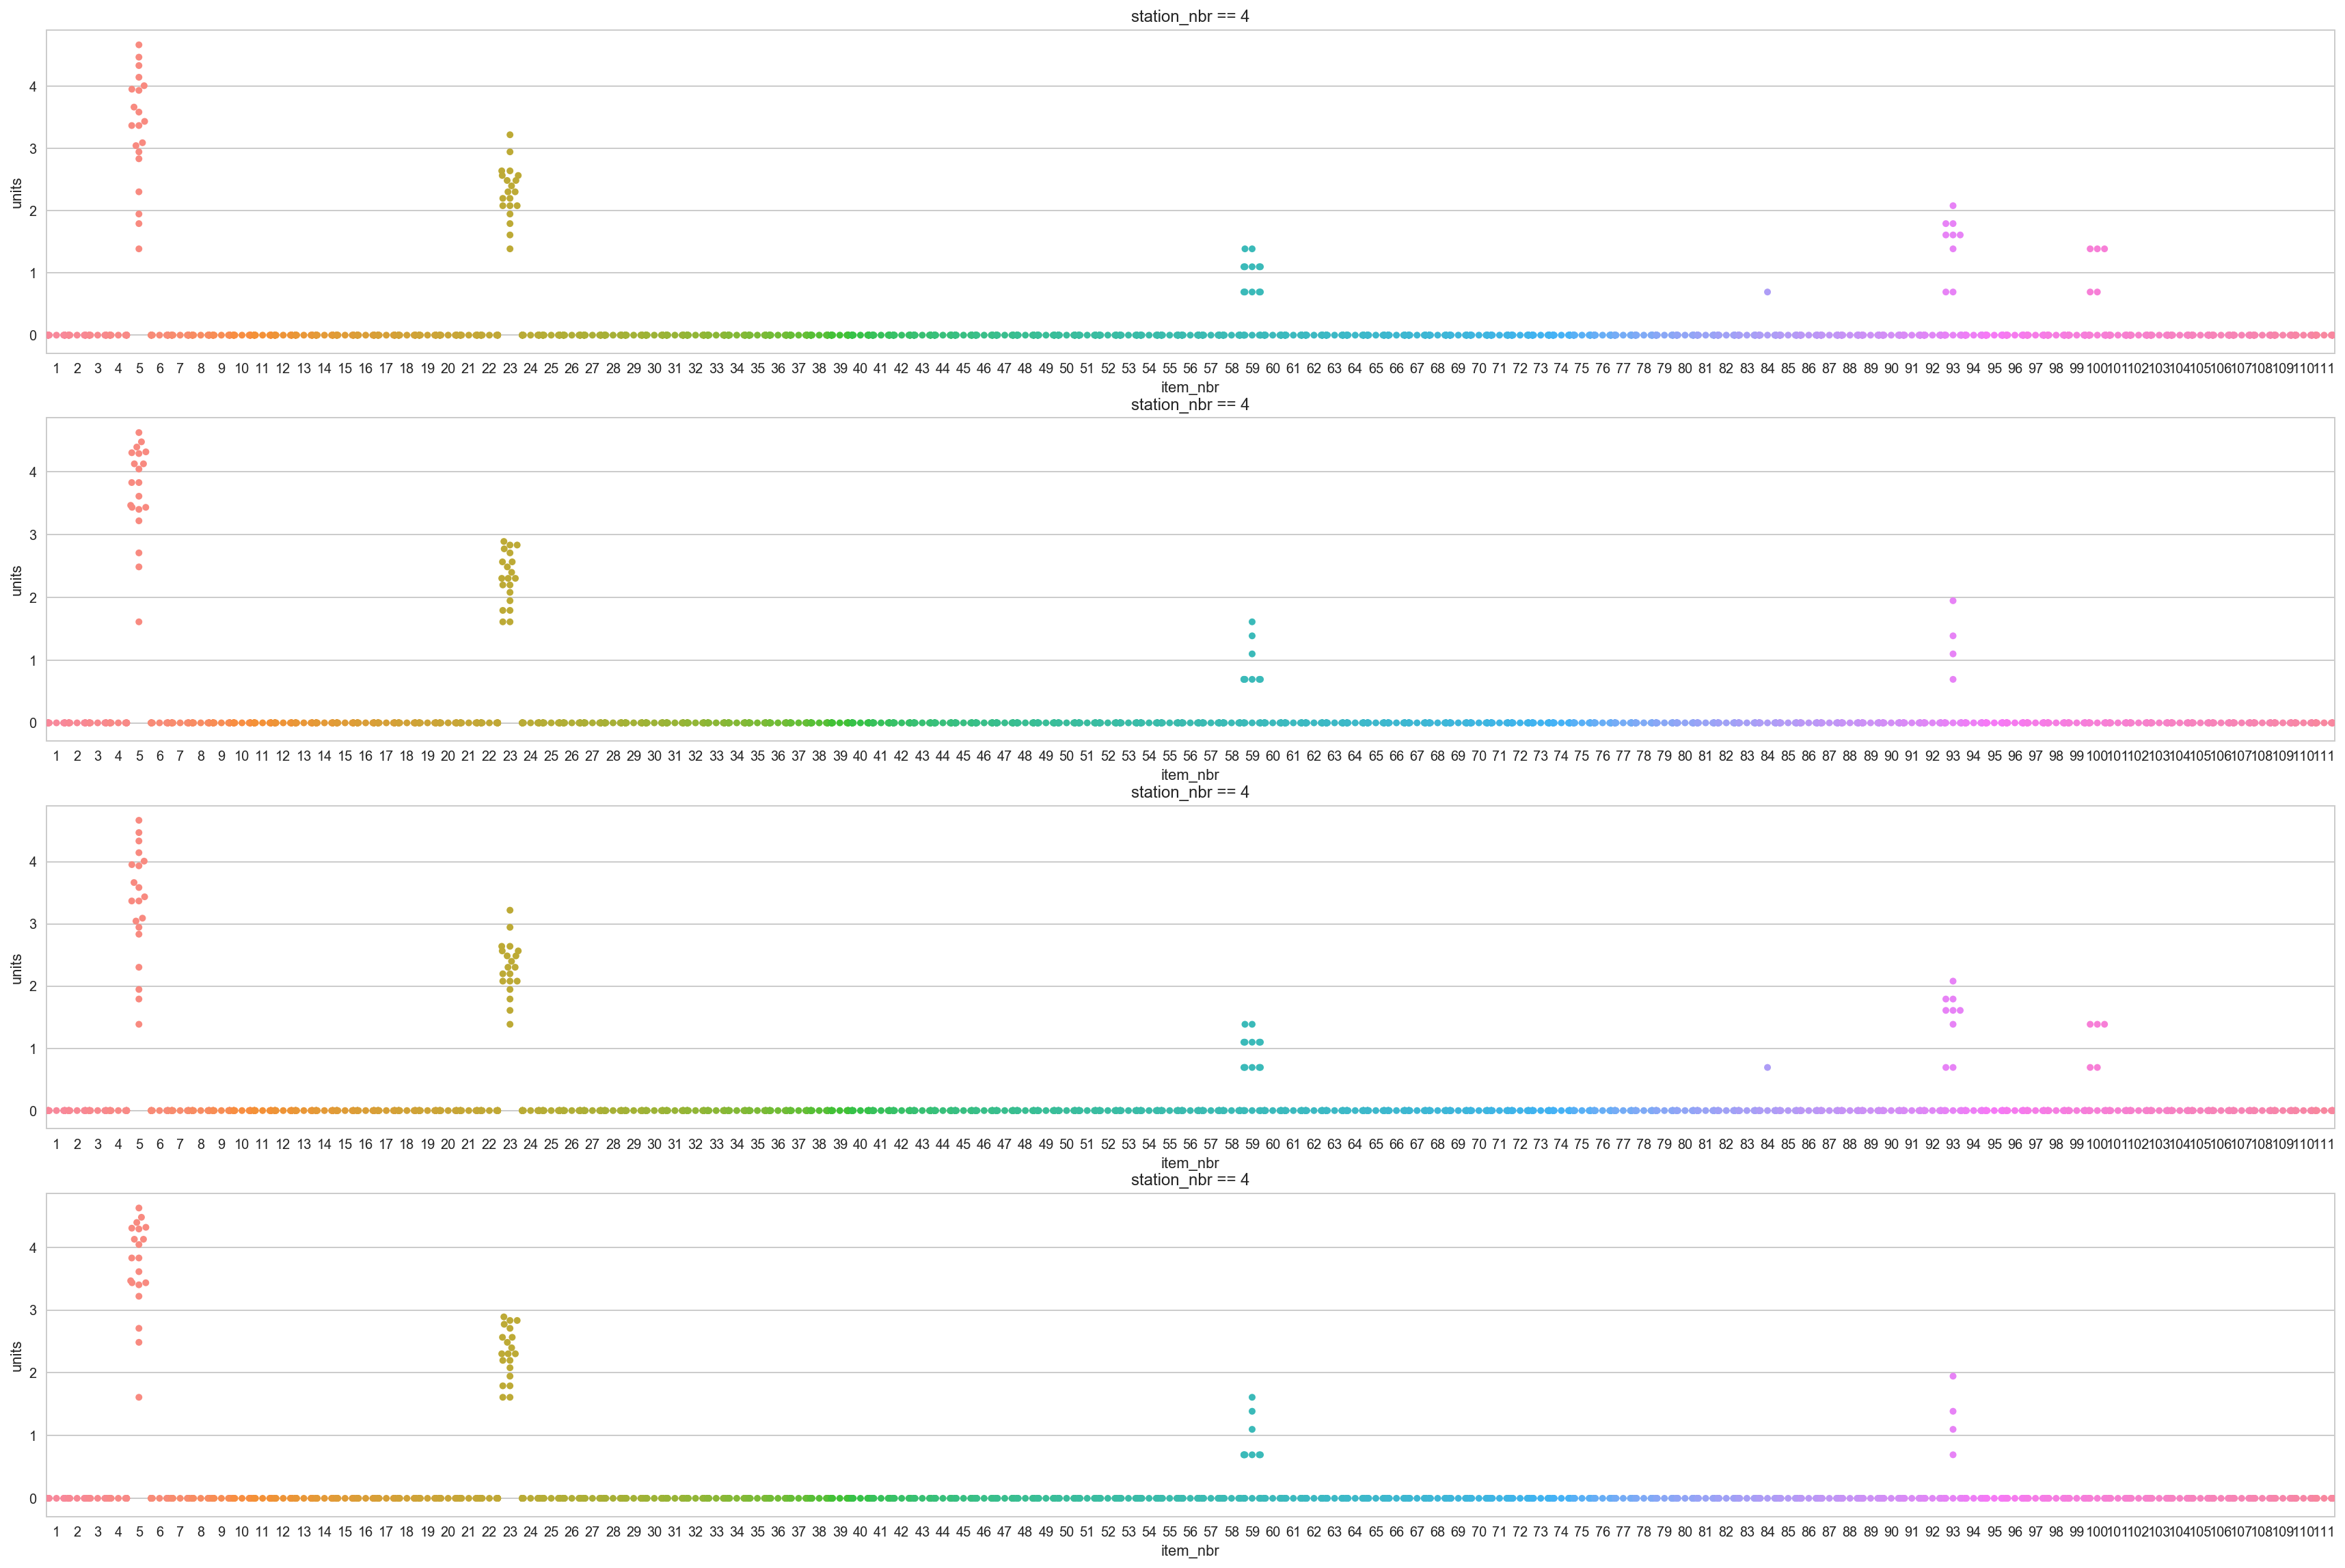

In [72]:
# station_nbr == 4
# store_nbr == 8

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store8
data2 = processed_train_nonholiday_store8

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 4')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 4')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 4')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 4')

plt.show()

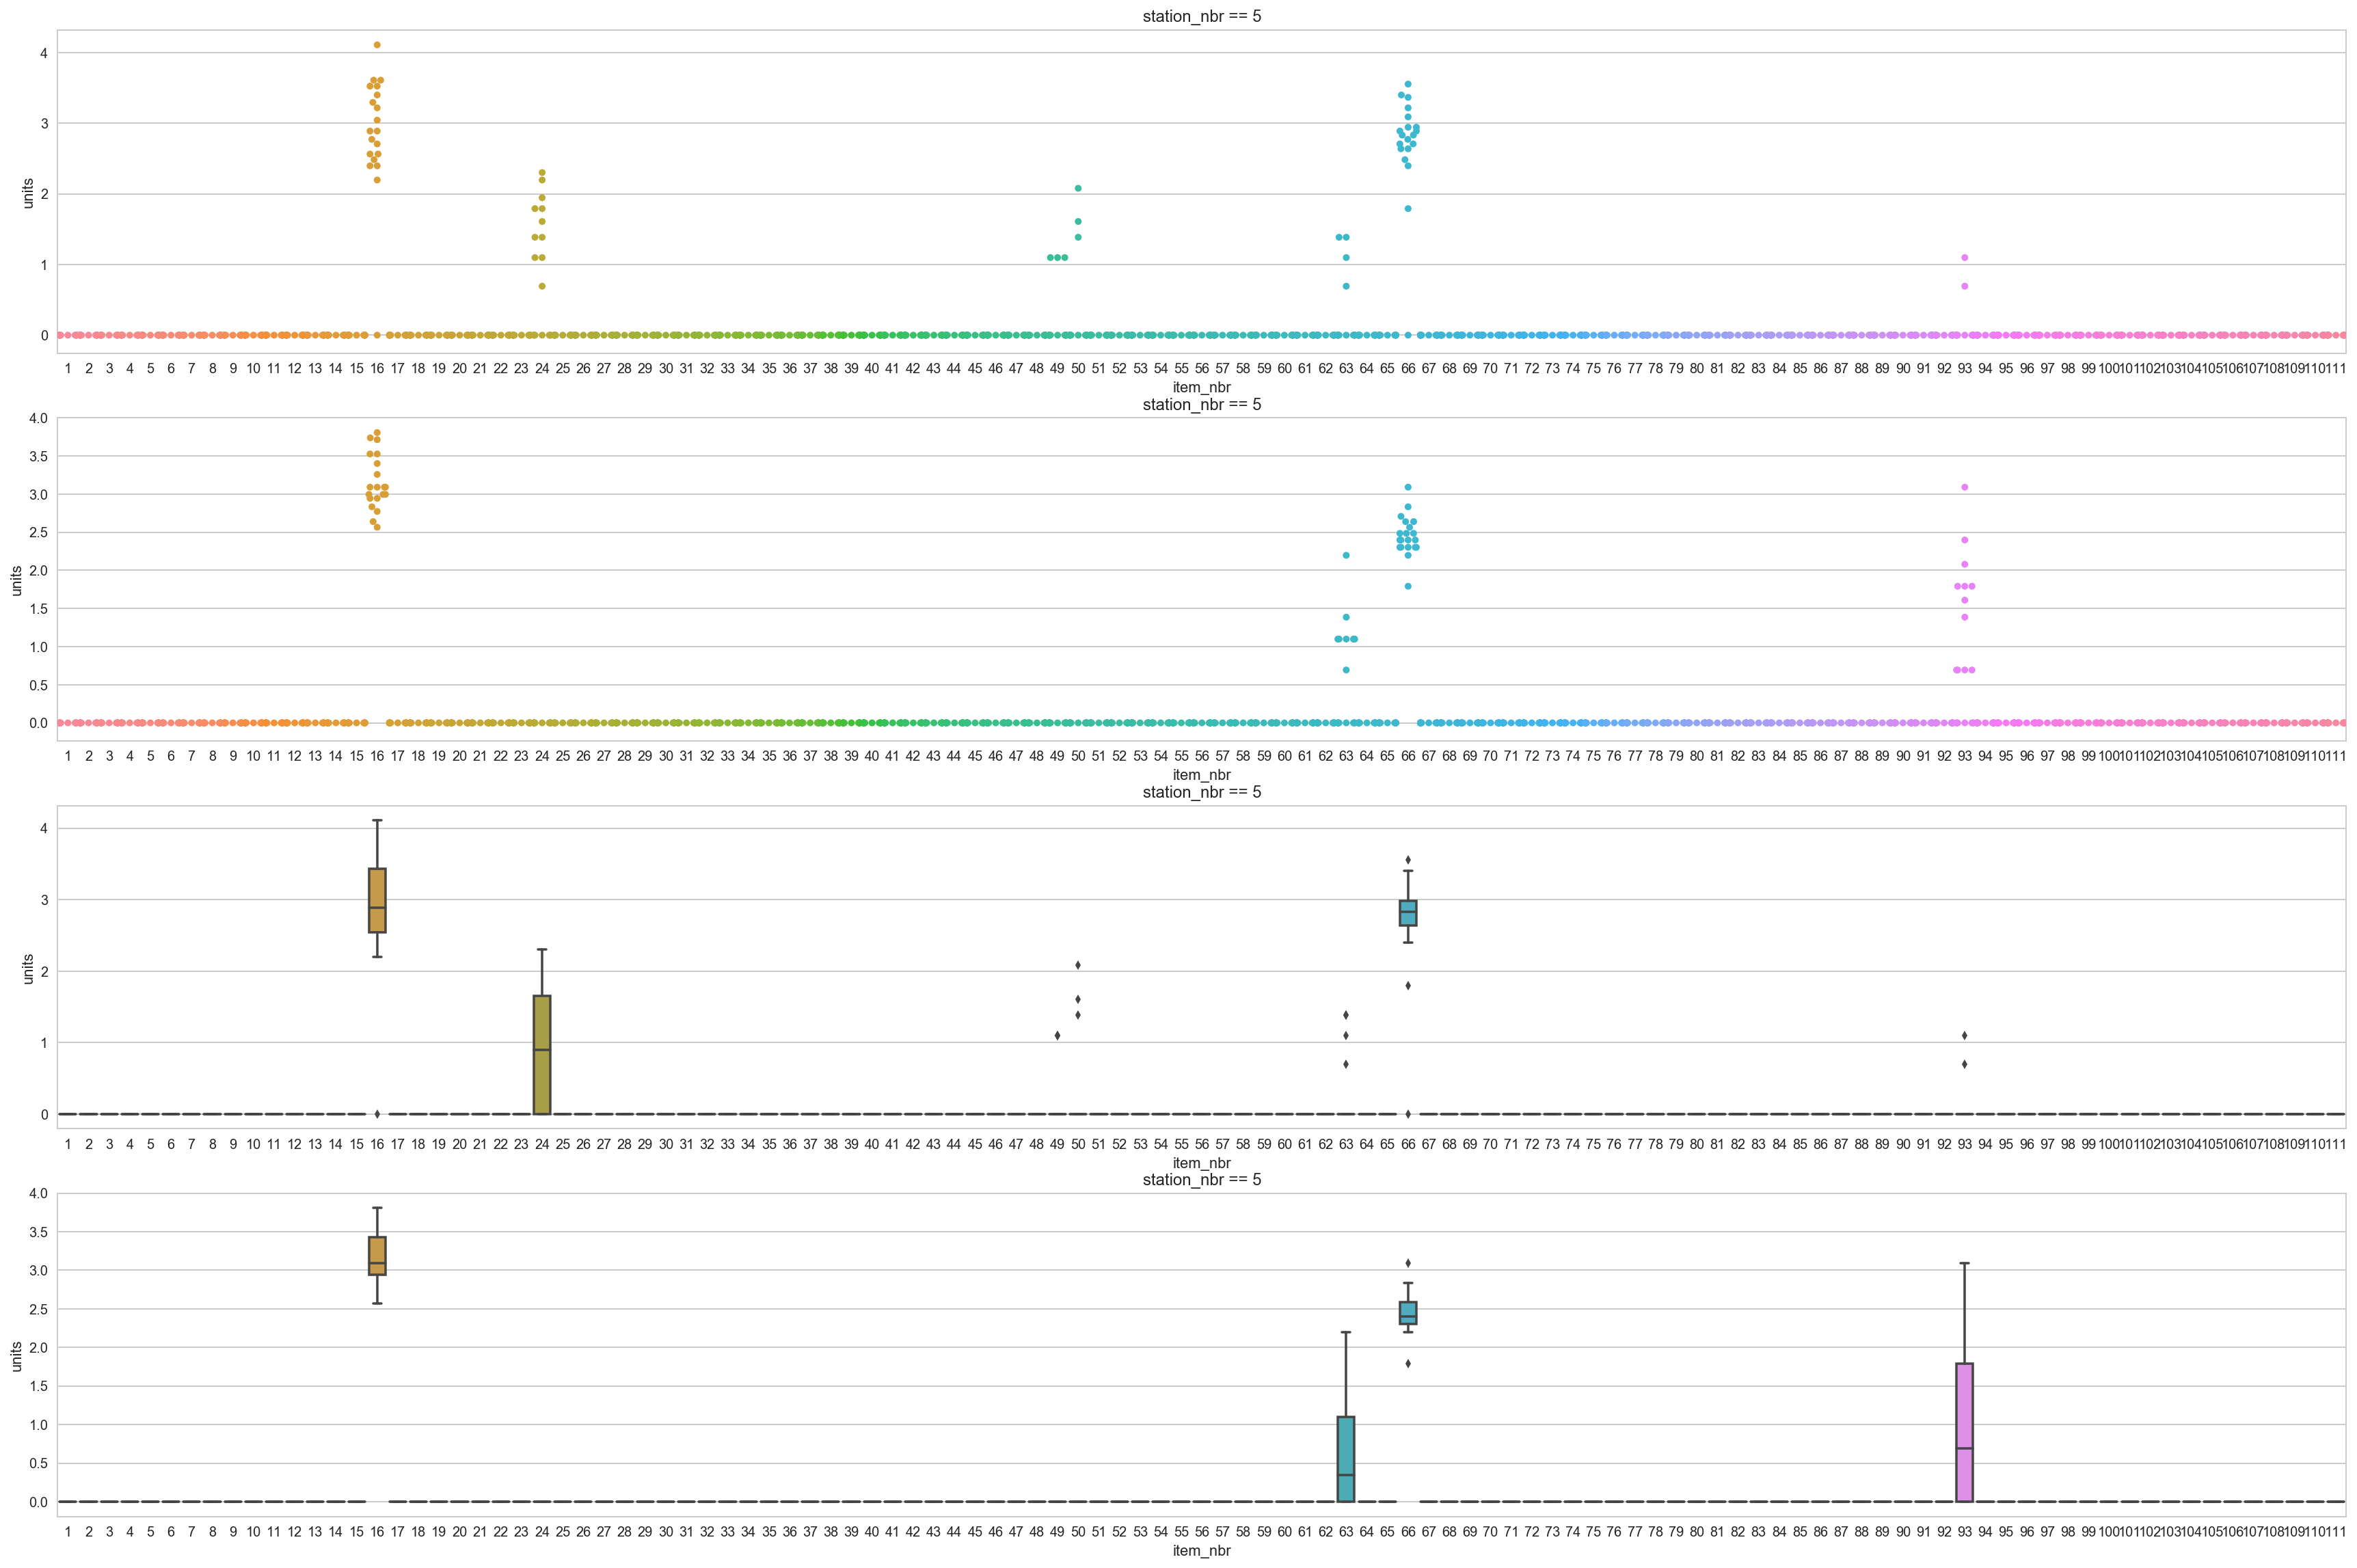

In [78]:
# station_nbr == 5
# store_nbr == 35

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store35
data2 = processed_train_nonholiday_store35

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 5')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 5')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 5')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 5')

plt.show()

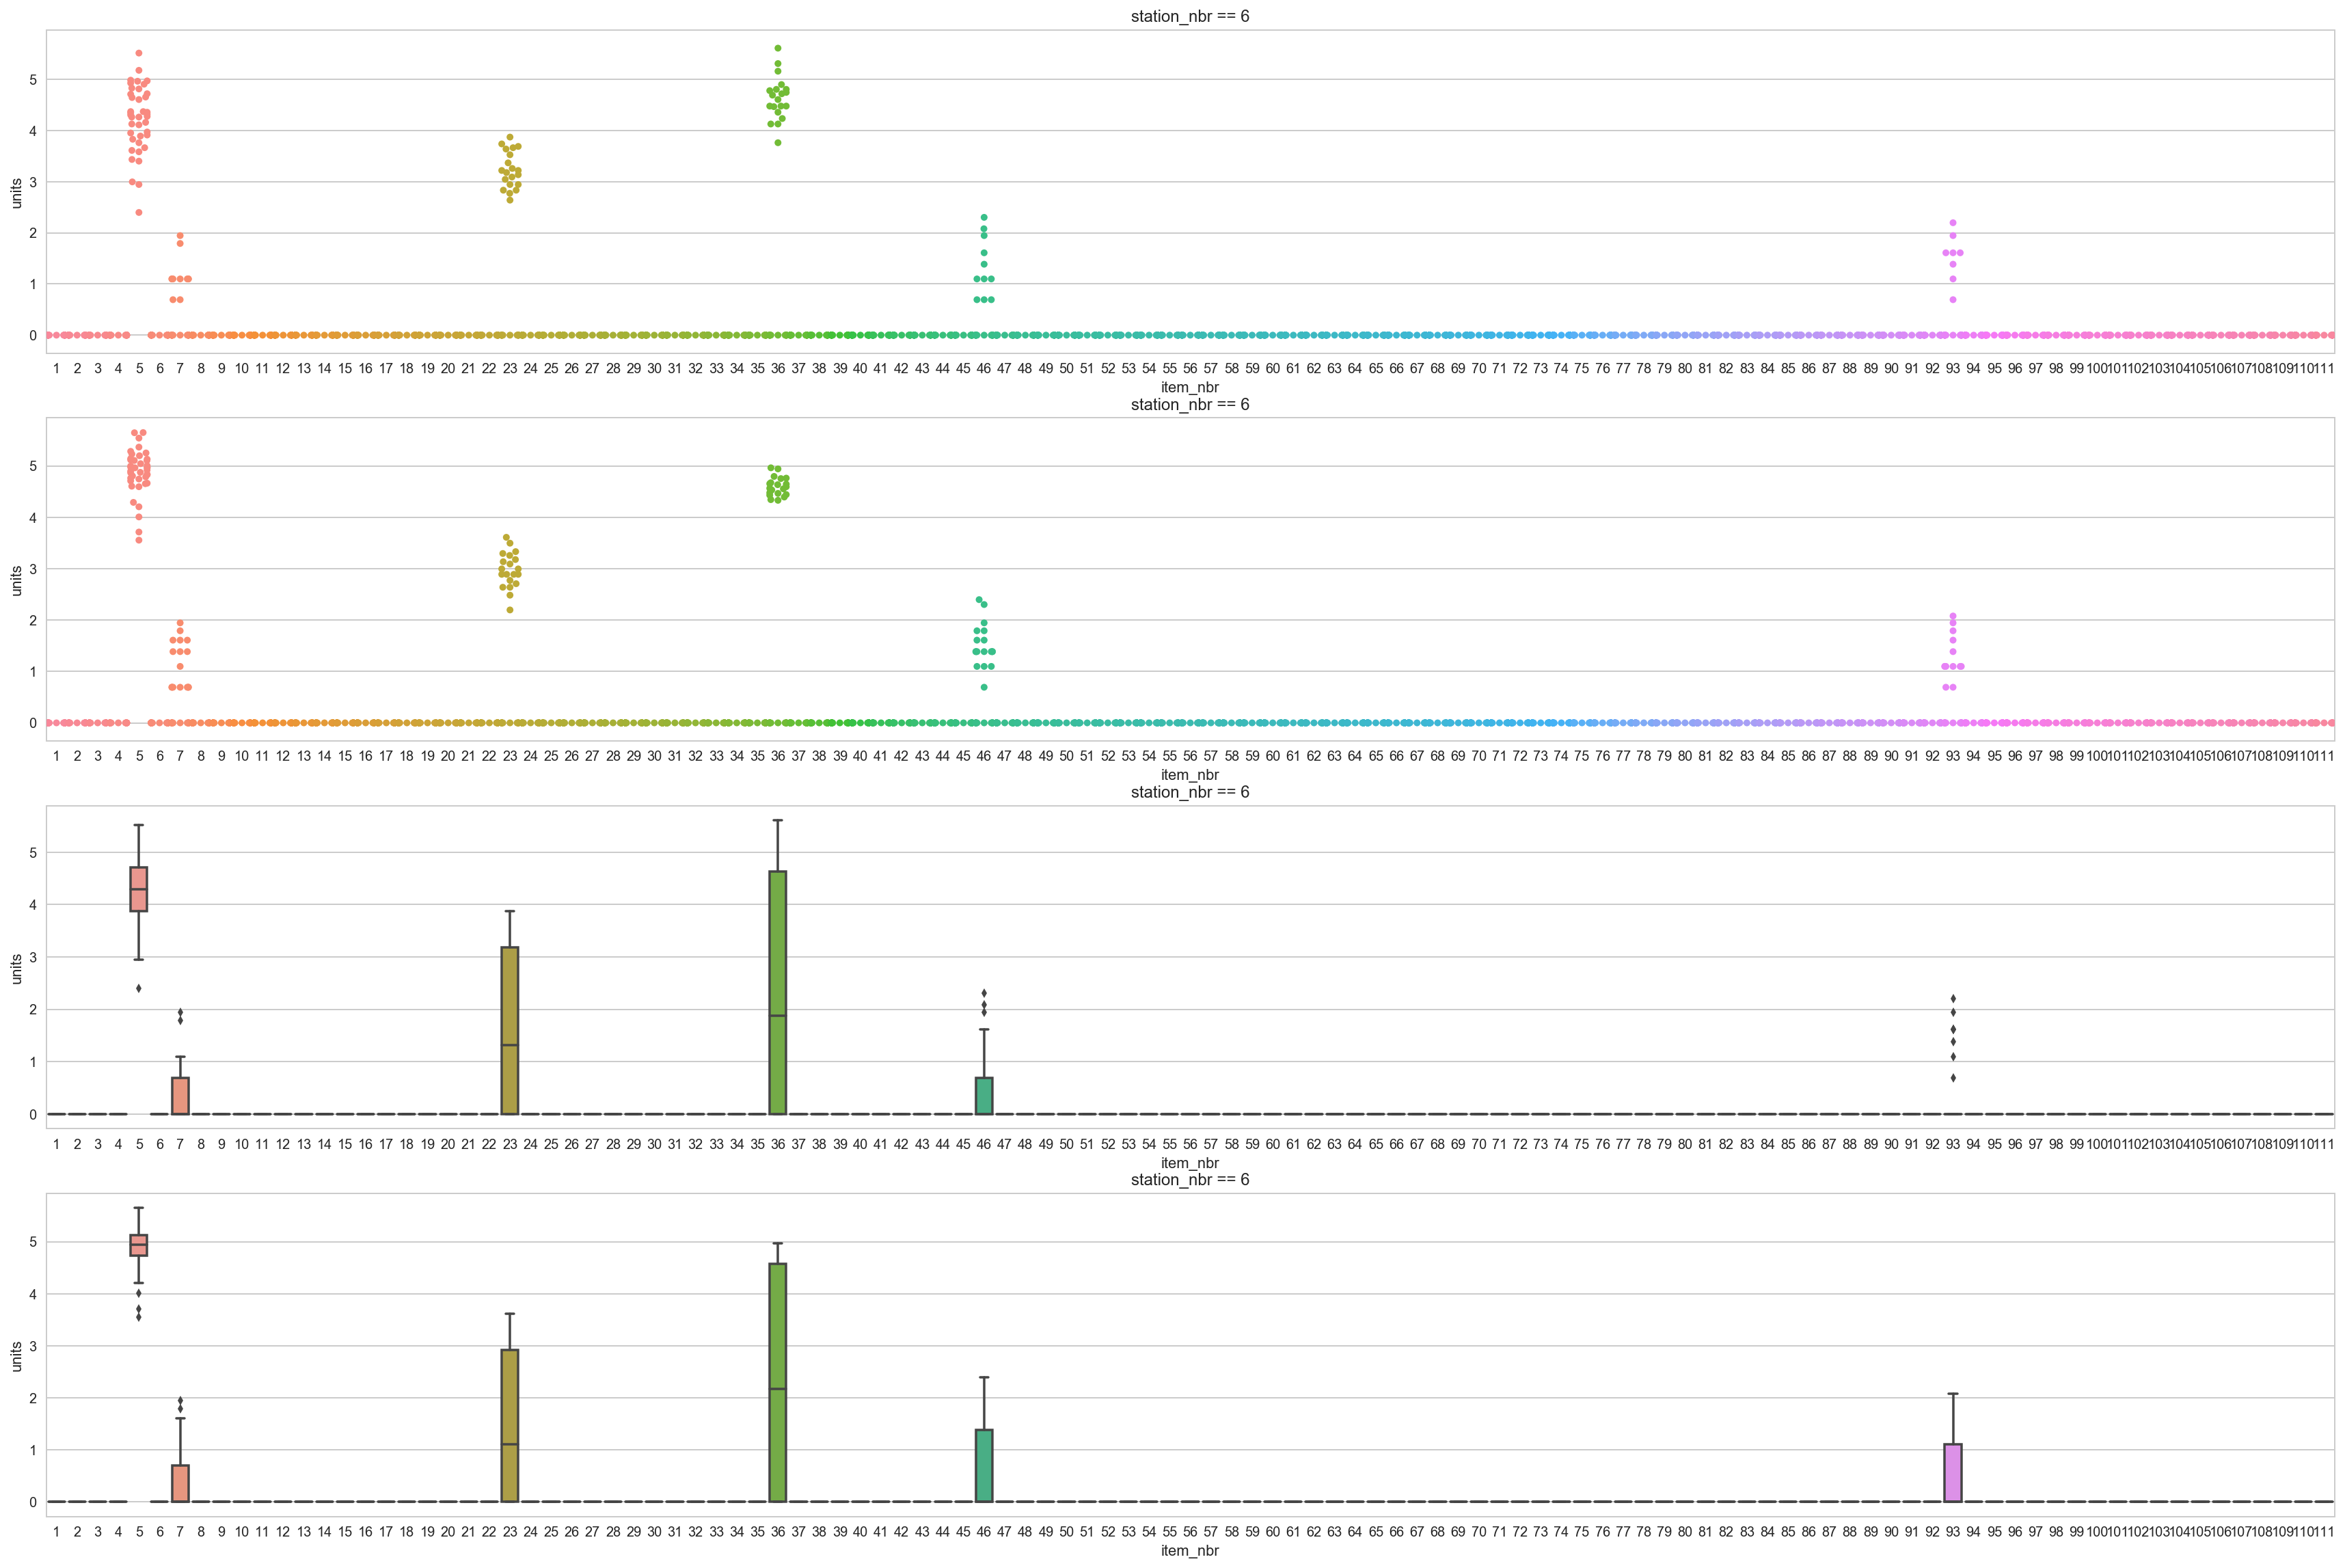

In [77]:
# station_nbr == 6
# store_nbr == 7, 13

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store7, processed_train_holiday_store13])
data2 = pd.concat([processed_train_nonholiday_store7, processed_train_nonholiday_store13])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 6')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 6')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 6')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 6')

plt.show()

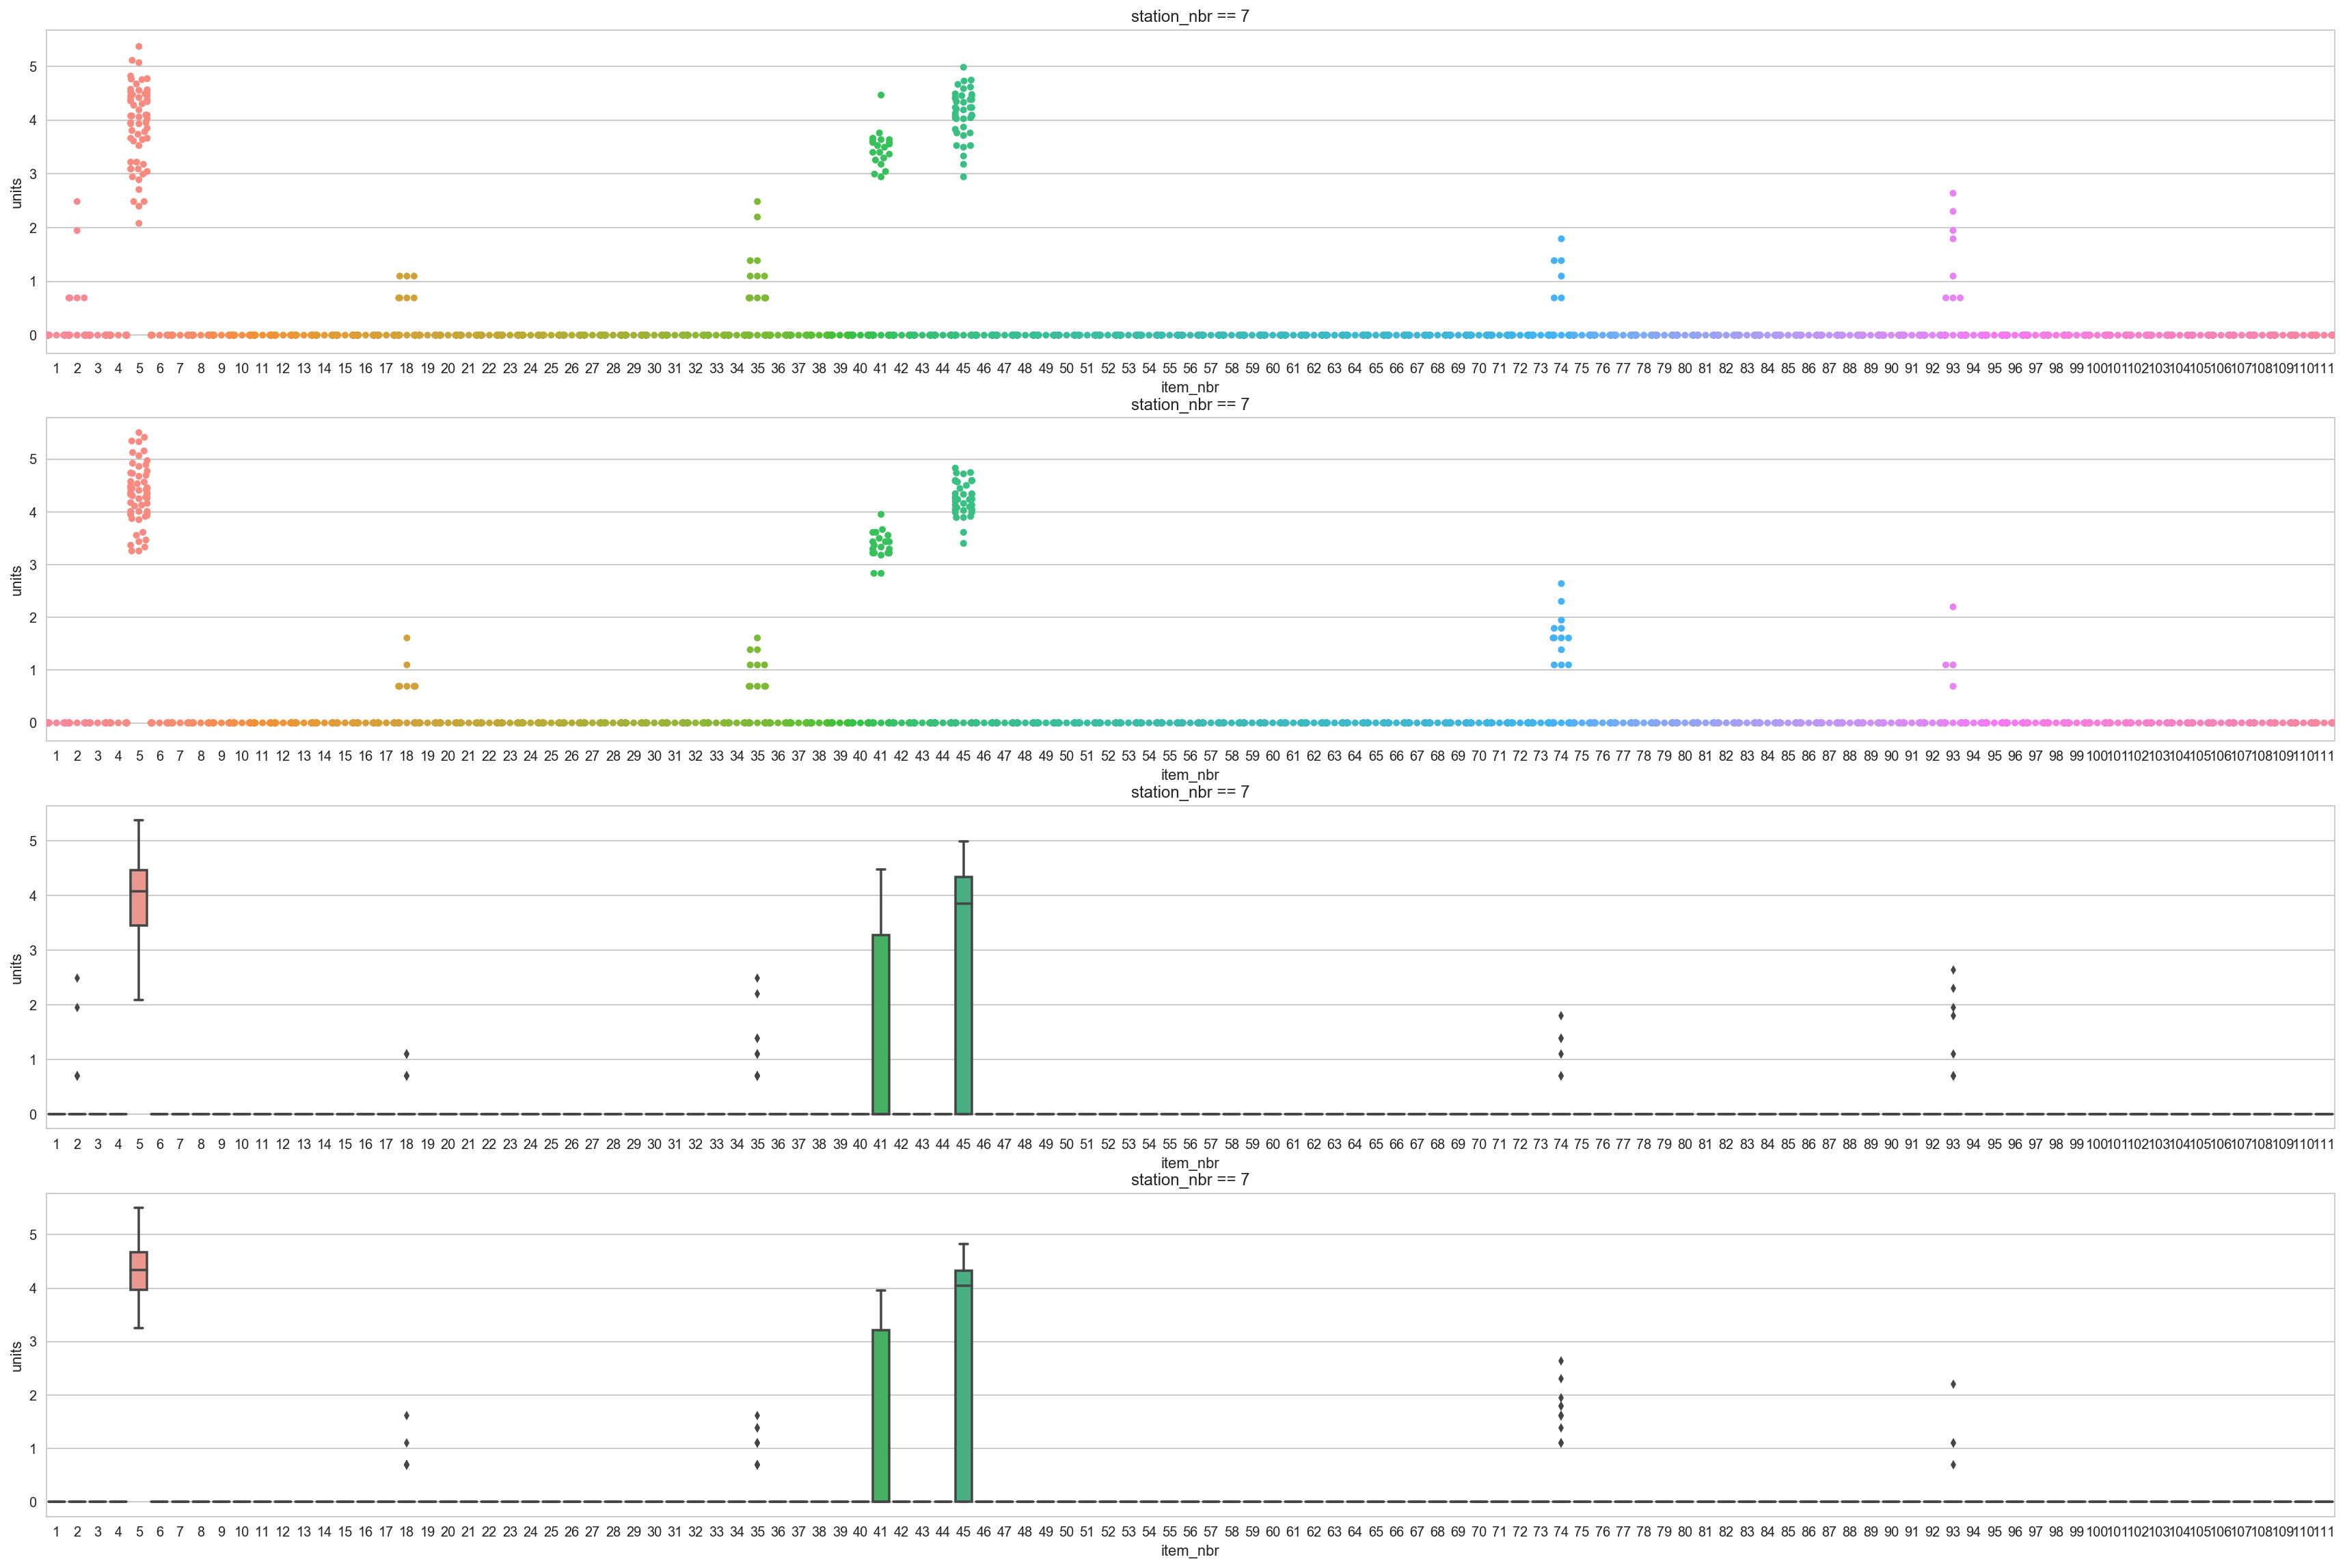

In [80]:
# station_nbr == 7
# store_nbr == 3, 20, 28

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store3, processed_train_holiday_store20, processed_train_holiday_store28])
data2 = pd.concat([processed_train_nonholiday_store3, processed_train_nonholiday_store20, processed_train_nonholiday_store28])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 7')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 7')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 7')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 7')

plt.show()

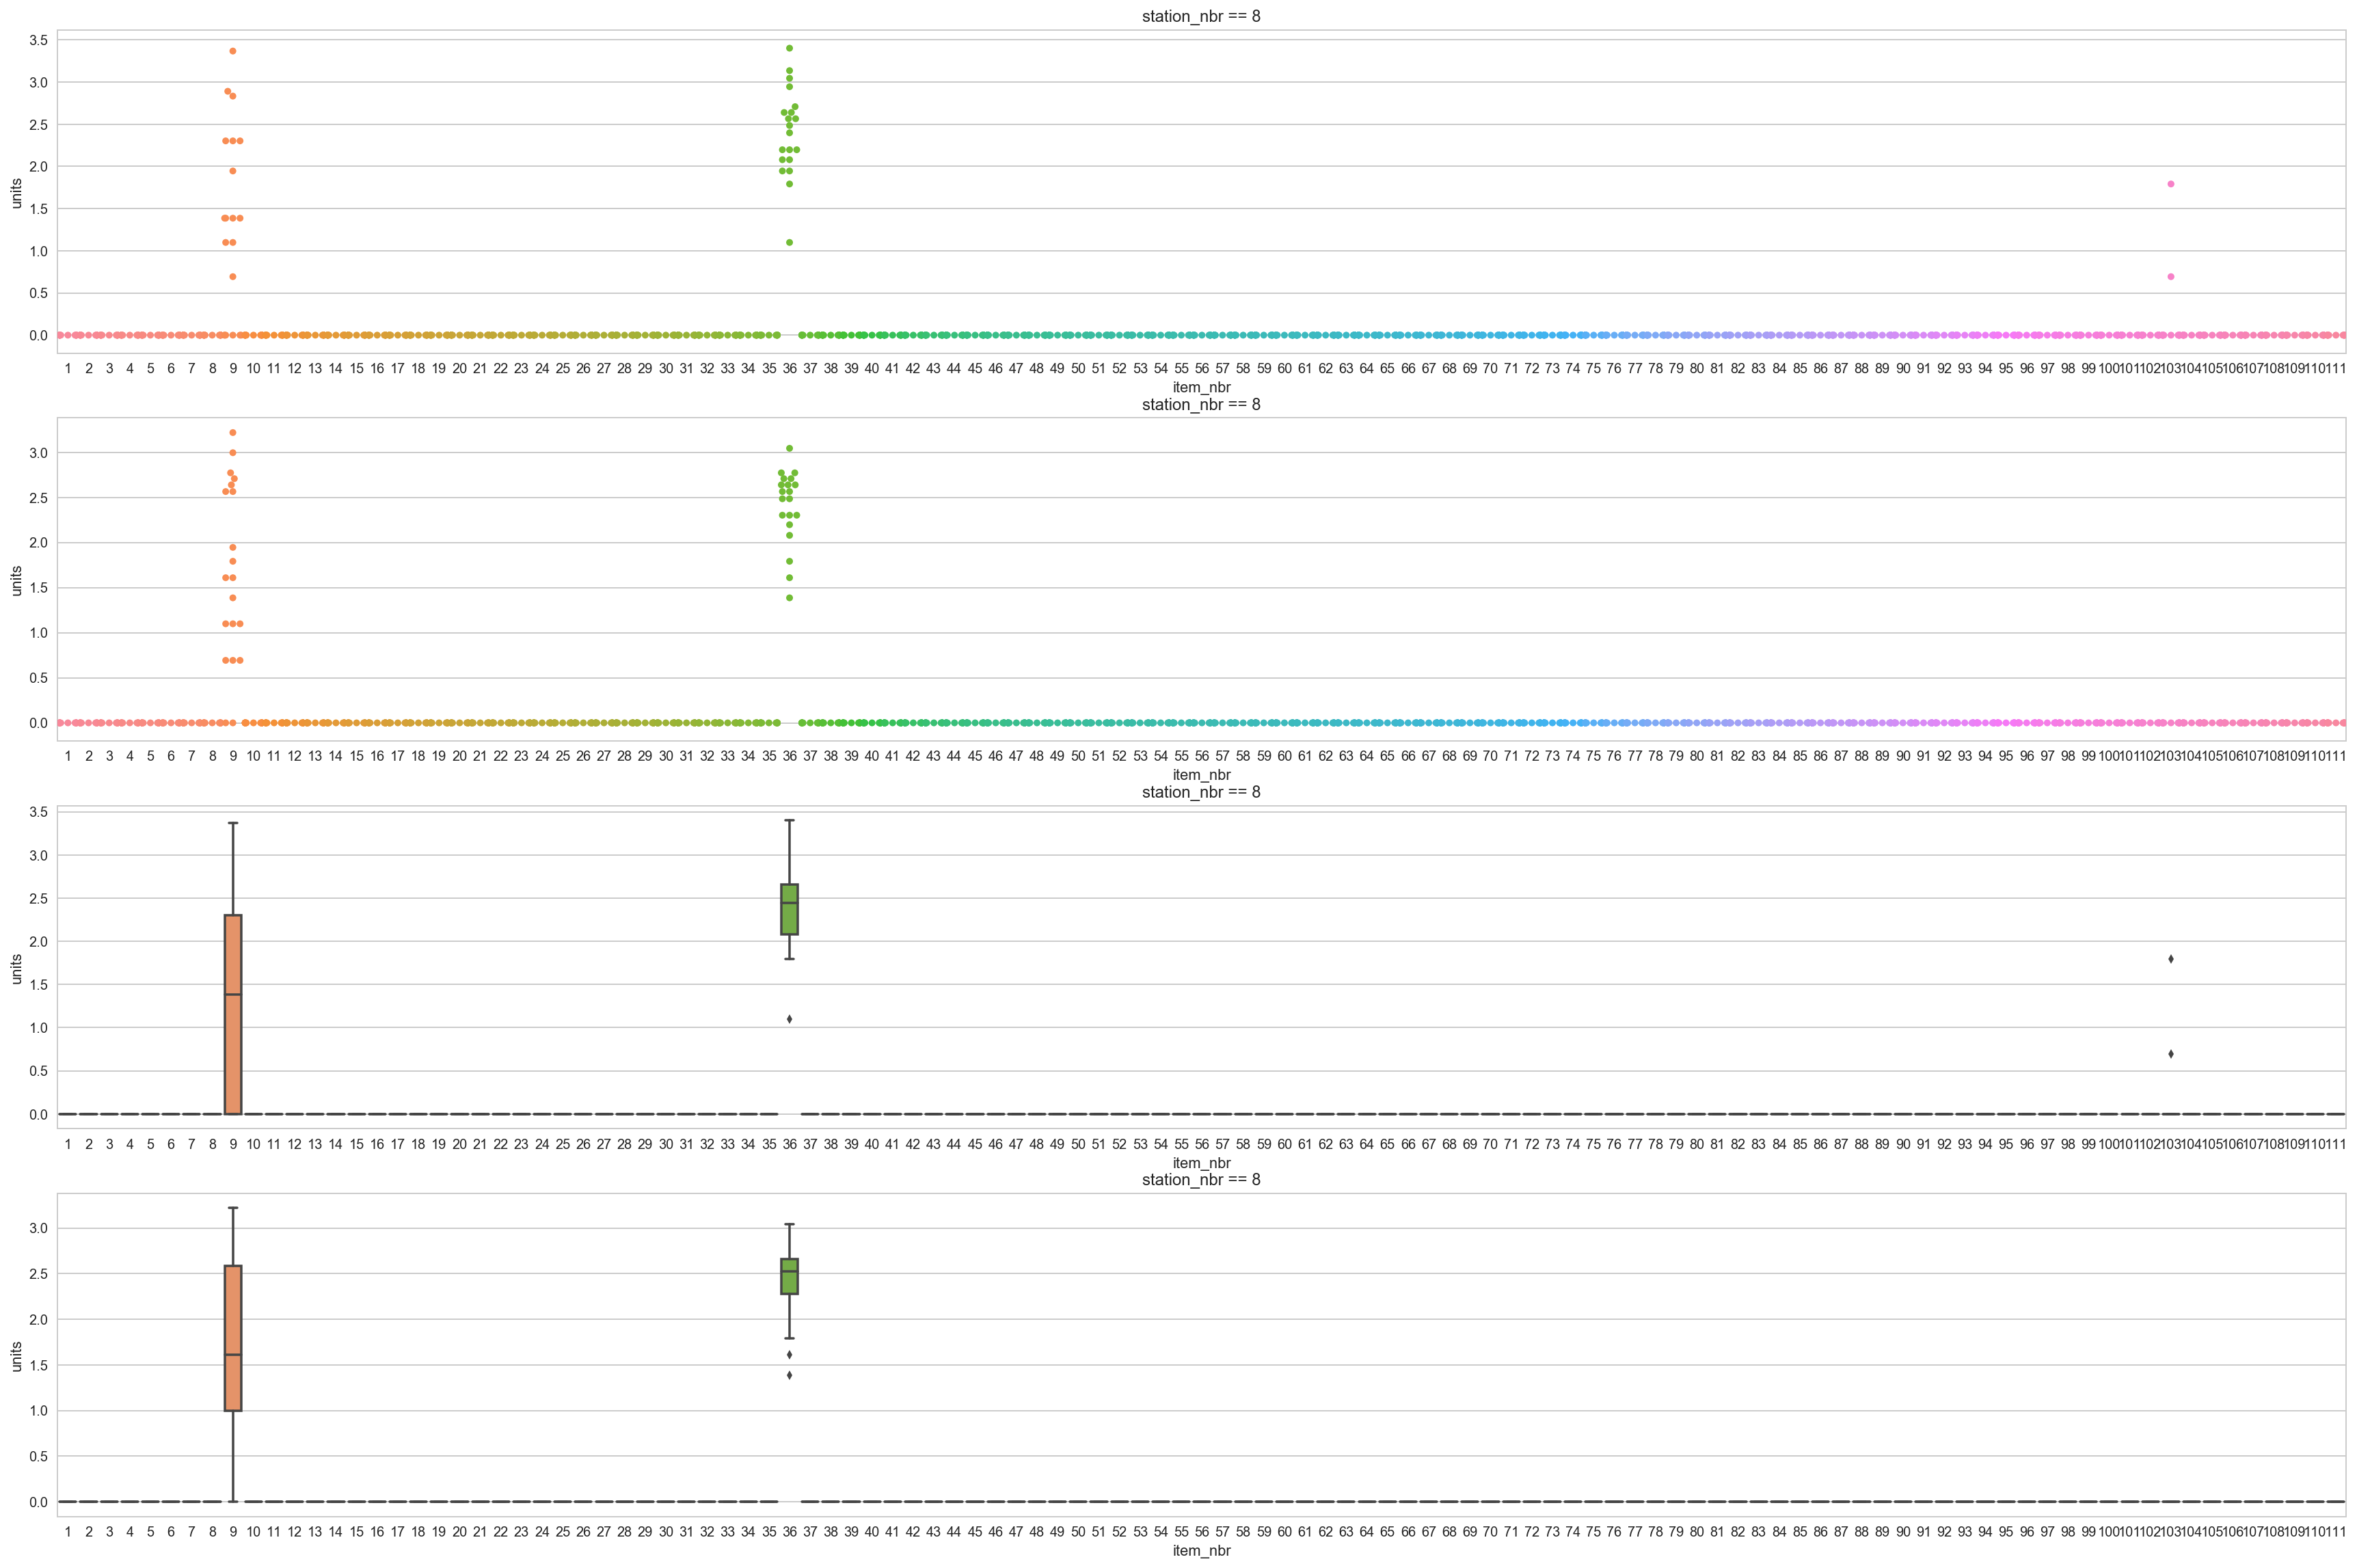

In [81]:
# station_nbr == 8
# store_nbr == 39

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store39
data2 = processed_train_nonholiday_store39

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 8')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 8')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 8')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 8')

plt.show()

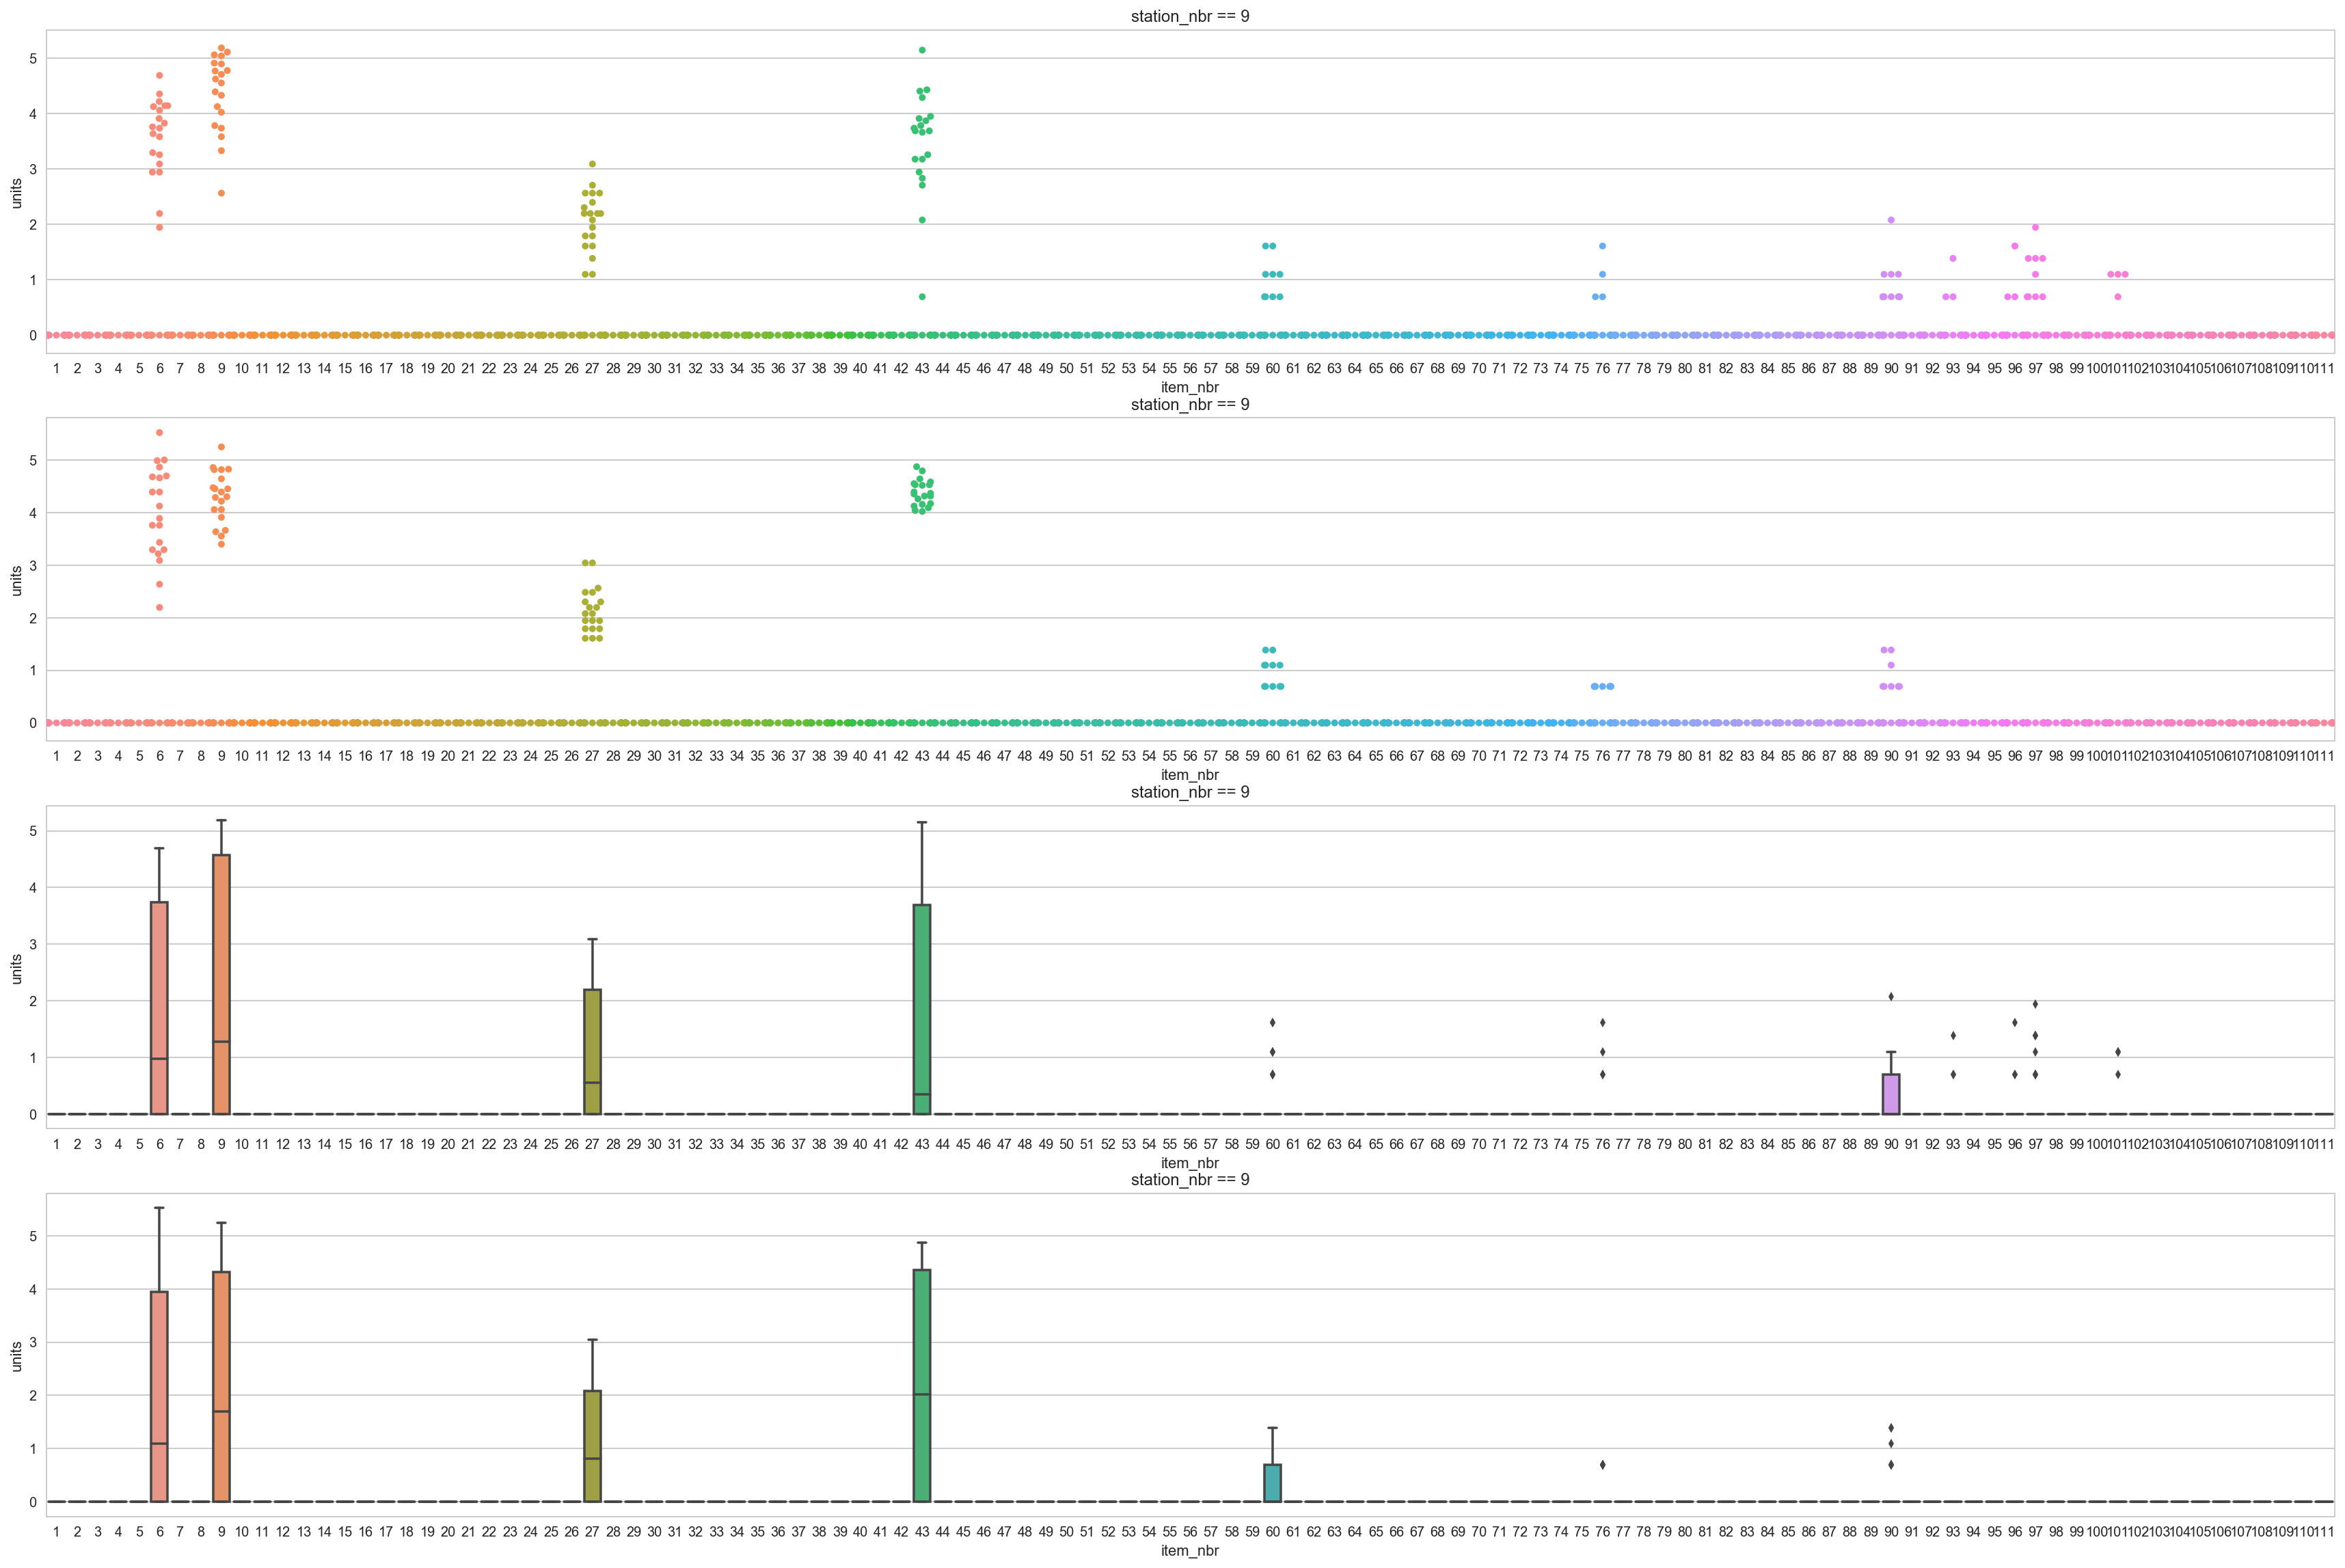

In [82]:
# station_nbr == 9
# store_nbr == 4, 24

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store4, processed_train_holiday_store24])
data2 = pd.concat([processed_train_nonholiday_store4, processed_train_nonholiday_store24])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 9')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 9')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 9')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 9')

plt.show()

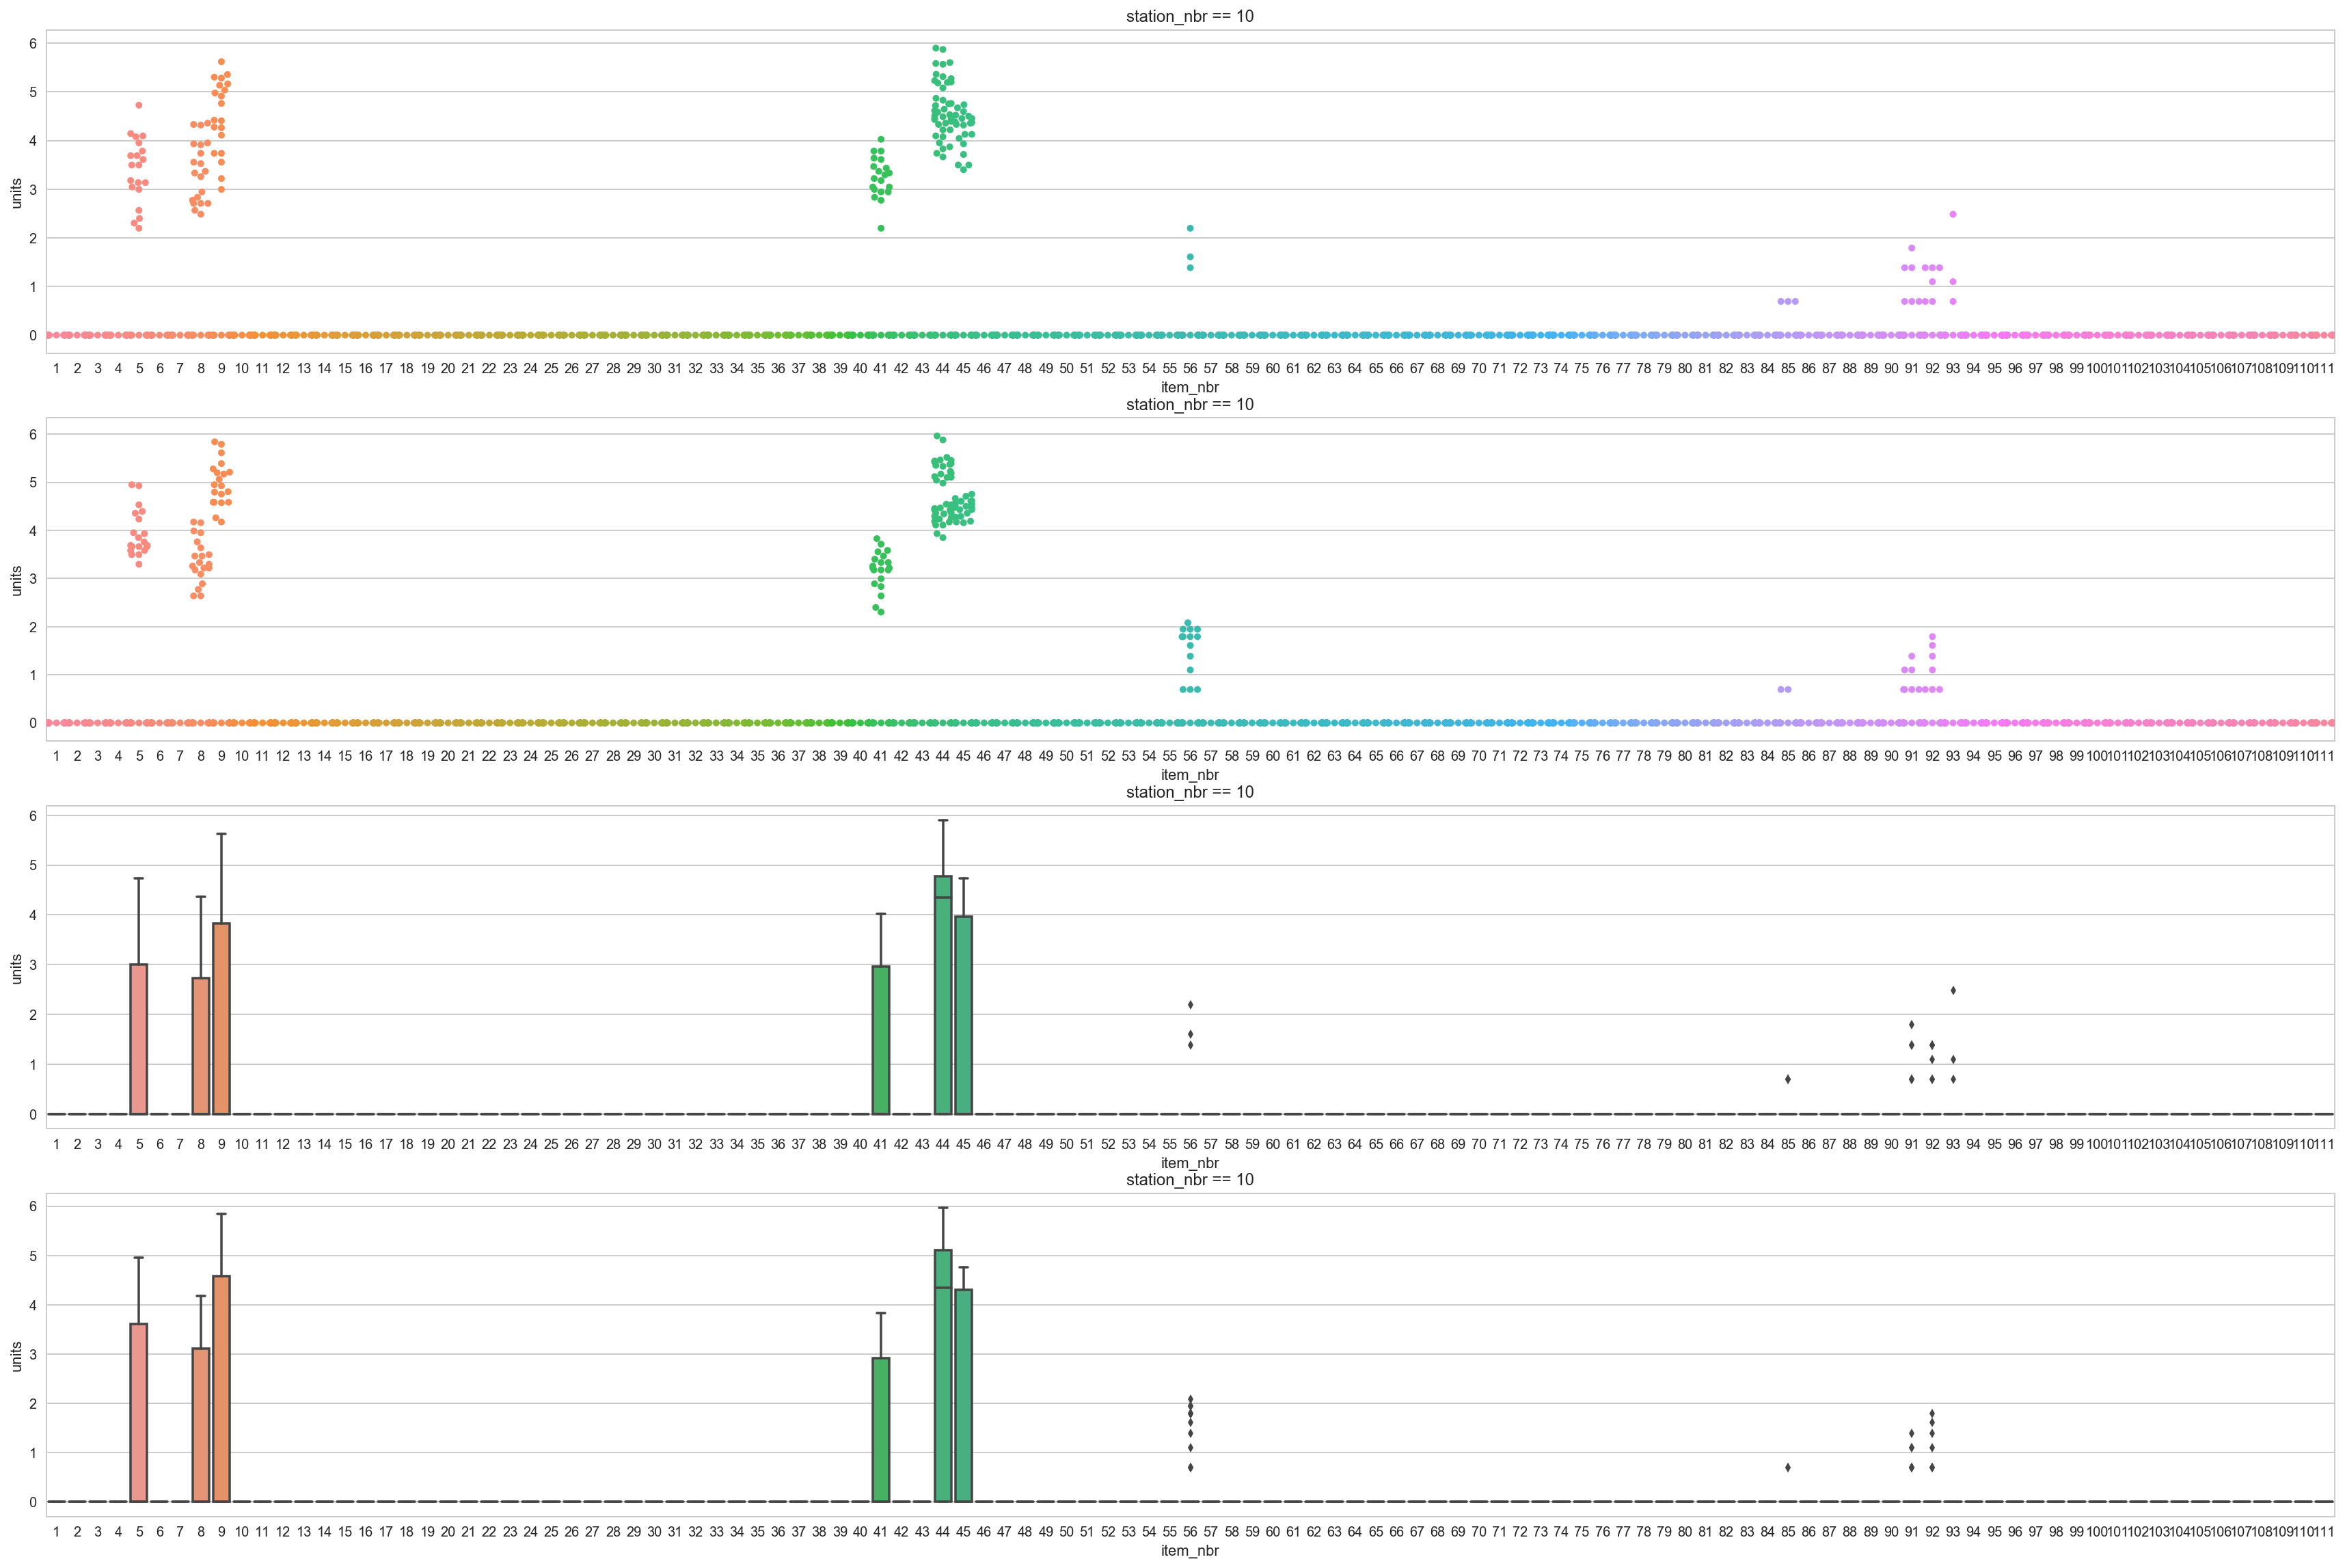

In [83]:
# station_nbr == 10
# store_nbr == 11, 22, 27

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store11, processed_train_holiday_store22, processed_train_holiday_store27])
data2 = pd.concat([processed_train_nonholiday_store11, processed_train_nonholiday_store22, processed_train_nonholiday_store27])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = temp1)
plt.title('station_nbr == 10')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = temp2)
plt.title('station_nbr == 10')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = temp1)
plt.title('station_nbr == 10')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = temp2)
plt.title('station_nbr == 10')

plt.show()

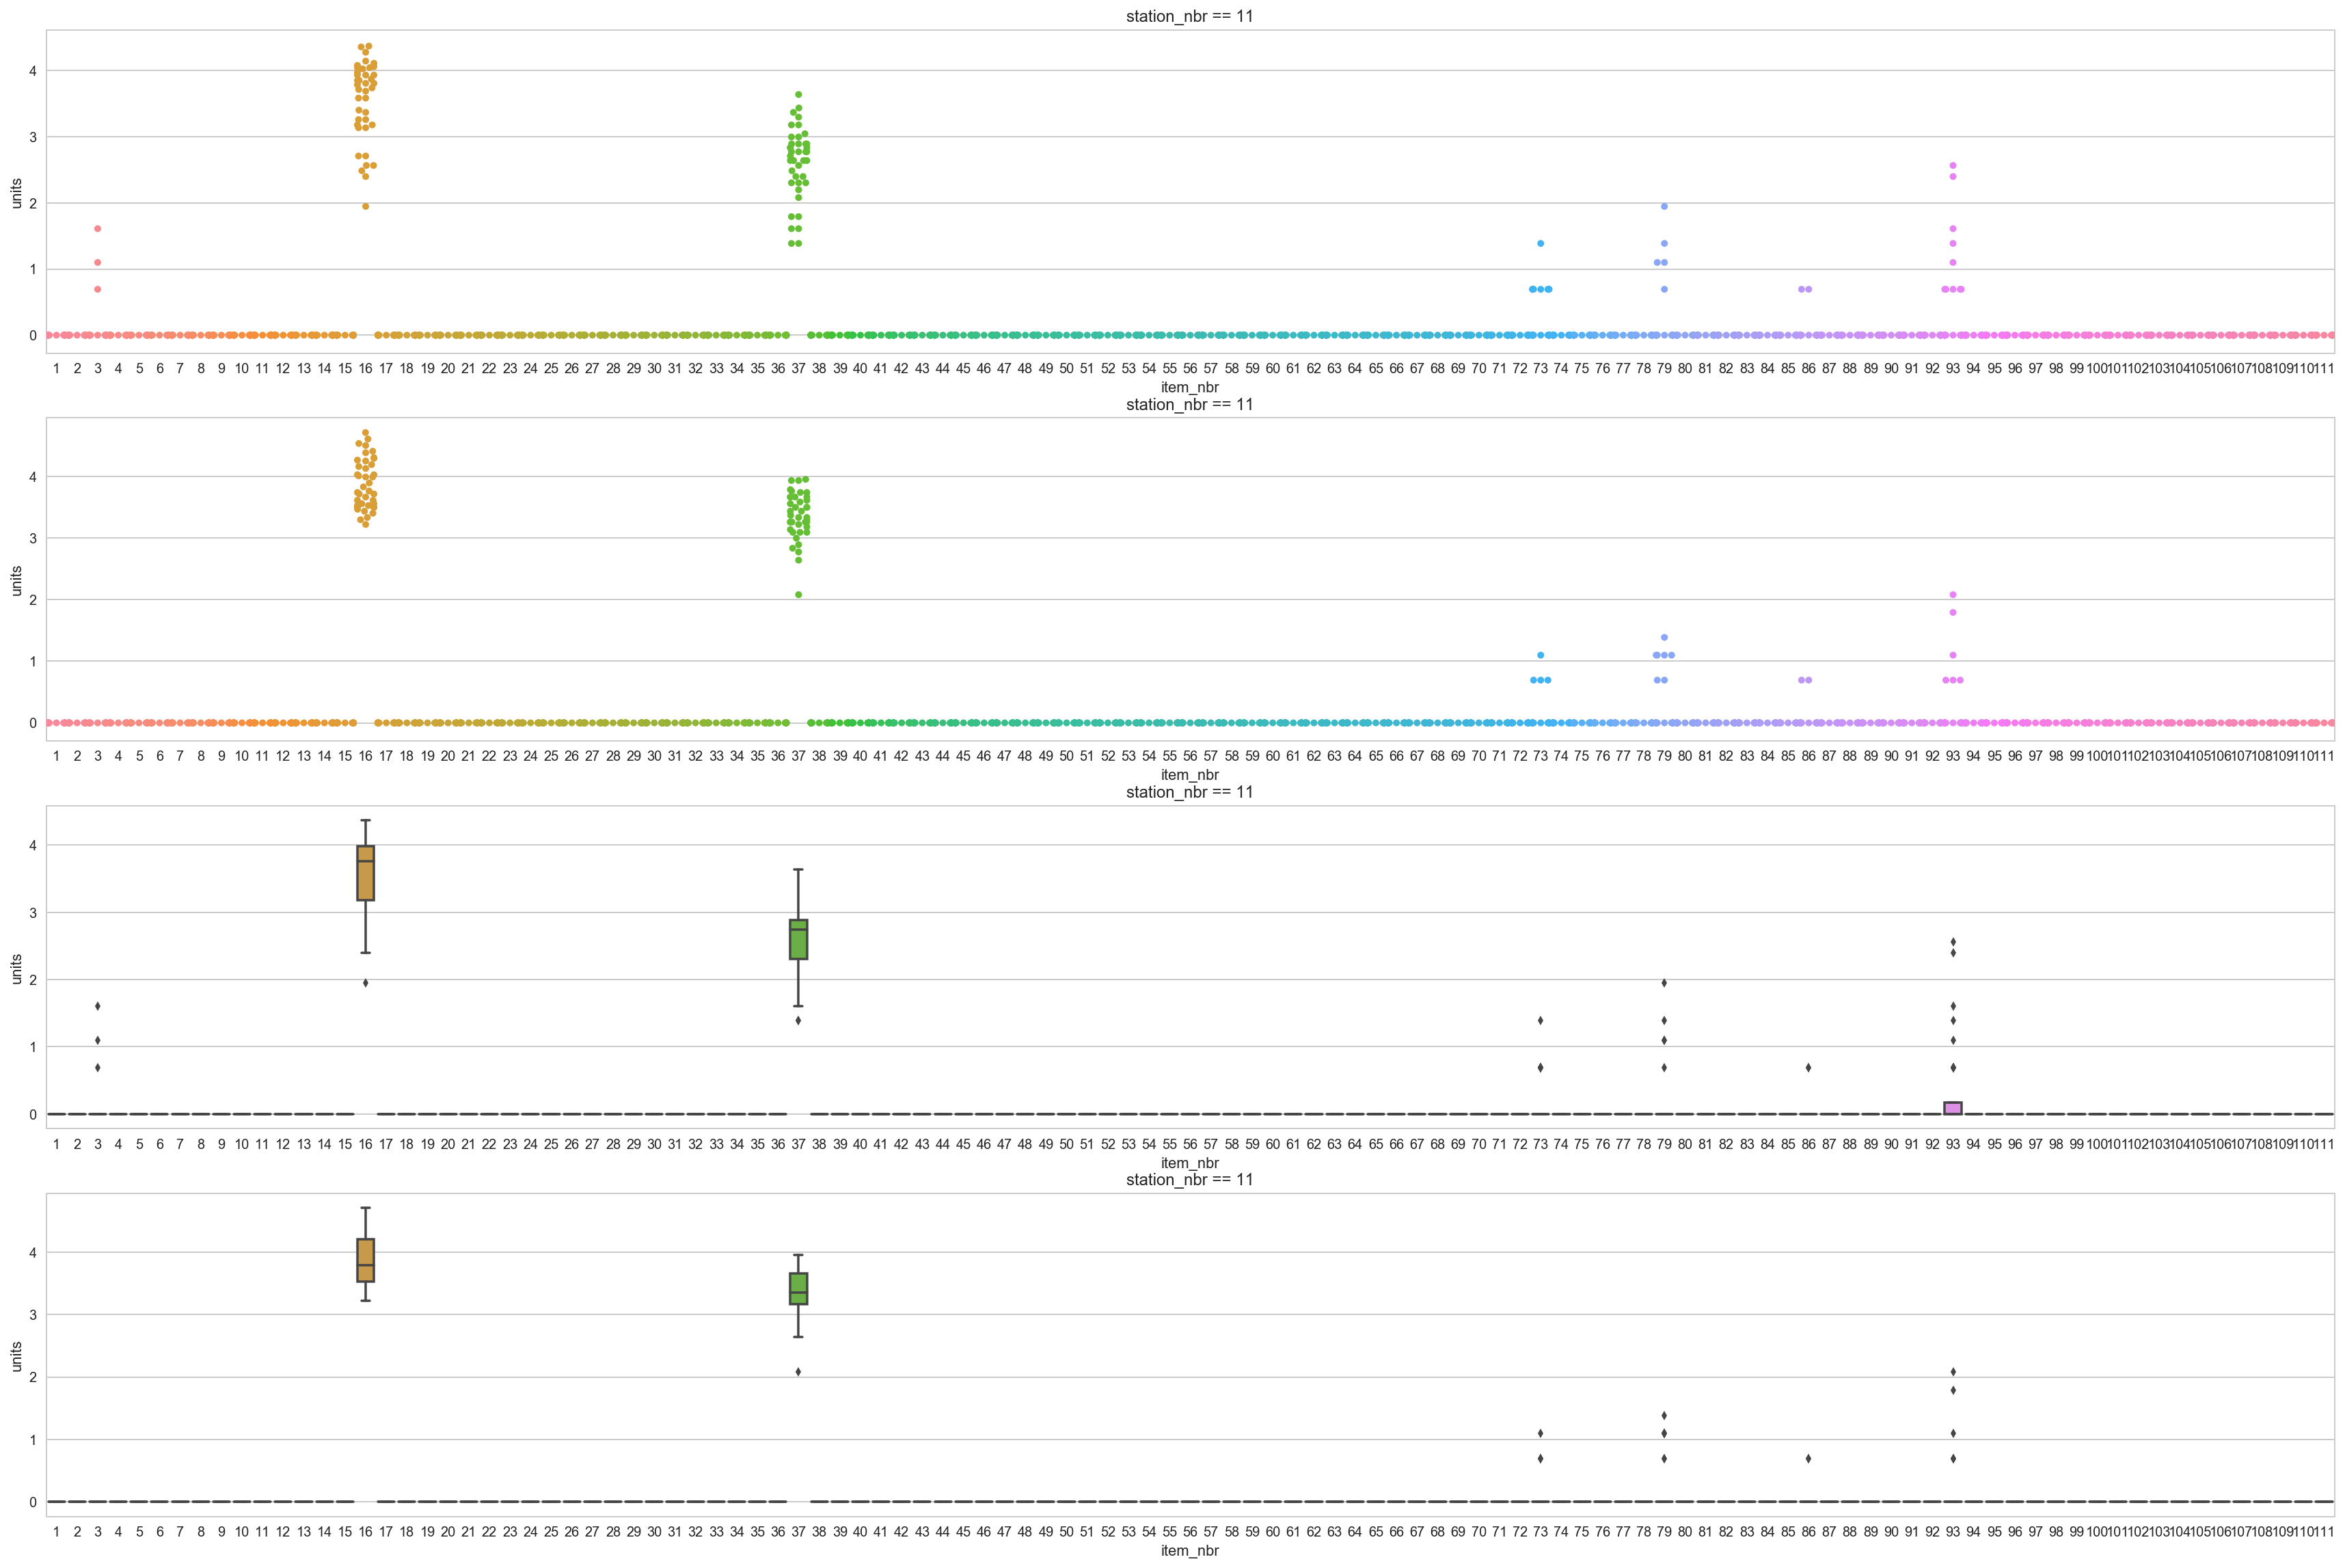

In [84]:
# station_nbr == 11
# store_nbr == 12, 43

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store12, processed_train_holiday_store43])
data2 = pd.concat([processed_train_nonholiday_store12, processed_train_nonholiday_store43])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 11')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 11')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 11')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 11')

plt.show()

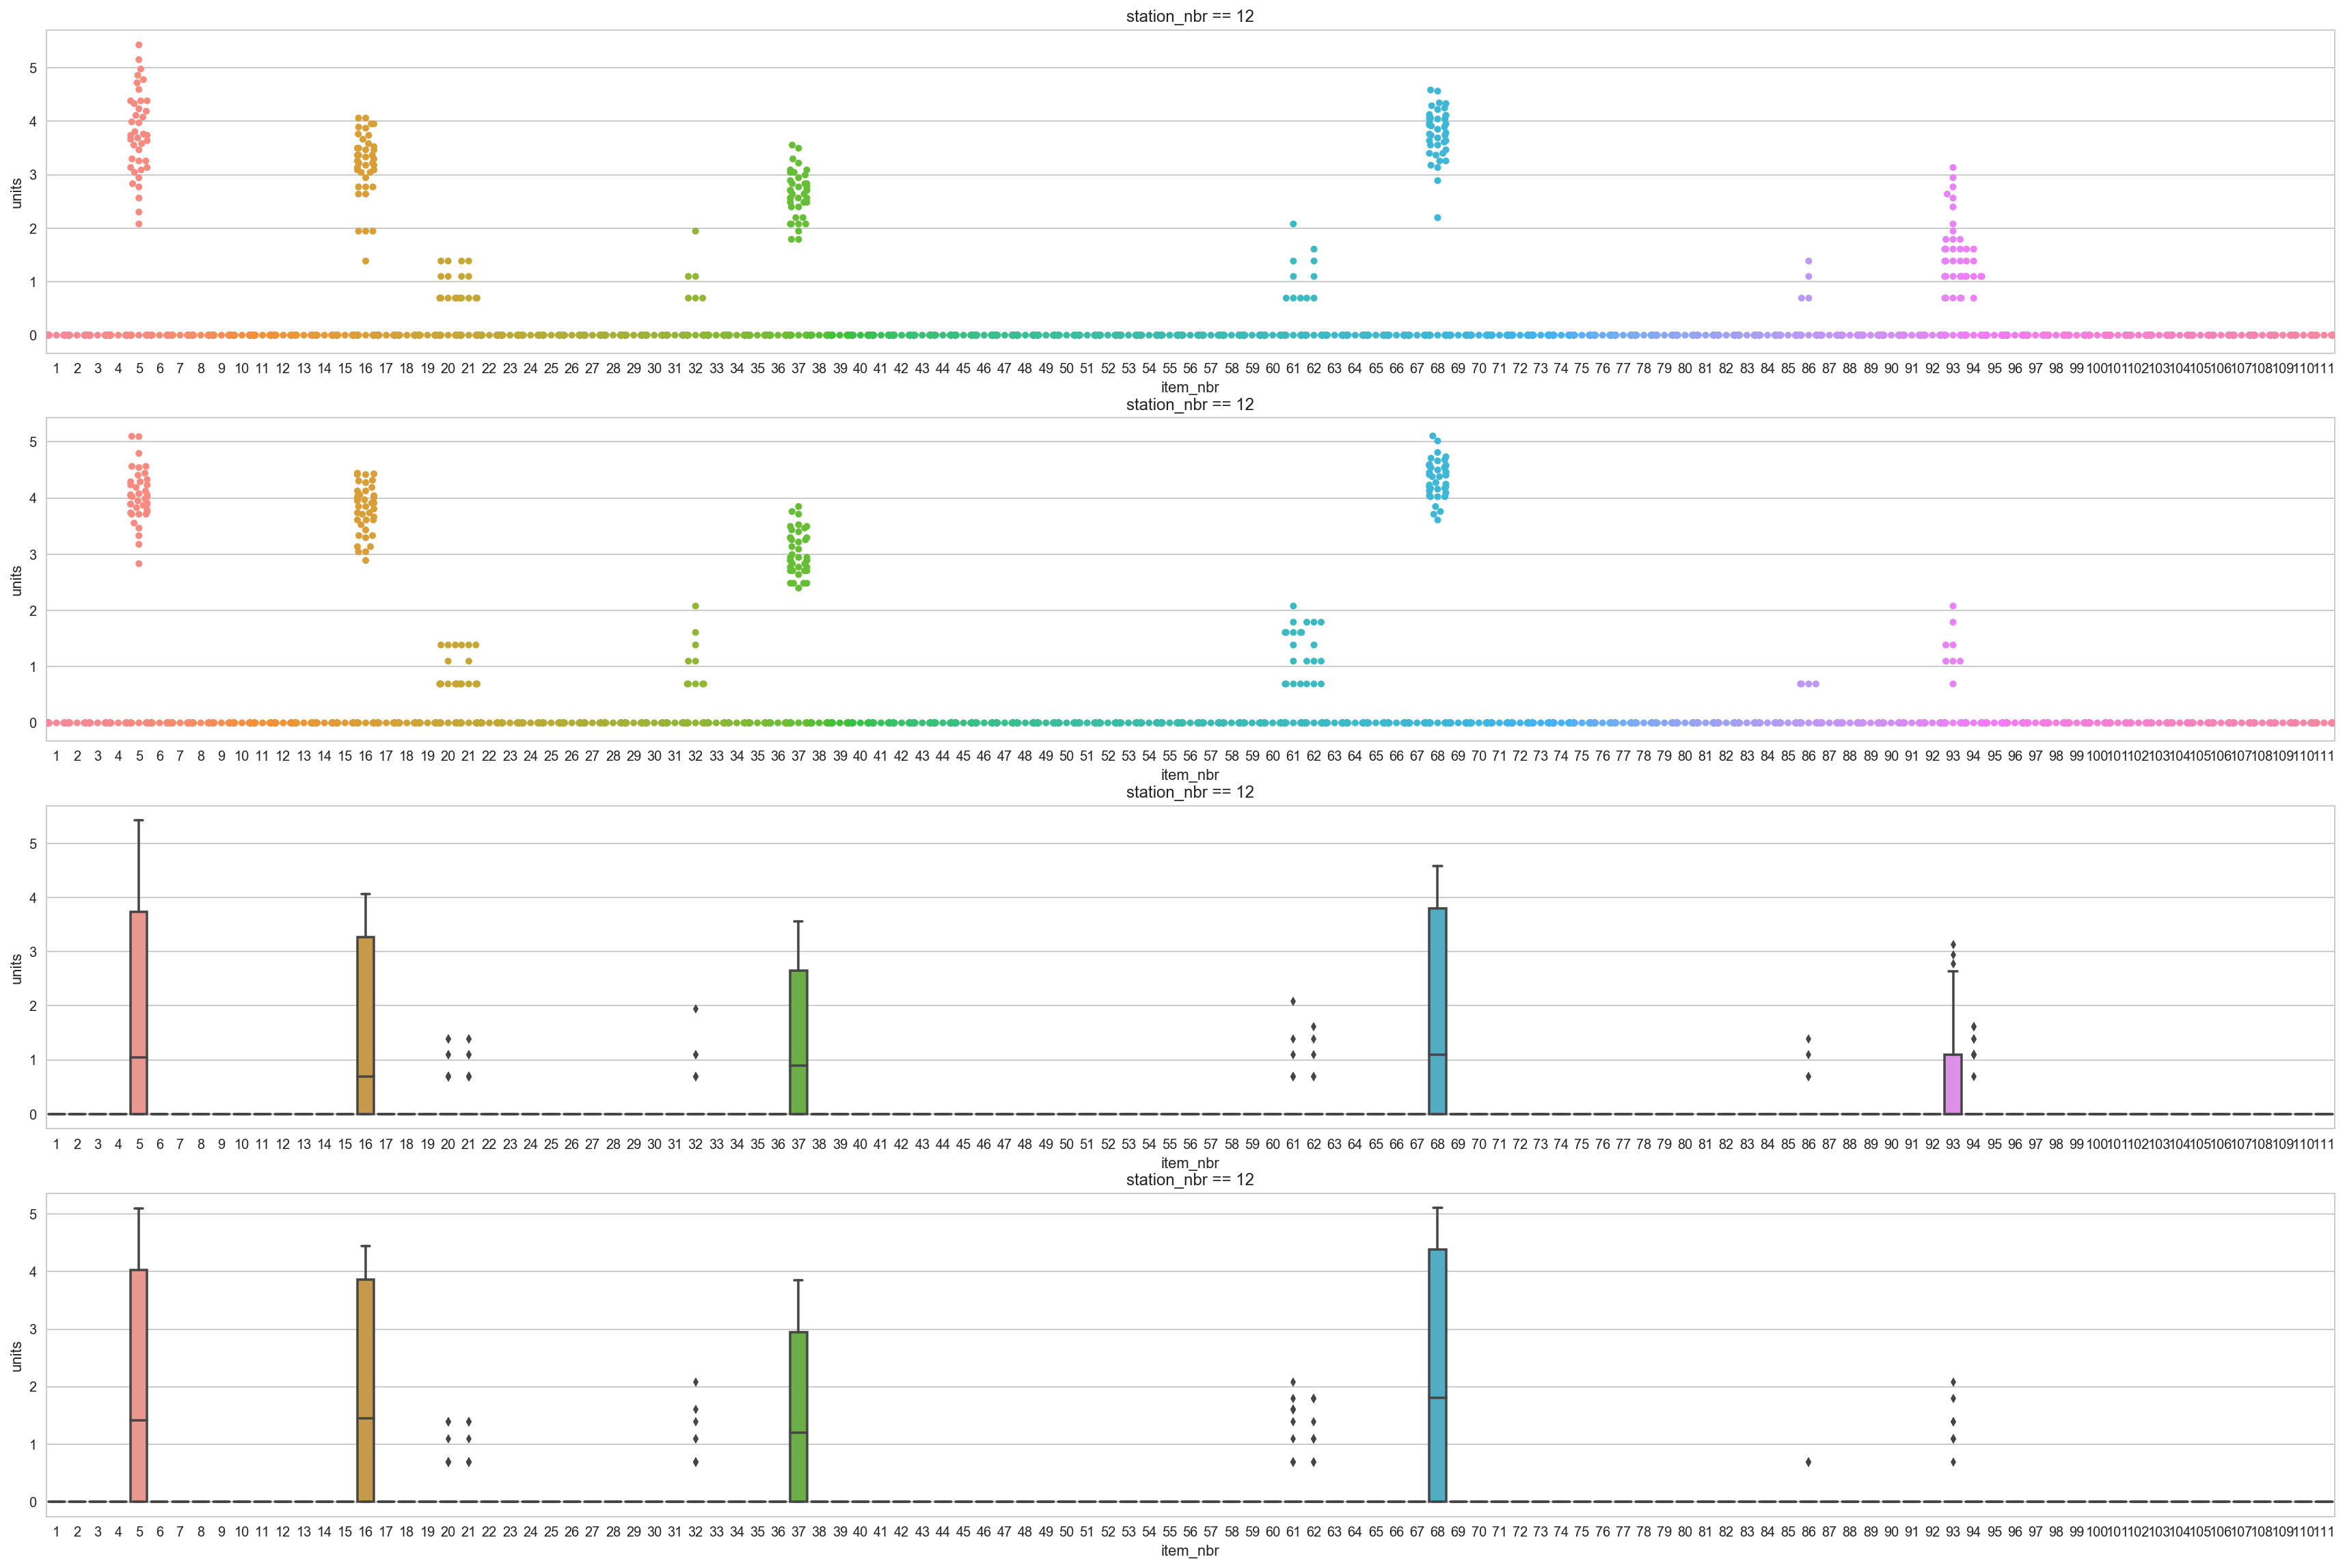

In [85]:
# station_nbr == 12
# store_nbr == 5, 10, 41, 44

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store5, processed_train_holiday_store10, processed_train_holiday_store41,
                  processed_train_holiday_store44])
data2 = pd.concat([processed_train_nonholiday_store5, processed_train_nonholiday_store10, processed_train_nonholiday_store41,
                  processed_train_nonholiday_store44])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 12')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 12')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 12')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 12')

plt.show()

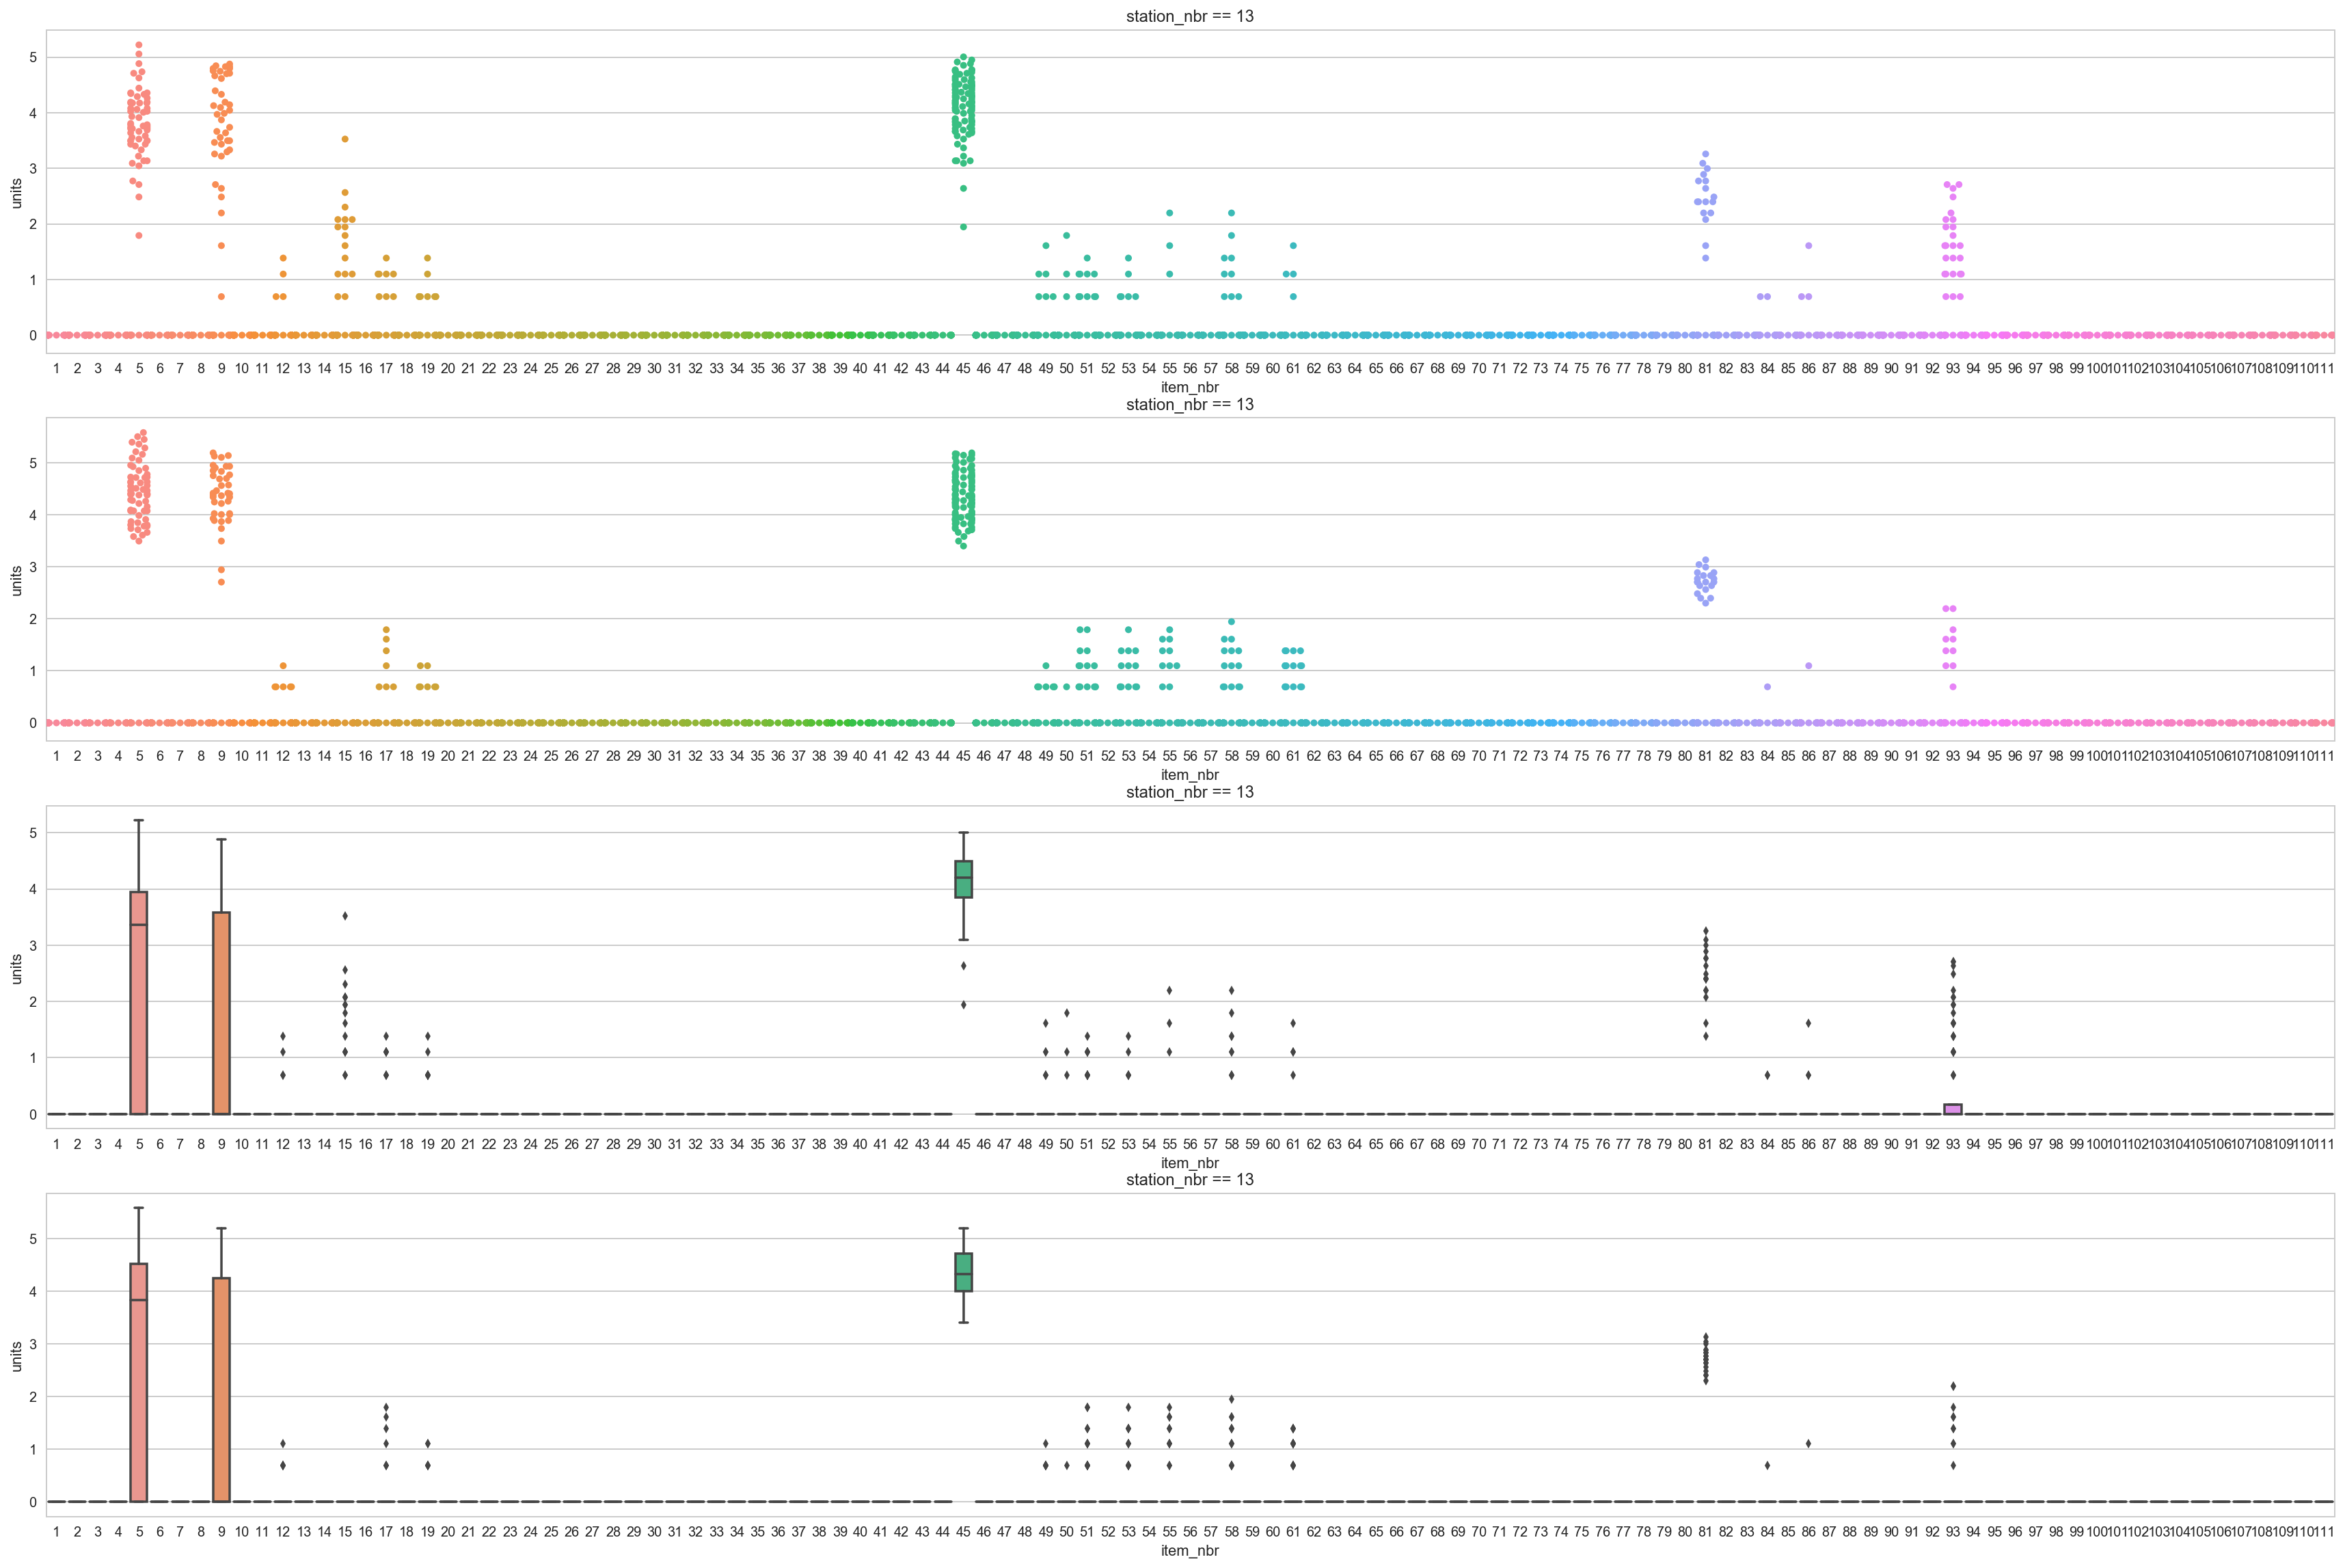

In [86]:
# station_nbr == 13
# store_nbr == 15, 25, 32, 37, 40

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store15, processed_train_holiday_store25, processed_train_holiday_store32,
                  processed_train_holiday_store37, processed_train_holiday_store40])
data2 = pd.concat([processed_train_nonholiday_store15, processed_train_nonholiday_store25, processed_train_nonholiday_store32,
                  processed_train_nonholiday_store37, processed_train_nonholiday_store40])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 13')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 13')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 13')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 13')

plt.show()

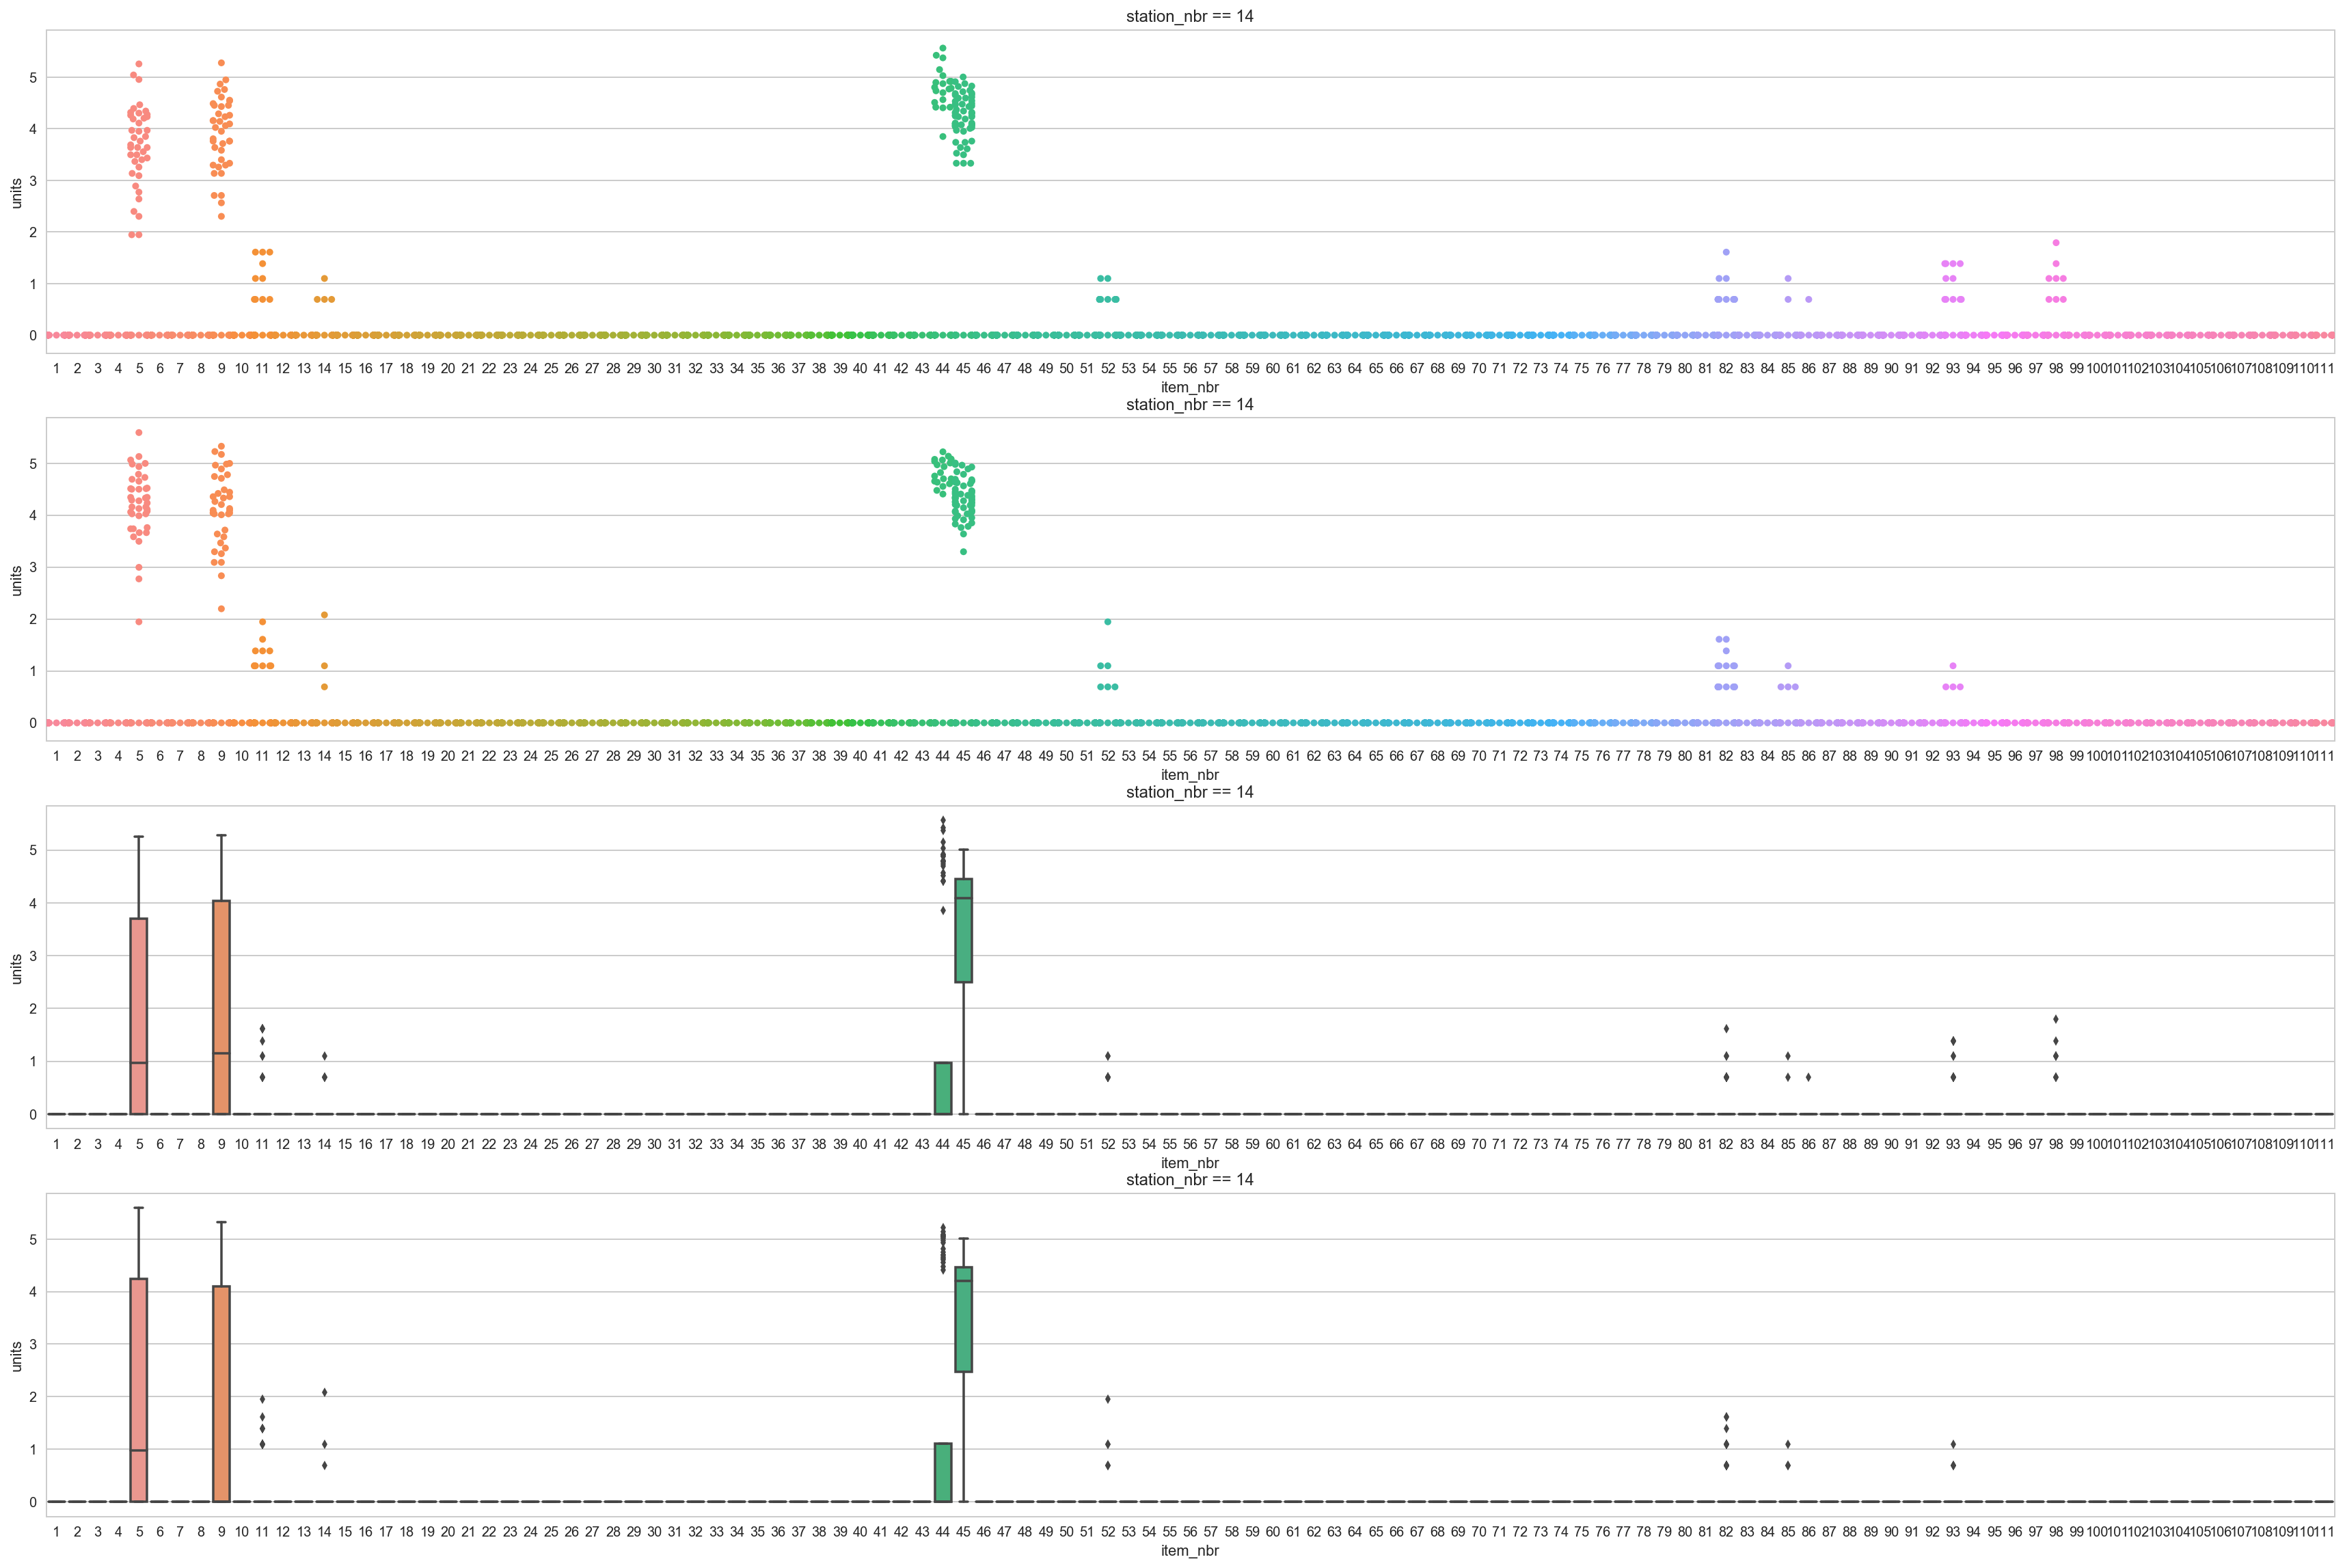

In [87]:
# station_nbr == 14
# store_nbr == 2, 6, 38, 42

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store2, processed_train_holiday_store6, processed_train_holiday_store38,
                  processed_train_holiday_store42])
data2 = pd.concat([processed_train_nonholiday_store2, processed_train_nonholiday_store6, processed_train_nonholiday_store38,
                  processed_train_nonholiday_store42])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 14')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 14')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 14')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 14')

plt.show()

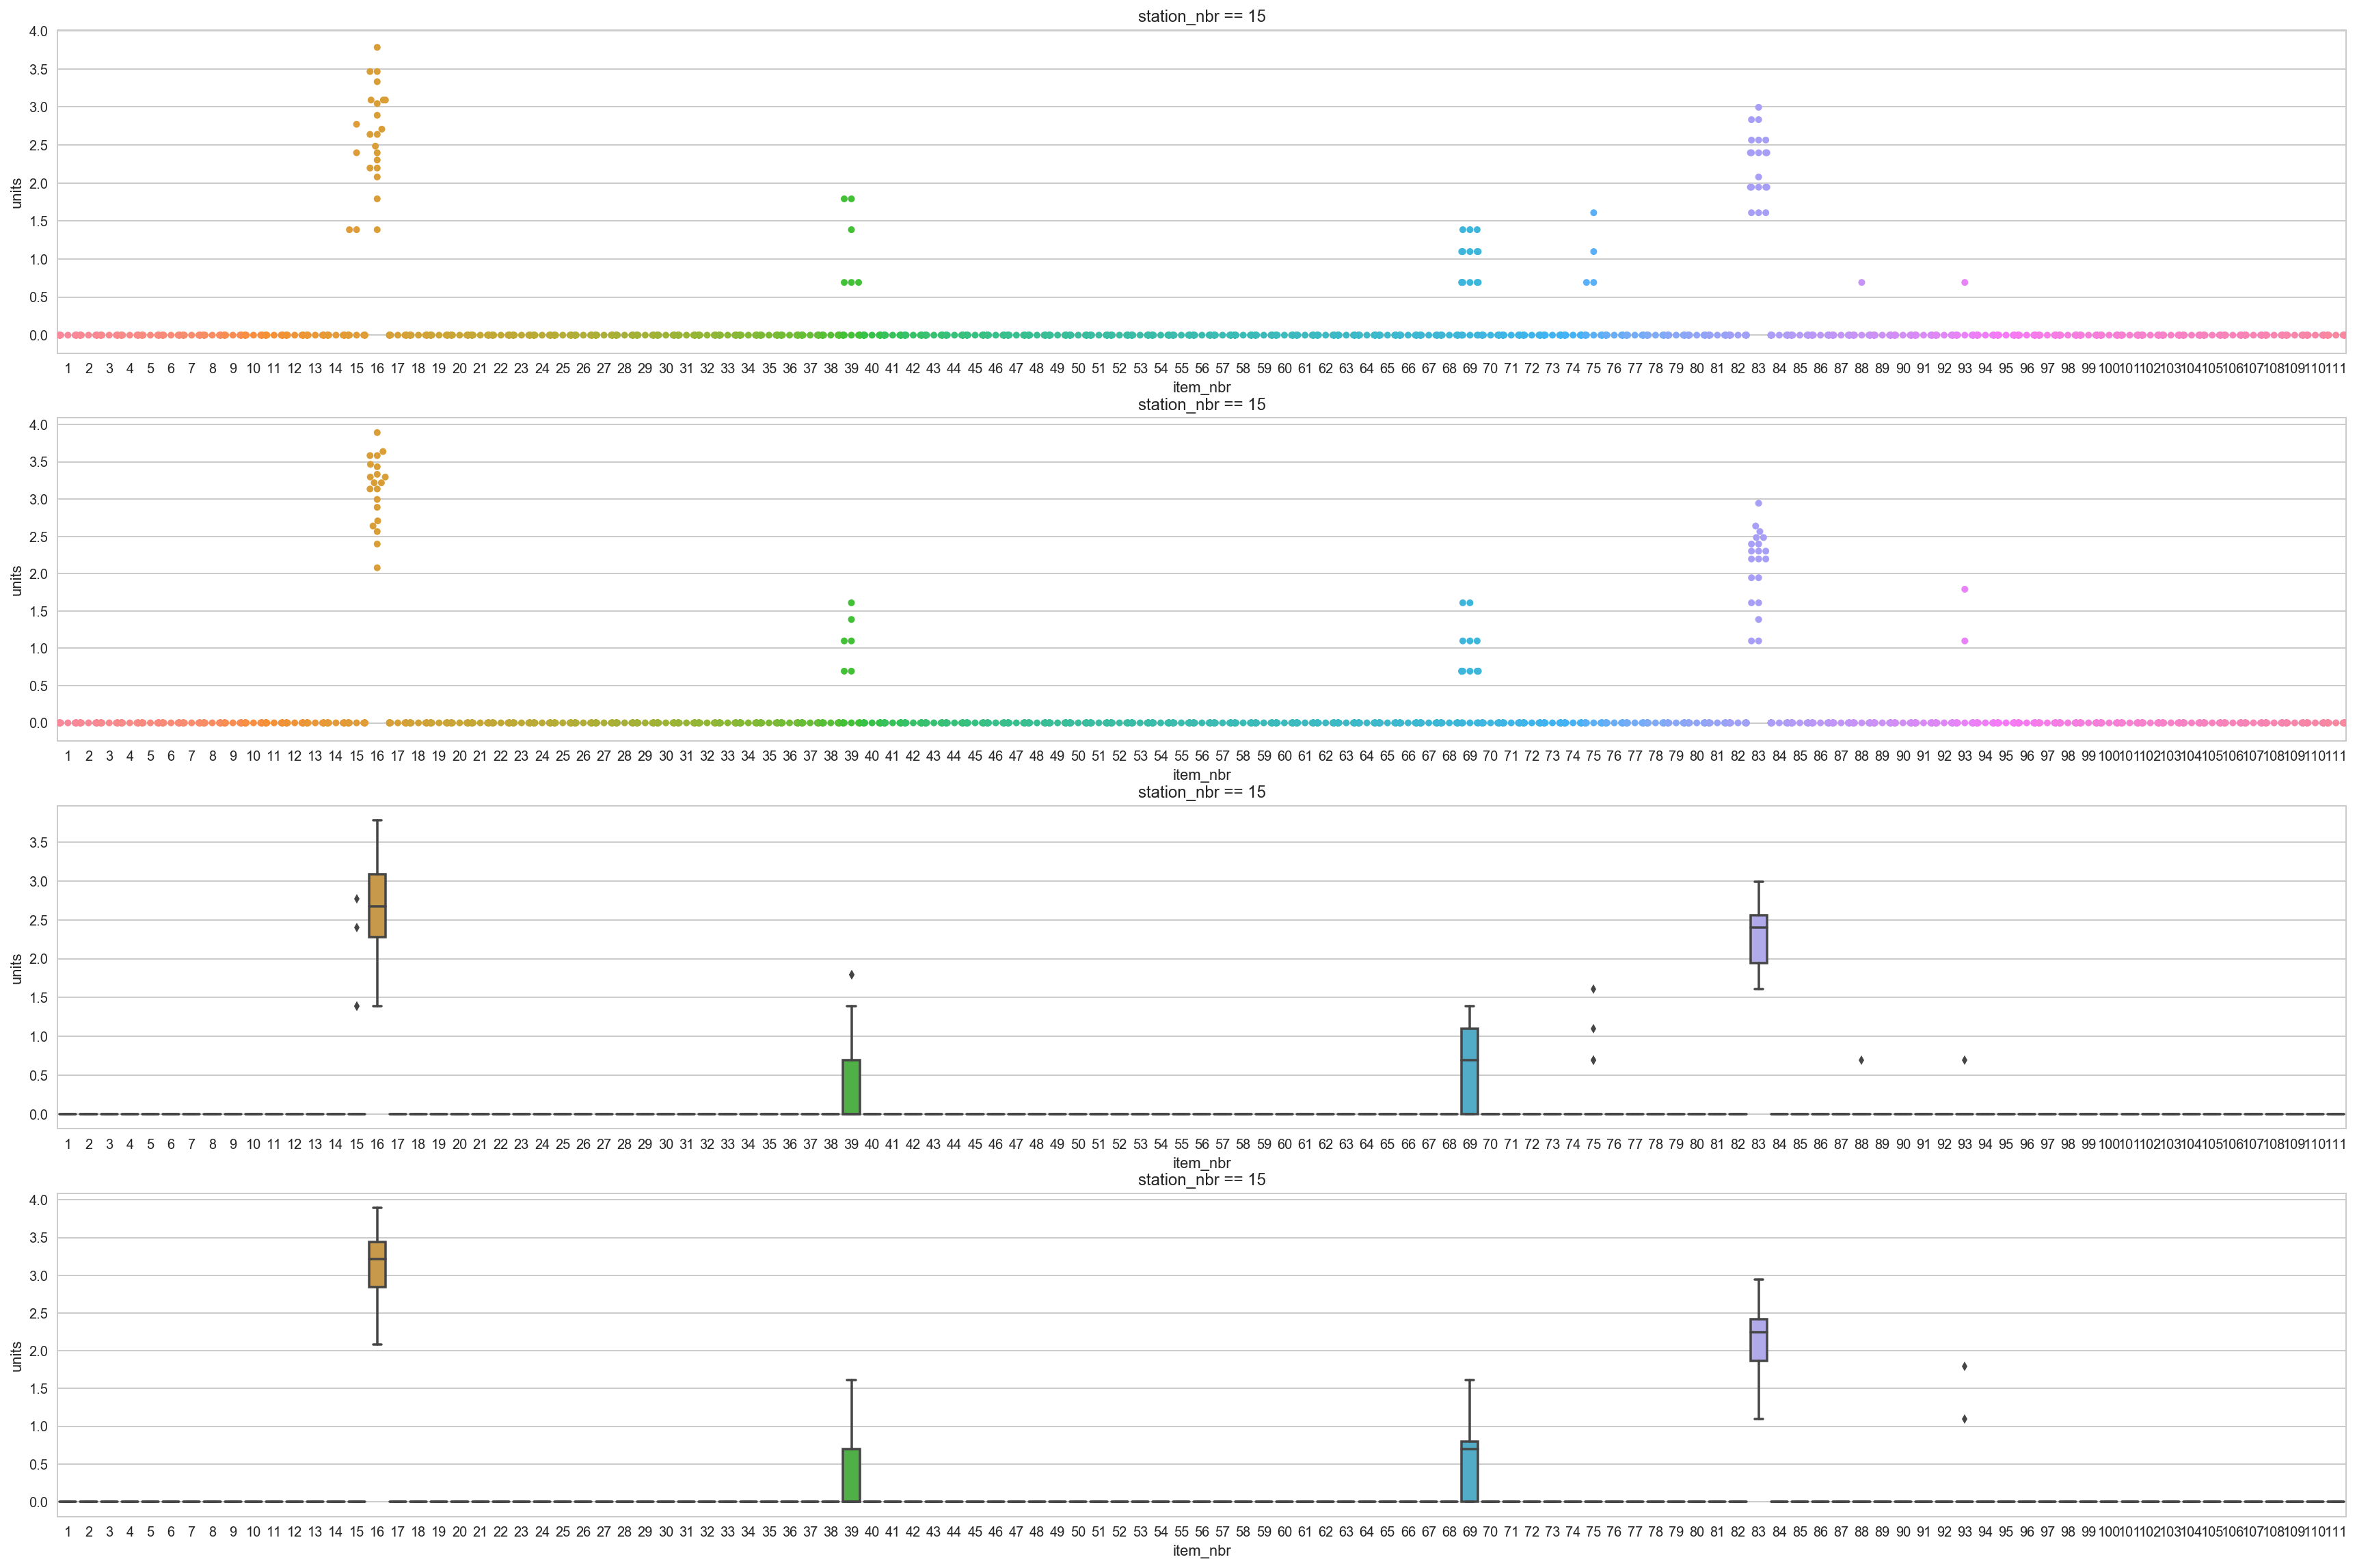

In [88]:
# station_nbr == 15
# store_nbr == 19

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store19
data2 = processed_train_nonholiday_store19

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 15')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 15')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 15')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 15')

plt.show()

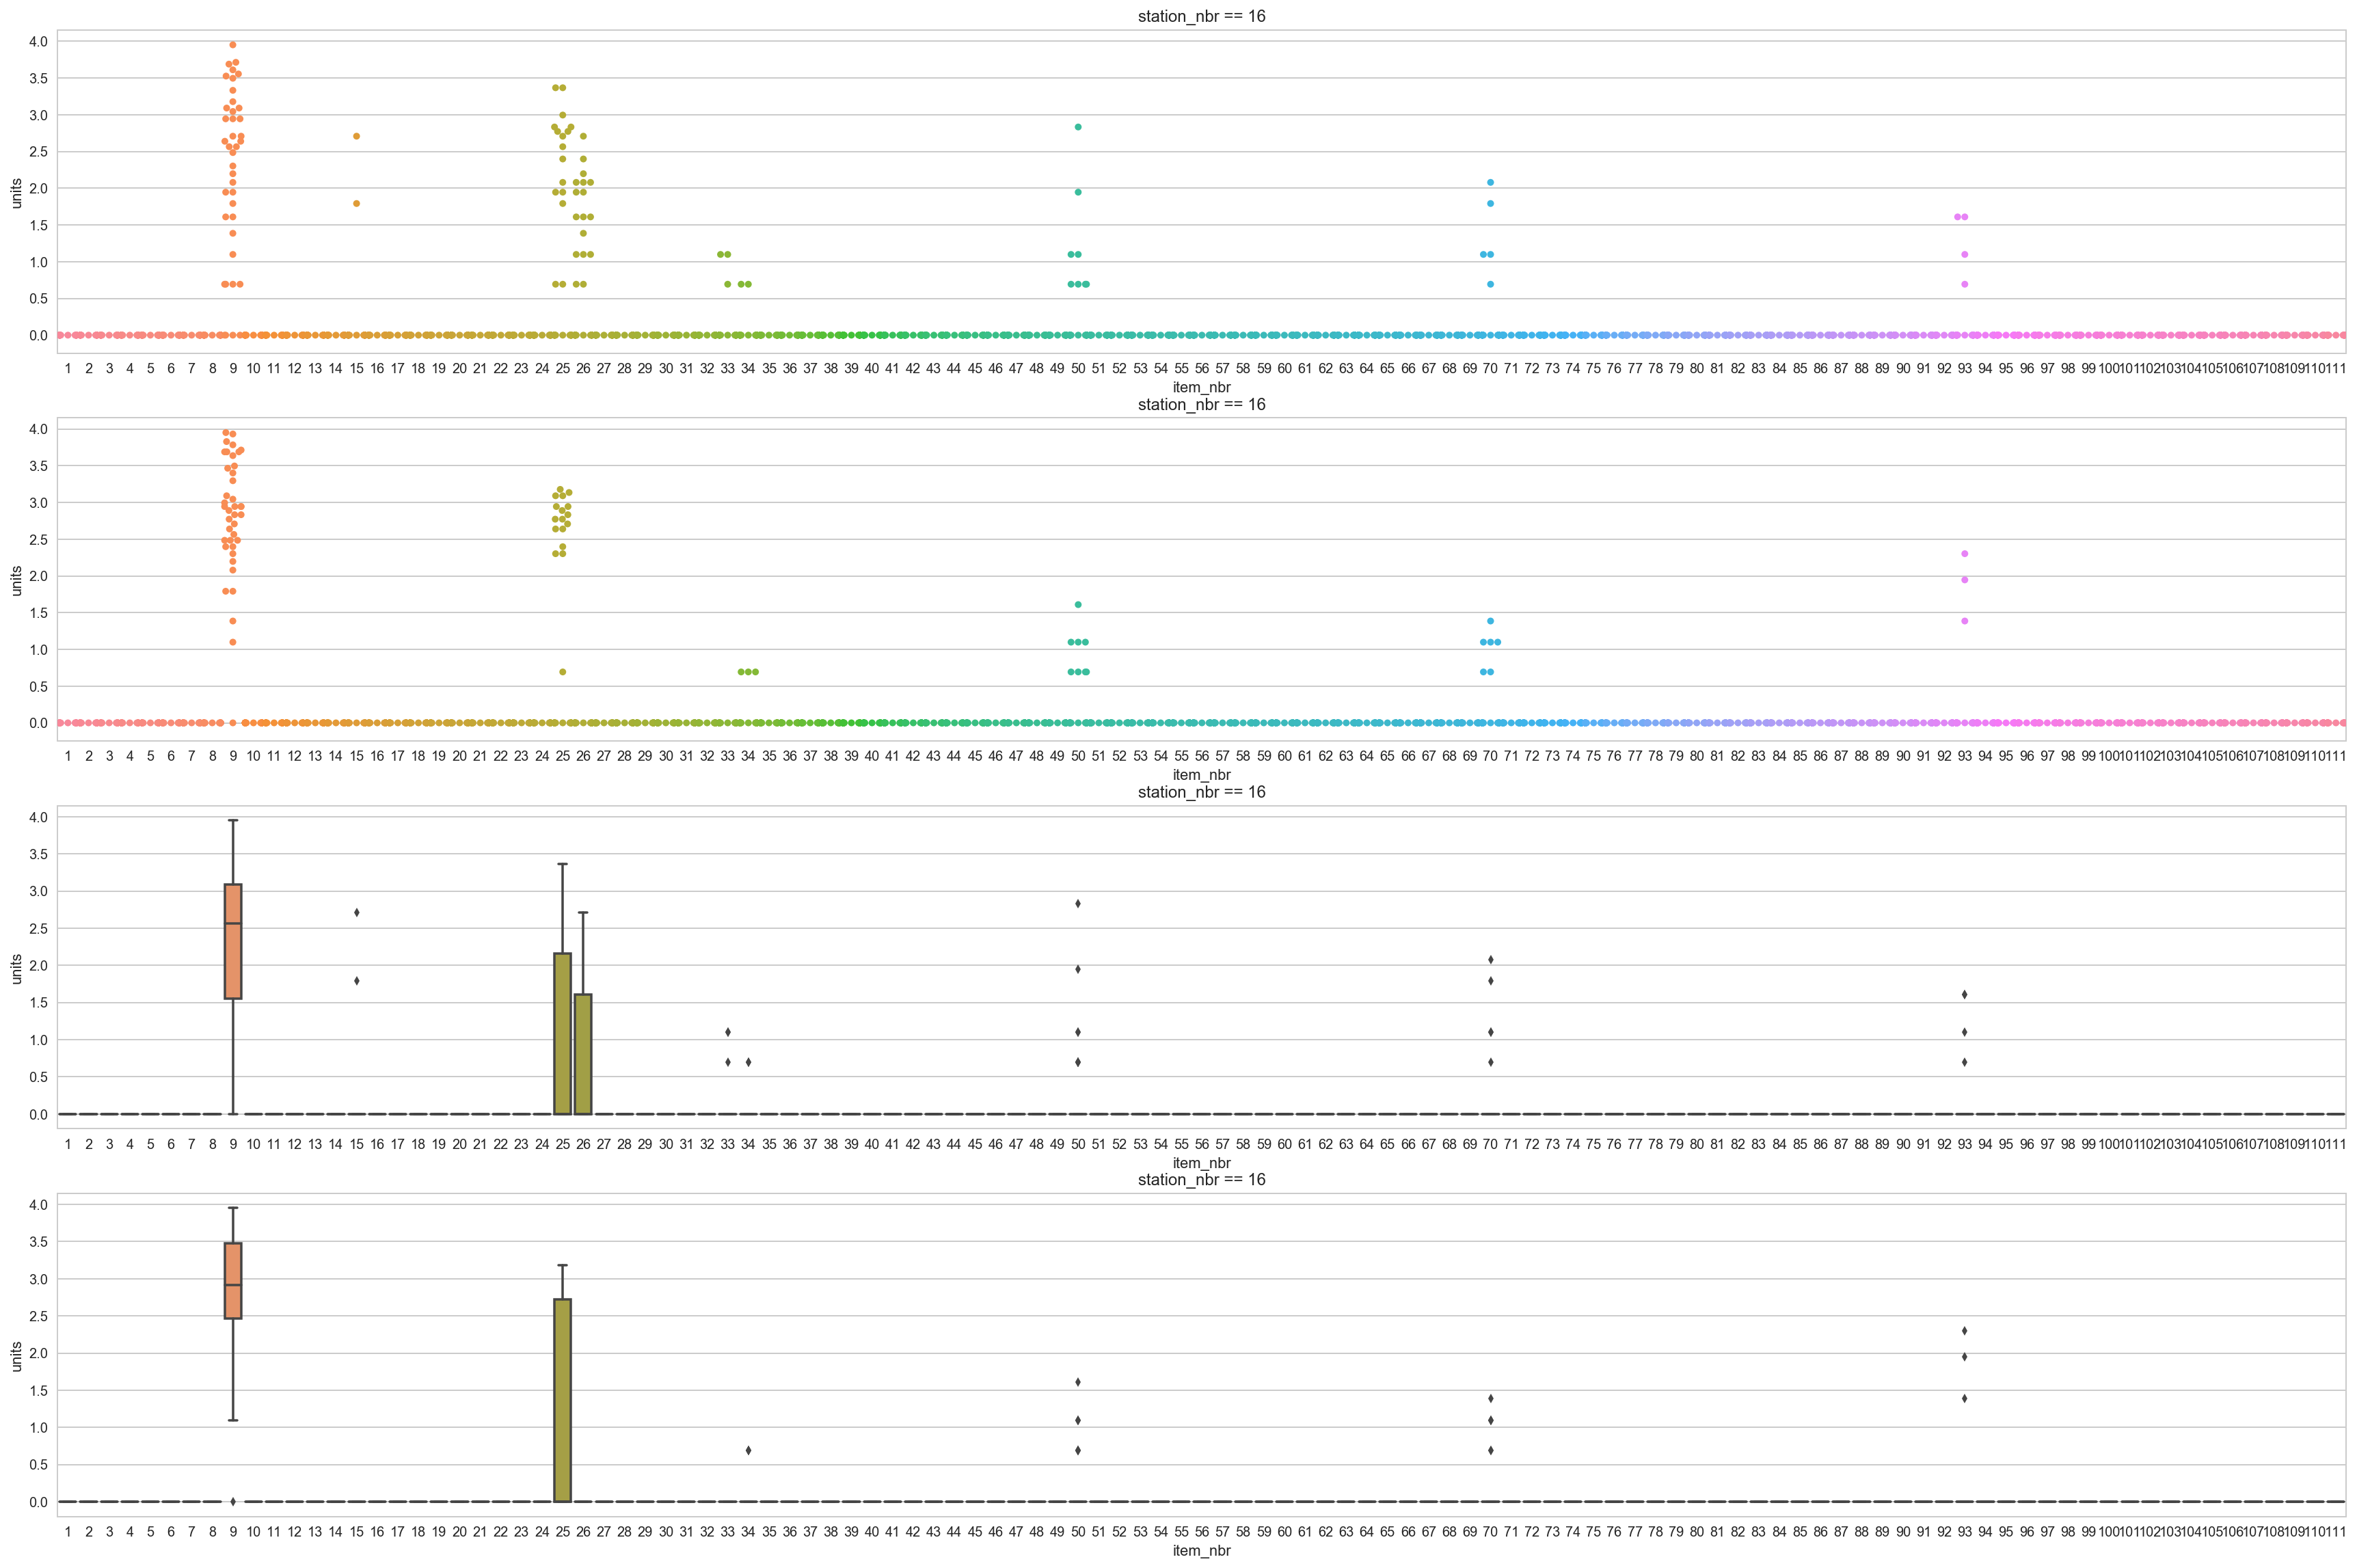

In [90]:
# station_nbr == 16
# store_nbr == 14, 45

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store14, processed_train_holiday_store45])
data2 = pd.concat([processed_train_nonholiday_store14, processed_train_nonholiday_store45])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 16')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 16')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 16')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 16')

plt.show()

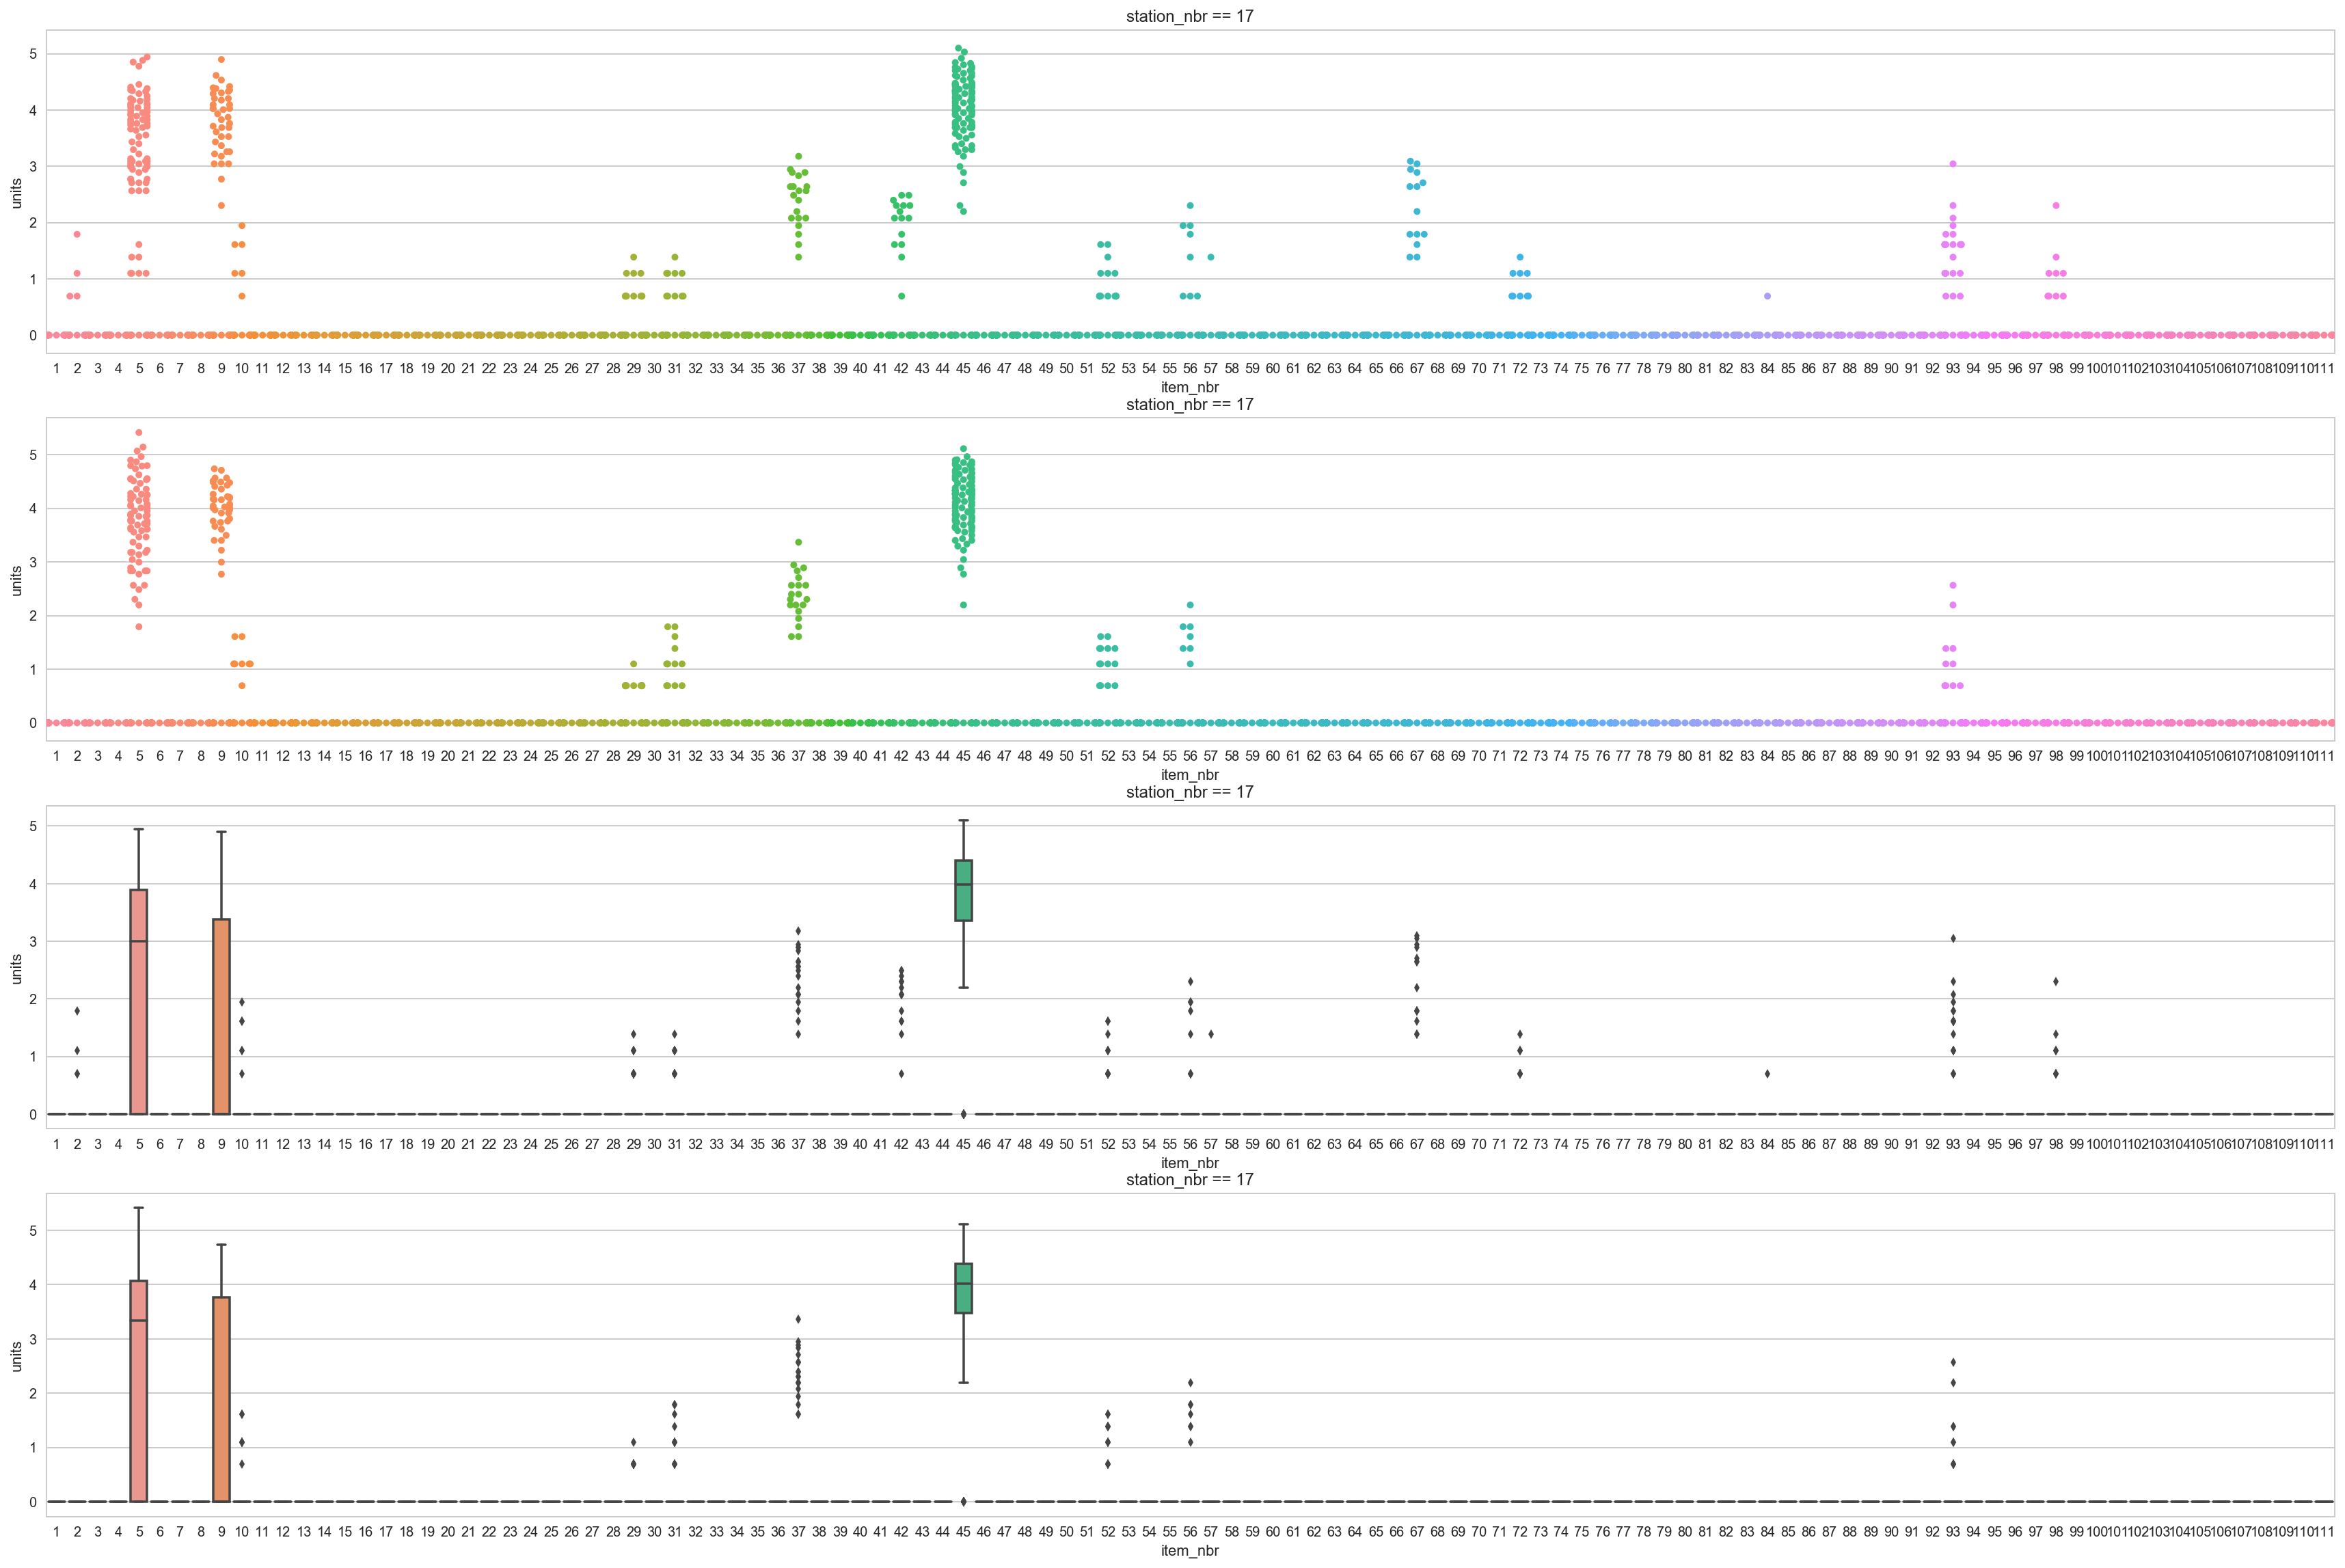

In [91]:
# station_nbr == 17
# store_nbr == 9, 18, 23, 26, 31, 34

plt.figure(figsize = (30, 20))
data1 = pd.concat([processed_train_holiday_store9, processed_train_holiday_store18, processed_train_holiday_store23,
                 processed_train_holiday_store26, processed_train_holiday_store31, processed_train_holiday_store34])
data2 = pd.concat([processed_train_nonholiday_store9, processed_train_nonholiday_store18, processed_train_nonholiday_store23,
                 processed_train_nonholiday_store26, processed_train_nonholiday_store31, processed_train_nonholiday_store34])

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 17')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 17')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 17')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 17')

plt.show()

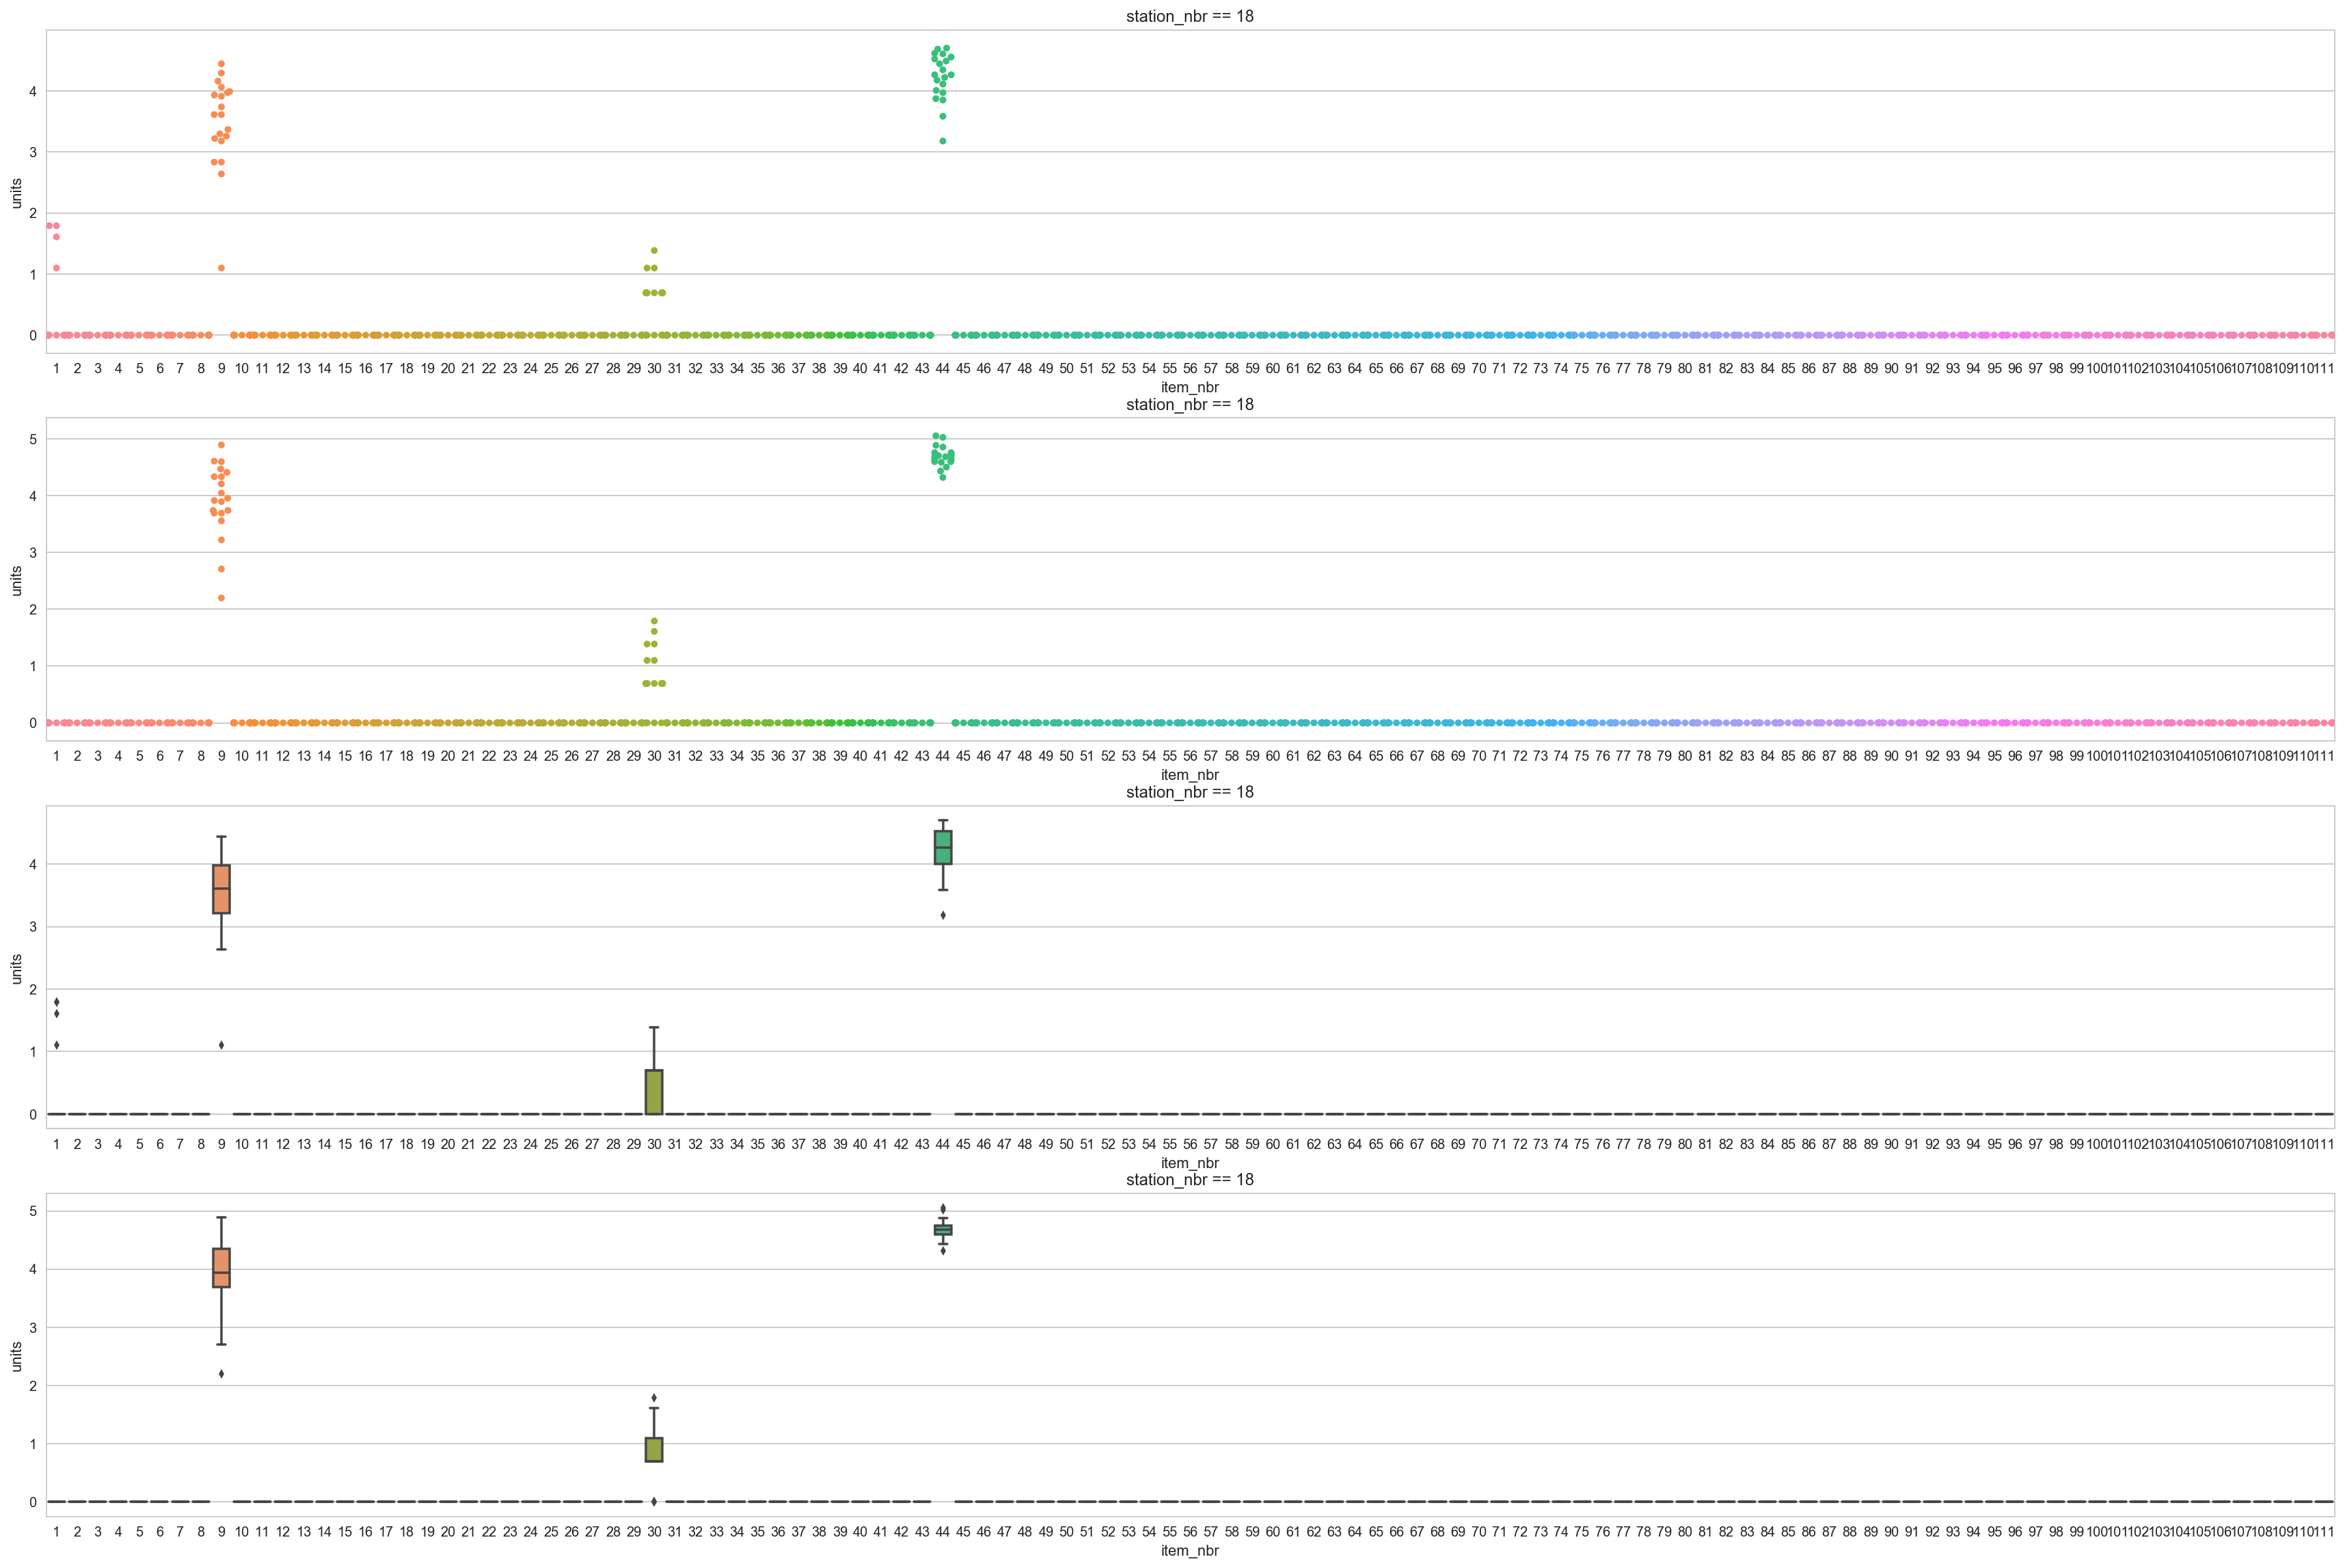

In [92]:
# station_nbr == 18
# store_nbr == 36

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store36
data2 = processed_train_nonholiday_store36

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 18')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 18')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 18')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 18')

plt.show()

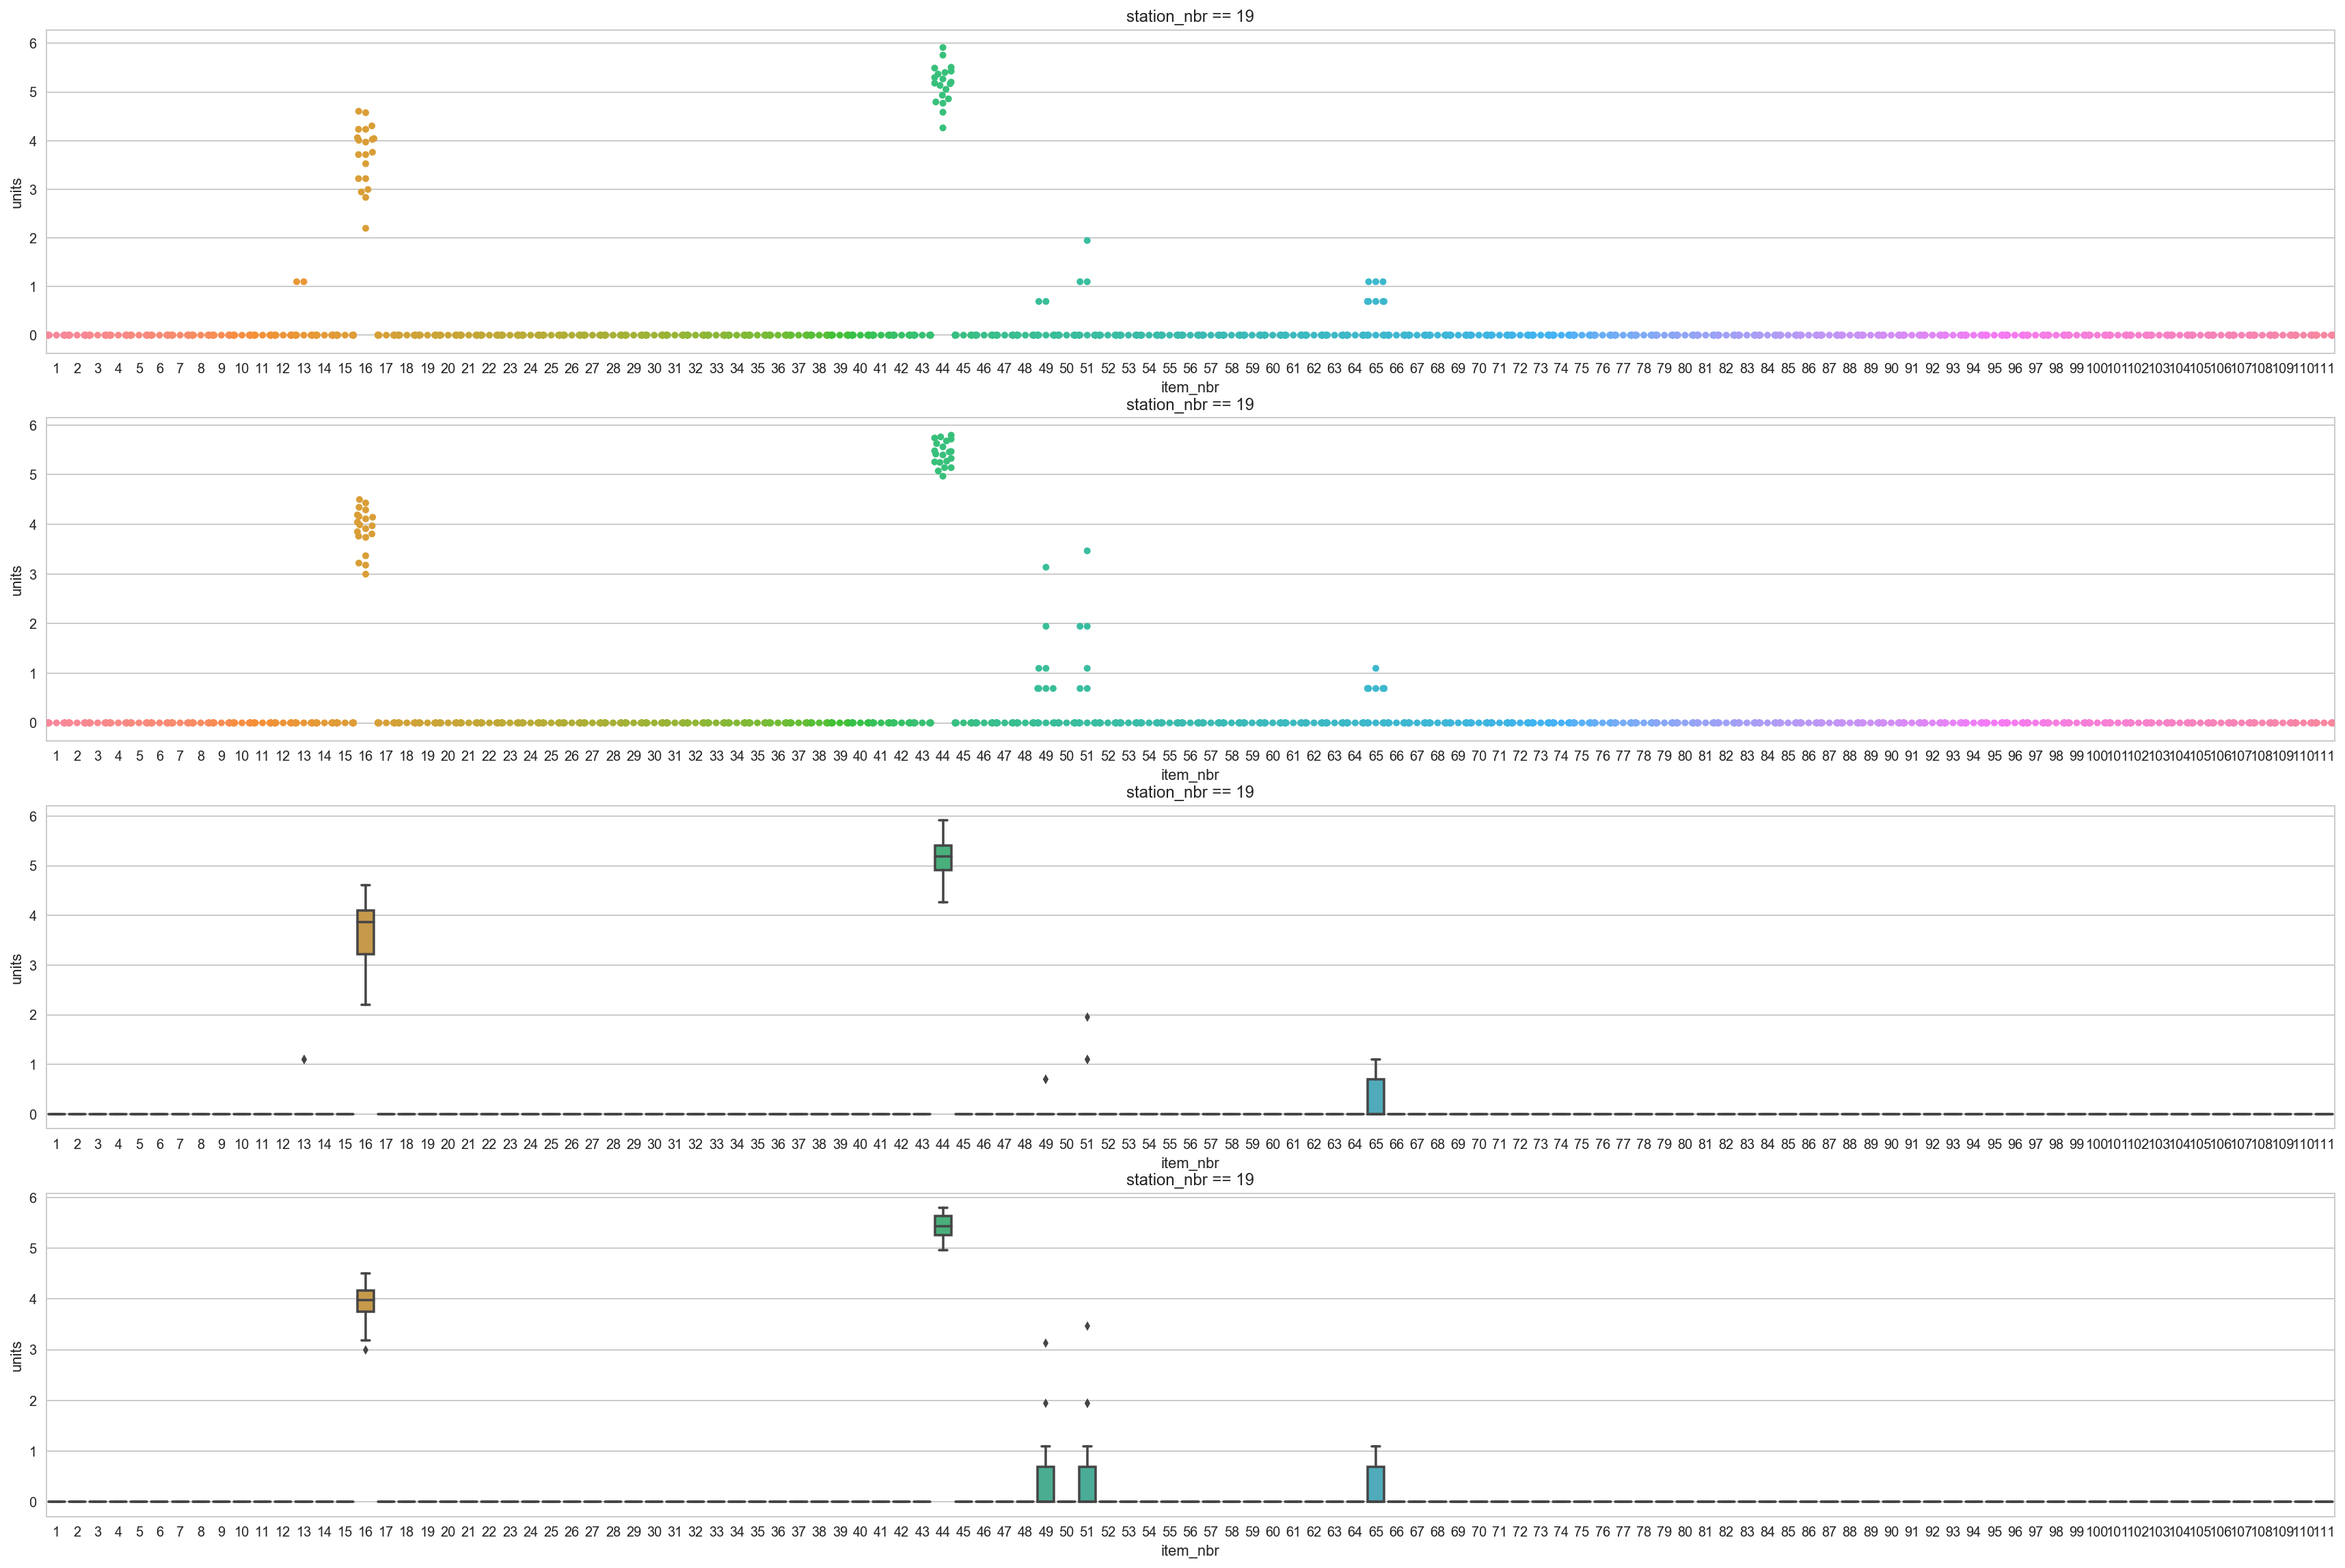

In [93]:
# station_nbr == 19
# store_nbr == 30

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store30
data2 = processed_train_nonholiday_store30

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 19')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 19')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 19')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 19')

plt.show()

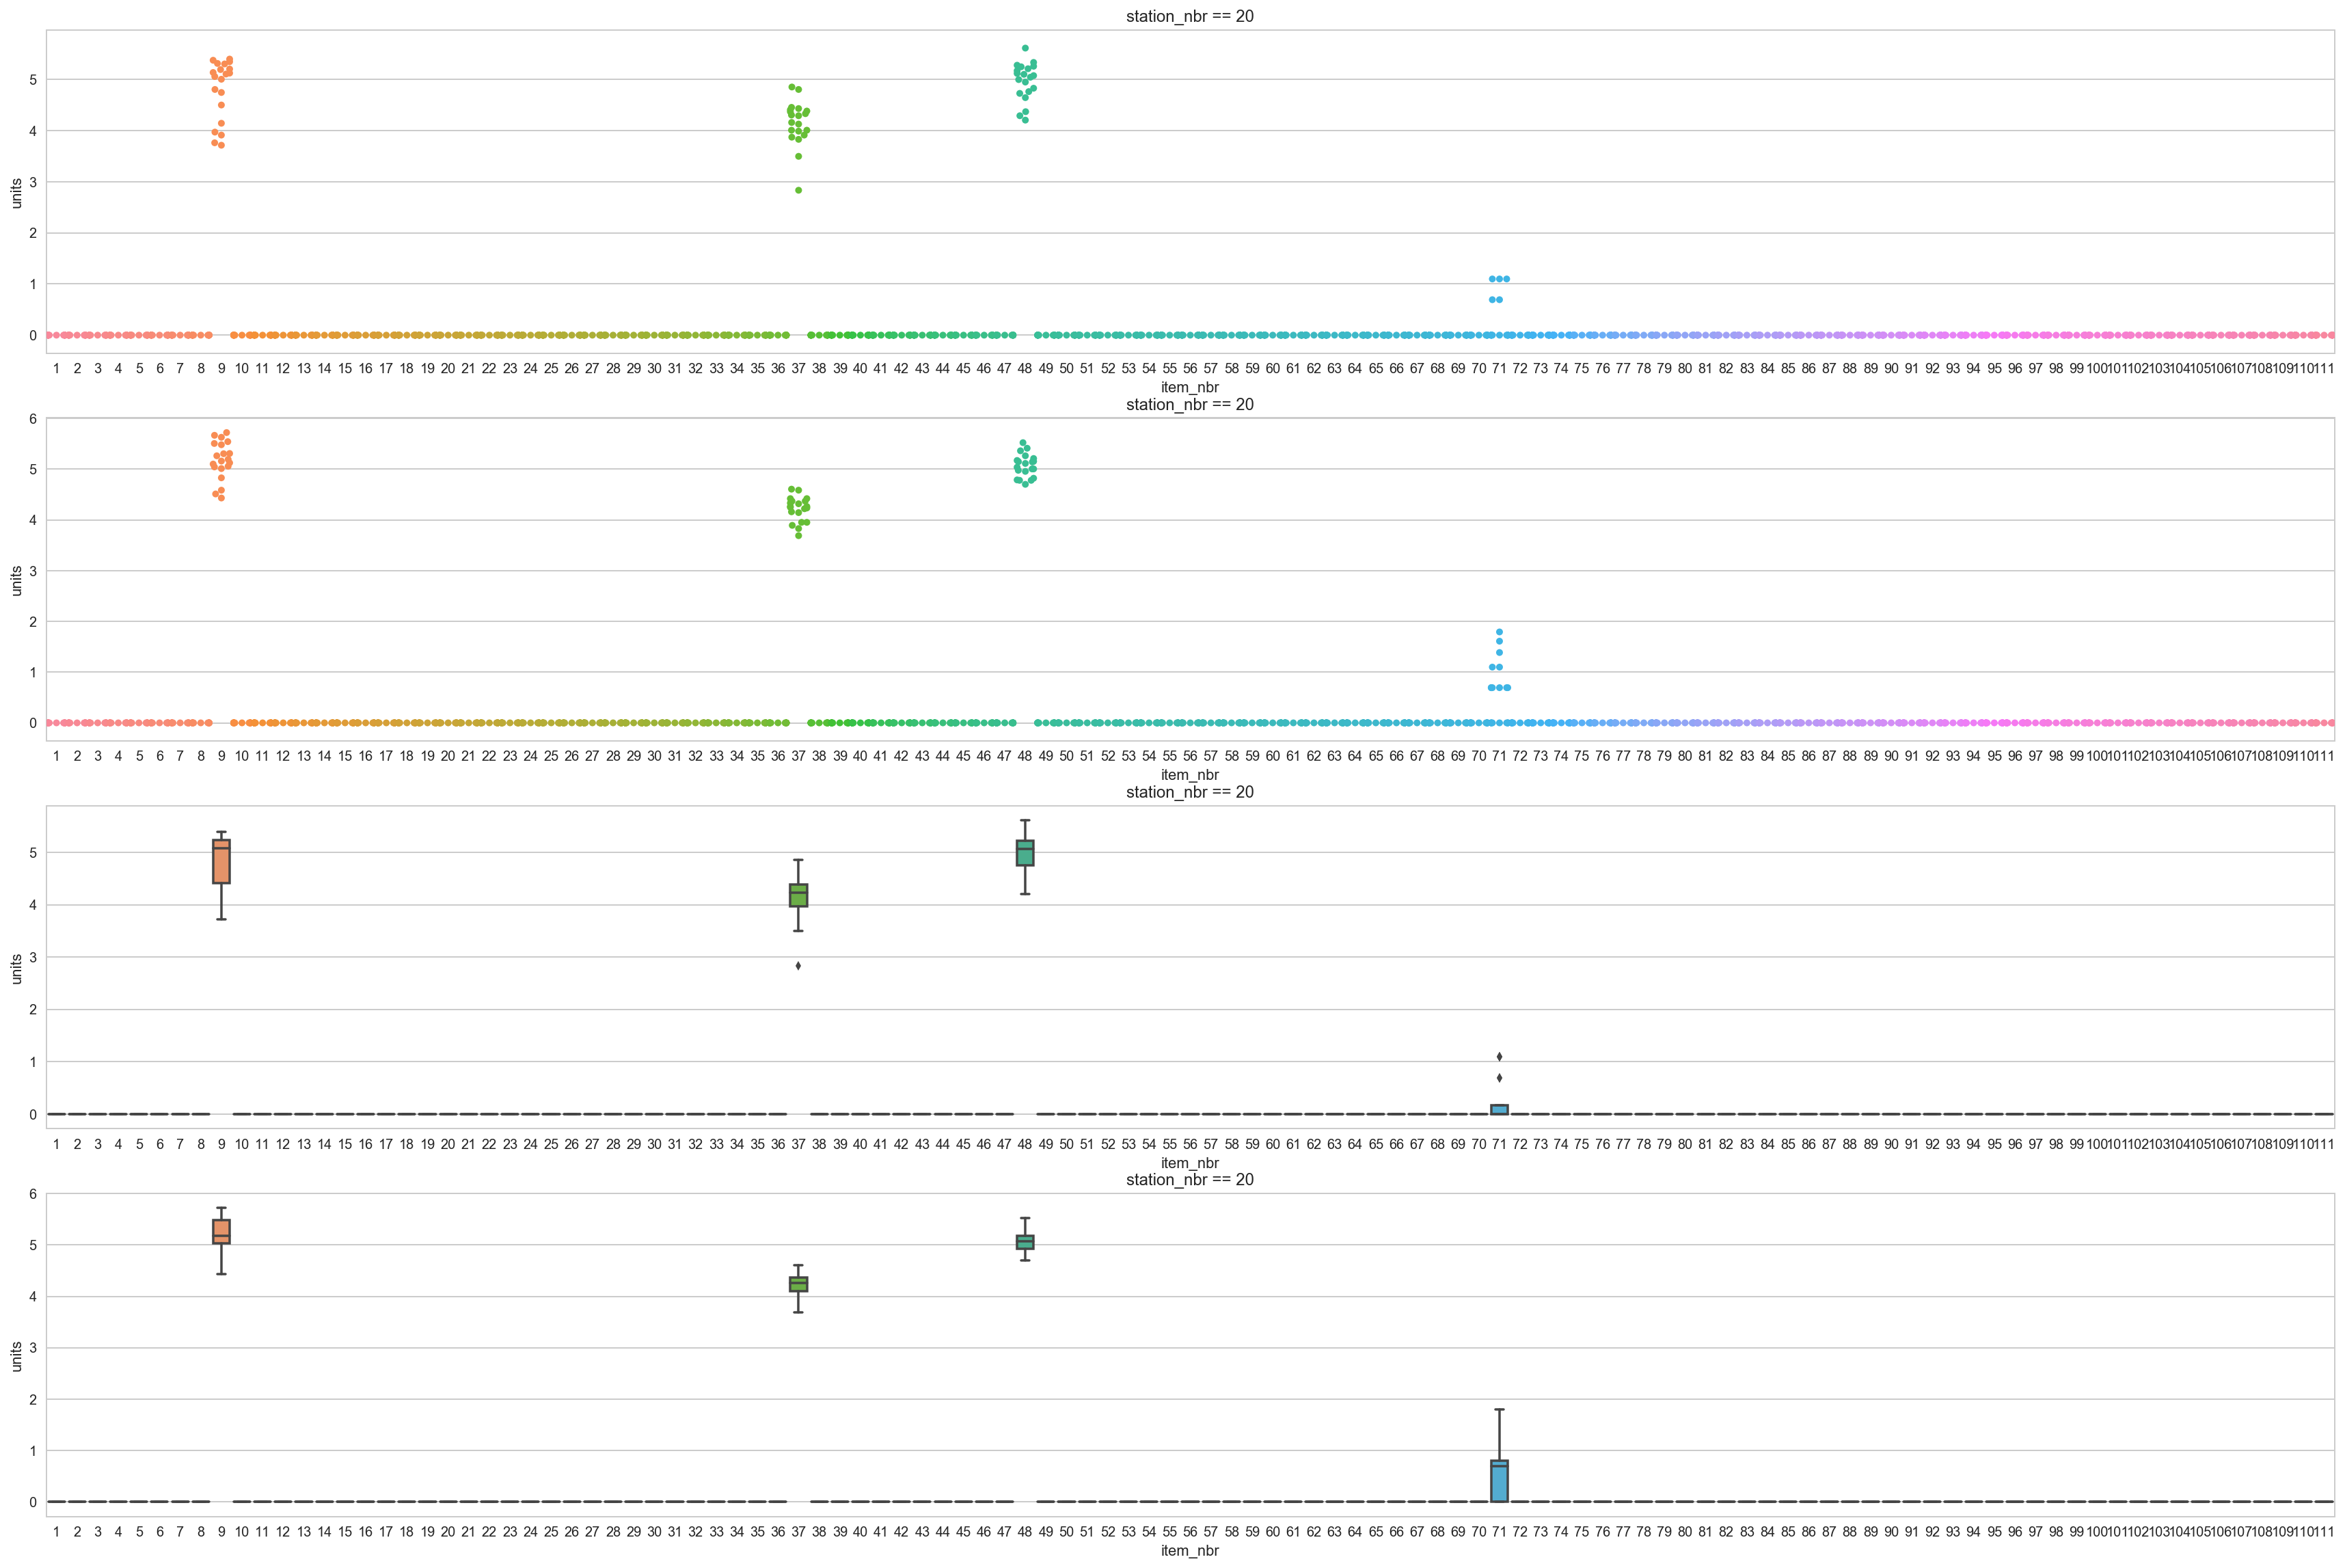

In [94]:
# station_nbr == 20
# store_nbr == 17

plt.figure(figsize = (30, 20))
data1 = processed_train_holiday_store17
data2 = processed_train_nonholiday_store17

plt.subplot(411)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 20')

plt.subplot(412)
sns.swarmplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 20')

plt.subplot(413)
sns.boxplot(x = 'item_nbr', y = 'units', data = data1)
plt.title('station_nbr == 20')

plt.subplot(414)
sns.boxplot(x = 'item_nbr', y = 'units', data = data2)
plt.title('station_nbr == 20')

plt.show()